# 💠 Learnable scaffolding

First principles of "doing stuff" are things like graph and numeric operations, and search and optimizers.

The most fundamental things can be discovered only by questioning the most basic things.

So let's… do that. Get lost and find our way again, in the world of programming.

We'll use Python, of course, the slowest gun in the West.    
This is in a Jupyter notebook.    
It's funny and educational.    
Maybe leave.    
Maybe read through.    
Maybe clone and play with code.    
Maybe clone and erase and implement some code for full mastery.

Have fun doing what you want to do.

```bash
sudo apt install python3 python3-pip
pip3 install jupyter
```

## Table of contents

- [**💠 Learnable scaffolding**](#💠-Learnable-scaffolding)

  - [**Table of contents**](#Table-of-contents)

  - [**🔰 Examples**](#🔰-Examples) (*Where we put down the very approximate vision as examples.*)

  - [**Why**](#Why) (*Where we defend against existential questions.*)

  - [**Carcass**](#Carcass) (*Where we put down the very approximate vision as code interfaces.*)

  - [**History**](#History) (*Where we specialize (and add details to) history.*)

  - [**Specializing with history**](#Specializing-with-history) (*Where we test out acyclic graph rewrites with history.*)

  - [**Composition**](#Composition) (*Where we dream of generation.*)

    - [**Execution**](#Execution) (*Where we write an interpreter.*)

    - [**Adjustment (reverse execution)**](#Adjustment-(reverse-execution)) (*Where we add some machine learning to go with our interpreter.*)

  - [**Computation revisited**](#Computation-revisited) (*Where we improve the interpreter and make a compiler.*)

  - [**General optimization (local search)**](#General-optimization-(local-search)) (*Where we add checkpointing because history nodes weren't enough.*)

  - [**Composition in a typed context**](#Composition-in-a-typed-context) (*Where we awkwardly generate correctly-typed programs.*)

  - [**Rewriting sequel**](#Rewriting-sequel) (*Where we rewrite rewriting.*)

  - [**Generation (composition sequel)**](#Generation-(composition-sequel)) (*Where we distractedly do maintenance, future/past, and very bad AutoML, then explain existence.*)

- [**Choice**](#Choice) (*Where we very slowly and painfully come up with some good NNs that we'll need.*)

  - [**Replay buffers**](#Replay-buffers) (*Where we learn from our mistakes.*)

  - [**Multiprocessing, and global saving/loading**](#Multiprocessing,-and-global-saving/loading) (*Where we add basic usability features.*)

  - [**Inlining**](#Inlining) (*Where we strangle our past selves.*)

  - [**Differentiable scaffolding**](#Differentiable-scaffolding) (*Where we get good enough to confront a pole.*)

  - [**AGI 💤**](#AGI-💤) (*Where we talk science-y.*)

- [**Wrapping up 🔴**](#Wrapping-up-🔴) (*Where we end this existence.*)

## 🔰 Examples

***&lt;Where we put down the very approximate vision as examples.&gt;***

I don't even really know Python, but let's learn that.

Machine learning is good at "doing stuff" in its domains, so let's learn that.

The kind of learning that sticks best is project-based learning. So our exploration has an end goal.

First, the interfaces that we'd like to use, for inspiration.    
No need to understand them all completely for now. Understanding goes with implementation, which is below all these.

(Cannot run them, only look.)

Search for hyperparameters:

```python
@state(a=real(0,1), b=one('x', 'y', 'z'), c=one('x', 'y', 'z'))
@examples((0.2, 'x'), (0.8, 'z'))
def probability_to_char(st, x):
    return st.b if x < st.a else st.c

print(probability_to_char(0.9)) # 'z'
```

Search for a linear decision tree:

```python
@state(
    result = label('num'),
    num = one(
        0,
        1,
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: x+y),
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: x-y),
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: x*y),
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: x/y),
        compose(label('num'), label('num'), label('num'), label('num'),
                out=label('num')(lambda x,a,b,c: b if x<a else c)),
    )
)
def hidden_learned_numeric_function(st, x: label('num'), y: label('num')):
    return st.result
# Can also be written as:
# hidden_learned_numeric_function = state( result=… )('result')


@examples((1, 10), (2, 15), (3, 16), (4, 5234), (10, 10000))
def learned_function(x):
    return hidden_learned_numeric_function(x, x*x) + 10

log(learned_function(7))

log(state._get_impl(learned_function))
```

```python
# Pattern-matching on an input.
import math
@state(
    result = label('num'),
    num = one(
        0,
        1,
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: x+y),
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: x*y),
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: x/y),
        compose(label('num'), label('num'), out=label('num'))(lambda x,y: math.pow(x,y)),
    )
)
def hidden_learned_numeric_function2(st, f: one('x', 'y', one.object_id), x: label('num')):
    return st.result


@examples((1, 2), (2, 4), (3, 8))
def learned_function1(x):
    return hidden_learned_numeric_function2('x', x)

@examples((1, 2), (2, 4), (3, 6))
def learned_function2(x):
    return hidden_learned_numeric_function2('y', x)

@examples((1, 10), (2, 11), (3, 12))
def learned_function3(x):
    return hidden_learned_numeric_function2(learned_function3, x)

print(learned_function1(4), learned_function2(4), learned_function3(4))
```

Persistence:

```python
@state(
    'learned123213',
    a = real(0,1)
)
def met(st):
    return st.a
for i in range(100):
    examples.add(met, out = 0.5 + i/200)

persist.load(open('saveToAndLoadFrom.bin', mode='rb'))
examples.fit(examples.new, 5)
examples.fit(examples.all, .5)
persist.save(open('saveToAndLoadFrom.bin', mode='wb'))
```

State inlining (multiple callsites of the same function in another function get treated as one) (analogous to transfer learning):

```python
# Note from the future: we no longer consider this required or wanted. Slow and filthy.
@state(a=one(1,2))
@examples(1)
def function1(st):
    return st.a

@state(a=2)
@examples(4)
def function4(st):
    return function1() + st.a

print(function1(), function4()) # 1, 4

log(state._get_impl(function1).a) # history(one(1,2), 1)

# Accomplished via automatically randomly calling:
# state.inline(function4, function1)
```

Max/min-imization:

```python
# This is just 2 branches in the loss function,
#   so in the future we didn't do this for very slight efficiency gains
#   (and because `float('inf')` is some very weird syntax for `Infinity`.)
@state(a = real(-1,1), b = real(-1,1), c = real(-1,1))
@examples(*( (x*10, float('-inf')) for x in range(-10, 10) ))
def minimize_at_points(st, x):
    a = st.a * st.a
    b = (st.b + 0.1) * (st.b - 0.5)
    c = abs(st.c * x)
    return a + b + c + x

import matplotlib.pyplot as plt
plt.plot([minimize_at_points(x) for x in range(-100, 100)])
plt.ylabel('minimize_at_points')
plt.show()
```

Internals: `compose.context`/`.in`/`.out` (used for search) and arbitrary types.

```python
# There is no one best search method and details,
#   so these 'internals' make search simple enough to hopefully be customized easily.
with compose.context(num = 1):
    with compose.context(num = 2):
        with compose.context(num = 3):
            print(compose.out(label('num'))) # one(1, 2, 3)

with compose.context(1, 3, 5, 7, 9, num = real(0,10)):
    x = one(1, 2, label('num'))
    print(compose.ins(x)) # one._pattern_match(1, 2, 'num')
    print(compose.out(x)) # (1, 2, real(0, 10))
    y = compose.type((1, 2, 3), None) # (enum)
    print(compose.ins(y)) # (1, 2, 3)
    print(compose.out(y)) # None — no further composition needed, usable as-is if found.
    z = compose.type(None, lambda x: x if isinstance(x, int) and x <= 5 else None) # (filter)
    print(compose.ins(z)) # None
    print(compose.out(z)) # (1, 3, 5)
    w = compose.type(None, lambda x: x)
    print(compose.ins(w)) # None
    print(compose.out(w)) # (1, 3, 5, 7, 9, real(0, 10))



# Internals: picking from options.
import random
def random_index(*a):
    L = len(a)
    return random.randint(0, L-1) if L > 0 else None
with compose.picker(lambda a: random_index(x for x in a if x>=5)):
    with Context(1, 5, 10):
        top = compose.type(None, lambda x: x)
        print(Context.get(top)) # 5 or 10
        print(*(x for x in Context.enum(top))) # 5,10 or 10,5



# Internals: undo-enabled transformations.
#   (Spoiler from the future: didn't pan out, got removed.)
undo_example_default_a = history(real(0,10), one(1,2,3), 2)
undo_example = state(
    a = undo_example_default_a
)('a')

state._set_body(undo_example, 'a', undo_example_default_a)

# The appropriate value will be found much faster than with just a=real(0,10).
examples.add(undo_example, out = 3)
examples.fit(undo_example, .1)
print(undo_example()) # 3
# In operations that our library implements, for each type of set,
#   we'd like to have set=>subset functions that rely on history to speed up minor changes.
```

Search optimization (optimize how fast things are optimized):

```python
# Didn't really end up doing this.

for i in range(10):
    start_time = examples.time()
    def search_speed(f, got, expected):
        return examples._loss(f) / start_time()
    with compose.context(metrics = search_speed):
        examples.fit(examples.all, 1)



# Memory limiting and optimization.
@state(
    result = one('x', compose(lambda x: x+1, 'x', 'x'))
)
def mem_limiting_example(st, x: 'x'):
    return st.result
state.byte_limit(mem_limiting_example, 100) # Limit the sum of sys.getsizeof()


def memory(since = 0):
    # Somewhat accurate to kilobytes.
    import resource
    u = resource.getrusage(resource.RUSAGE_SELF)
    mem = u.ru_ixrss + u.ru_idrss + u.ru_isrss
    if not mem:
        mem = u.ru_maxrss
    if sys.platform != 'darwin':
        mem = mem * 1024
    return mem - since
start_memory = memory()
with compose.context(metrics = lambda f,g,e: -memory(start_memory)):
    examples.fit(examples.all, examples.timeout(5))

# These are areas where it is practically impossible to come up with universally good metrics or optimization way,
#   so advanced metric (and search-impl) enumeration and search would be required.
```

You have the free will to do what you want, but you choose to read this. What can I do to keep up the interest?

## Why

***&lt;Where we defend against existential questions.&gt;***

Ah, the age-old question of "why does this exist?".

To put it simply, right now we want to make a reliable library for adding structural learning to ML's numerical learning, similar to AutoML frameworks. But our thinking that led to this is broader.

Intelligence is beyond static descriptions and beyond static numerics.    
Natural language transformer networks, using comments to select which feature is the most appropriate to implement another.    
A mental list of tasks that a person does, having spent a lifetime learning when to take on a new task, when to work on the list, when the work is good enough, and when to give up.    
Vast groups that co-learned the same meanings and implications of words, and the gradual drift of those meanings and eventually words themselves over time, in groups and individuals alike.    
People learning how to adjust the program they wrote in response to errors they see, learning appropriate dynamic contexts of static parameters (if they depend on the phase of the moon, it will be found out), and learning re-usable parts and when to learn them for most effective transfer learning.    
Only a fully dynamic thing behaves like that.

Here, we hope to try out a new stateful approach to writing software, where only the most important things are formalized, and the rest is learned.

We'd like to put lessons of machine learning (mainly "don't write down one way, write down all ways, and defer choices to the machine") into a non-numeric form.

More, we'd like an arbitrary-program optimization base that can represent and optimize fully-dynamic behavior. For science.

Let's not dwell on this, because asking why is how things die.

## Carcass

***&lt;Where we put down the very approximate vision as code interfaces.&gt;***

Our next step here is to consolidate all those examples into the library's skeleton, which includes full interfaces and comments on how each function is to be implemented. This is very preliminary, as all implementation-less interfaces are.

It's only fair to warn you that most of what we do to explore the problem space fully is random flailing.

In [1]:
import IPython; IPython.InteractiveShell.cache_size = 0

In [2]:
# Public interface:

# state(__name = None, **vars)(func_or_varname)
#   load(filename, autosave = True)
#   save(filename = last_loaded_filename)
#   override(func_id_to_impl) -> context_manager
#   pprint(state)
#   inline(func = None, inner_func = None, inline = 1)
#   byte_limit(func, bytes)
#   _get_impl(func, varname = None)
#   _set_impl(func, varname, impl)
# examples(*args_to_out)(func)
#   add(func, *args, out)
#   fit(func, stopping_check)
#   timeout(ms) -> function finished()->bool
#   time() -> function time_since()->ms
#   new: list
#   all: list
#   _loss(func)
# compose(func, *arg_sets, out)
#   context(*values, **label_set_additions) -> context manager
#   ins(object)
#   out(object)
#   type(enum, filter)
#   picker(list_to_index_function) -> context manager
#   pick(object)
#   picks(object) -> iterator
# match(value, branches)
#   id
# label(name)
# history(*past_then_present) datatype
# many(*of) datatype
# one(*of) datatype
# real(min, max) datatype
# int(min, max) datatype

# Executing a function, with composable arbitrary backprop:
#   execute(func, ins = None) -> many(out, exec_state)
#   adjust(func, ins, out, dout, exec_state) -> dins

# _parse(bytes) -> obj
# _serialize(obj) -> bytes

import sys # getsizeof
import math # isinf
import time # clock
import random
import inspect # getsource
import weakref # finalize, WeakValueDictionary
from numbers import Number

import threading # local
TL = threading.local() # Thread-local storage for execution-state-related global variables.

# All datatypes have a uniform repr:
#   Struct(head, *data) which inherits from list.
_bytes = 0
class Struct(list):
    def __init__(self, *head_then_args):
        global _bytes
        super().__init__(head_then_args)
        _bytes += sys.getsizeof(self)
        # Keep track of byte-precise memory ourselves.
    def __del__(self):
        global _bytes
        _bytes -= sys.getsizeof(self)
        # Assuming that structs are immutable.




class State:
    superseded = True
    # Using @staticmethod is too verbose.
    # Is there any other way to do non-file-based namespacing in Python?

    def __call__(_, __name = None, **kwvars):
        """Decorator for specifying state state for functions.
        A function will have an extra arg in front for getting state; do not store it."""
        ## is TBD
        def decorate(func):
            nonlocal __name
            if __name is None:
                __name = inspect.getsource(func)
            ## And set _state_names[__name] to func for save/load.
            func.states = {id(func):kwvars}
            def replacement(*args, **kwargs):
                TL._current_func = func
                with state.override(func.states):
                    return func(TL._current_state_object, *args, **kwargs)
            for k,v in vars(func).items():
                setattr(replacement, k, v)
            return replacement
        return decorate
    
    def load(_, filename, autosave = True):
        """Loads global state from file."""
        ## Read file bytes.
        ## Turn file bytes into an object graph with _parse(bytes).
        ## Set functions' states named in _state_names to what they are in the graph.
        pass
    
    def save(_, filename = None):
        """Saves global state to file, the last loaded one by default."""
        ## that = {k:state._get_impl(v) for k,v in _state_names.items()}
        ## Get bytes with _serialize(that).
        ## Write them.
        pass
    
    def override(_, func_id_to_state):
        """Returns a context manager that overrides function impls, for inlining."""
        class StateSetter:
            __slots__ = ['fs']
            def __init__(self, fs):
                self.fs = fs
            def __enter__(self):
                for func_id, state in self.fs.items():
                    TL._states[func_id] = state
            def __exit__(self,x,y,z):
                for func_id, state in self.fs.items():
                    del TL._states[func_id]
        return StateSetter(func_id_to_state)
    
    ## Do we need `func` in these three; isn't it always the current func?
    def _run_impl(_, func, varname):
        """Get and execute an impl."""
        impl = state._get_impl(func, varname)
        out, exec_state = execute(impl)
        ## And store exec_state in func's current exec_state cell.
        return out
    
    def _get_impl(_, func, varname = None):
        """Get a function's impl in the current state."""
        # Lookup in the first override of func in TL._states.
        if id(func) in TL._states:
            state = TL._states[id(func)]
            if varname is None:
                return state
            elif varname in state:
                return state[varname]
        return None
    
    def _set_impl(_, func, varname, impl):
        """Set a function's impl in the current state."""
        if id(func) in TL._states:
            state = TL._states[id(func)]
            state[varname] = impl
    
    def pprint(_, obj):
        """Pretty-prints an object."""
        pass
    
    def inline(_, func = None, inner_func = None, inline = 1):
        """Sets the global state inlining policy."""
        pass
    
    def byte_limit(_, func, bytes):
        """Sets the maximum byte count that a function's state can take."""
        pass

state = State()



class _CurrentState:
    superseded = True
    def __getattr__(self, attr):
        return state._run_impl(TL._current_func, attr)

TL._current_state_object = _CurrentState()

TL._states = {}
TL._current_func = None



class Examples:
    superseded = True
    def __call__(self, *args_to_out):
        """A decorator for associating input-output examples with a function."""
        def decorate(func):
            func.examples = args_to_out
            examples.all.append(func)
            weakref.finalize(func, examples.all.remove, func)
            return func
        return decorate
    
    def _loss(_, func, exs = None):
        """Computes the loss of a function over all its examples, to be minimized."""
        if exs is None:
            exs = func.examples
        dsum = 0
        for ex in exs:
            # This slice might allocate, meaning that it should be pre-done in `examples`.
            # I don't know enough about Python internals.
            intended_ins, intended_out = ex[0:-1], ex[-1]
            out, exec_state = execute(func, intended_ins)
            if not isinstance(intended_out, Number):
                dout = 0 if intended_out == out else 1
            elif not math.isinf(intended_out):
                dout = abs(out - intended_out)
            elif intended_out > 0: # +∞
                dout = -out
            else: # -∞
                dout = out
            dsum += dout
            ## We have exec_state here,
            ##   we could use it by passing it to `adjust`,
            ##   or by returning a random one.
            ## But "when" is unclear.
            ##   We'd like to optimize that automatically, later.
        return dsum
    
    def add(_, func, *args, out):
        """Adds an example to a function's example list."""
        func.examples.append((*args, out))
    
    def fit(_, func = None, stopping_check = None):
        """Executes and adjusts a function on any of its examples.
        Returns when stopping_check returns True."""
        if stopping_check is None:
            stopping_check = examples.timeout(.5)
        ## while not stopping_check():
        ##   pick random example
        ##   execute
        ##   adjust
        # (Or add up loss and sample state of several examples and adjust.)
        pass
    
    def timeout(s):
        """Returns a function that returns True when the given seconds have passed."""
        end_s = time.process_time() + s
        def finished():
            return time.process_time() <= end_s 
        return finished
    
    def time():
        """Returns a function that returns seconds passed since its creation."""
        start = time.process_time()
        def time_since():
            return time.process_time() - start
        return time_since
    
    new = []
    all = []

examples = Examples()



class Compose:
    superseded = True
    def __call__(_, *arg_sets, out):
        """"""
    
    def context(_, *values, **label_set_additions): # -> context manager
        """"""
    
    def ins(_, obj):
        """"""
    
    def out(_, obj):
        """"""
    
    def type(_, enum, filter):
        """"""
    
    def picker(_, list_to_index_function): # -> context manager
        """"""
    
    def pick(_, obj):
        """"""
    
    def picks(_, obj): # -> iterator
        """"""

compose = Compose()



class Label:
    superseded = True
    __slots__ = ('name', '__weakref__')
    def __init__(self, name):
        self.name = name
    def __hash__(self):
        return hash(self.name)
    def __eq__(self, other):
        if isinstance(other, Label):
            return self.name == other.name
        return False
    # Python 3 needs no __ne__

TL._label_cache = weakref.WeakValueDictionary({})

def label(name):
    """Returns an object that is guaranteed to be the same for equal values of `name`."""
    if name not in TL._label_cache:
        L = Label(name) # Why is putting it on the same line make it call the getter?
        TL._label_cache[name] = L
    return TL._label_cache[name]
label.superseded = True



class Match:
    superseded = True
    def __call__(self, value, branches):
        """"""
        pass
    id = """Pattern-matches on id(object)."""

match = Match()



class History:
    superseded = True
    """A transformed value, able to be returned to its past state."""
    def __call__(self, *past_then_present):
        return Struct(History, *past_then_present)

history = History()



class Many:
    superseded = True
    """Basically an array.
    Multiple values at once, able to be decomposed into each with `access_many`.
    When a value of a `many(…)` set is an input, becomes decomposed into each part.
    When an output, generates each branch, then puts results into an array."""
    def __call__(self, *of):
        return Struct(Many, *of)

many = Many()

def access_many(m, index):
    return m[index]
access_many.superseded = True



class One:
    superseded = True
    """Basically a choice.
    Any value from ones listed, able to be recognized with `match`.
    When a value of a `one(…)` set is an input, becomes pattern-matched.
    When an output, selects a random branch to go to (with a pattern-match)."""
    def __call__(self, *of):
        return Struct(One, *of)

one = One()



class Real:
    superseded = True
    """Any scalar number from min to max."""
    def __call__(self, min, max):
        return Struct(Real, min, max)

real = Real()



class Int:
    superseded = True
    """Any integer from min to max."""
    def __call__(self, min, max):
        return Struct(Int, min, max)

# int = Int()



def execute(func, ins = None): # -> many(out, exec_state)
    while True:
        if isinstance(func, Struct):
            if func[0] is Real:
                func = random.uniform(func[1], func[2])
            elif func[0] is Int:
                func = random.randint(func[1], func[2])
            ## Also handle Many via actual recursion.
            elif func[0] is One:
                i = random.randint(1, len(func)-1)
                func = func[i]
            elif func[0] is History:
                func = func[-1]
        ## Also execute if an SSA.
        elif isinstance(func, Label):
            func = state._get_impl(TL._current_func, func.name)
        elif callable(func) and ins is not None:
            return func(*ins), None
        else:
            return func, None
execute.superseded = True
def adjust(func, ins, out, dout, exec_state): # -> dins
    pass
adjust.superseded = True



def _parse(b):
    pass
_parse.superseded = True
def _serialize(obj):
    pass
_serialize.superseded = True

Midway through, I turned my brain off and went coding and learning Python along the way, so this carcass crawls with maggots: setting and getting static state works, setting examples works (but not fitting to them), flyweight labels work. Did not touch composition nor parsing+serialization, nor specialization nor execution.

I have struggled with the Python language in a few places.    
Following a reference to its definition is burdensome enough that I need to try and mentally track as much scope as I can.    
I can't be completely sure that other code won't read the properties I'm defining.    
I'm not sure about performance of particular things.    
Namespacing is weird and causes semantic noise.    
But that doesn't mean that some super language should be made that will have no mistakes in its design, even if that possibility seems closer every year.    
Certainly, efforts toward that can be made, and each will improve the situation. That's the danger of static-goal universal optimizers: optimizers that outperform them probably exist.    
Planning is everything and plans are nothing, a world model beats expert knowledge, a language is irrelevant next to the ability to make one, and dynamic is always better than static.    
That's why I'm exploring this library of dynamic generation.

Let's excise bugs by looking at how the implemented functionality behaves:

In [3]:
@state(a=real(0,1), b=one('x', 'y', 'z'), c=one('x', 'y', 'z'))
@examples((0.2, 'x'), (0.8, 'z'))
def probability_to_char(st, x):
    return st.b if x < st.a else st.c

for _ in range(3):
    print(probability_to_char(0.2), probability_to_char(0.8))
    print(probability_to_char(0.2), probability_to_char(0.2), probability_to_char(0.2))
    print(examples._loss(probability_to_char))

x z
y z z
2
z x
z x z
0
x y
x x y
1


Loss should be `0`/`1`/`2` (count of failed examples), and everything should vary constantly, because we don't sometimes rewrite state by specializing, and pick everything dynamically.

Rewriting rules and specializing with history (and `examples.fit`) should be next, to make the first example actually work.

## History

***&lt;Where we specialize (and add details to) history.&gt;***

I've been thinking about program search and realized something.

Random search or evolution are: pick a random part to put into result, or pick a random part to alter/crossover randomly.

(Neural networks could be used to estimate/learn how good a choice and a resulting graph are [[Y]](https://arxiv.org/pdf/1910.11858), but structures of search and NNs are still static, and NNs' messy vocabulary makes "learning" mean only its particular kind of change. I want another change, the real search of structure.)

But that arbitrary choice can be much more than picking a random number each time and being satisfied.

We can remember the choice and maybe change it later, or replace it with a choice from a subset, or decide what to do with an arbitrary computation, generated with all this too; then maybe remember our work somewhere, decide when to forget.

This needs state, but if we have state, we can learn it.

And so, to try to reach and push the state-of-the-art on search, the idea of this library was born.

---

Previously, I spent half a year making a programming language that is perfect, has many powerful features, and is so uniform it can be written automatically.

But I realized: every new feature is another feature away from what allows intelligent behavior.

For that, a primitive SSA is better than very convenient semantics, and a library serves better than a full language.

A mind is not given to you, and must be learned from the start: 'nothing' is indistinguishable from 'everything', but 'something' is neither.

I know a lot of people blame how primitive code entry tools are, but from what I've seen, the only and real problem is the lack of intelligence in machines: 50% more thoughts captured will never equal a mind. Until the singularity is trusted and widespread, every tool will seem stone-age.

To help that, we must learn to change without fear.    
Find the everythings that can give rise to all the somethings, implement them, and make a system to learn something simple.

## Specializing with history

***&lt;Where we test out acyclic graph rewrites with history.&gt;***

For real this time.

We want to be able to specify a function, that will turn an executable value in a state (`impl`) into its special case; we'd then put `history(Old, New)` back.

We can't just say "hey, user, just write whatever you want in this spot", we have to handle all cases that we've made and connections between them.    
In other words, we need to explicitly do a DAG rewrite (directed acyclic graph — basically, where objects are created one-by-one, with immutable-at-creation-time connections).    
Say, `rewritten(impl, func)` is the graph rewrite.

What does rewriting a thing with connections mean?    
Node type (whether it's a `One` or `Real` or others) is important.    
Rewrite connections (without repeating work), then rewrite the thing. There might not be connections, which we'll have to check for.    
Maybe we don't rewrite a particular node, but still want to build up some estimate for decision-making, so we need an input and an output for that.    
Which means that inputs of a rewriting function are (informally) `(estimate | None, node)`, where it's a good idea to match the first item in `node` by object id; and outputs are `many(estimate, node_becomes | None)`.    
`node_becomes` here is made by decomposing `node`, and later we'll have to specify a complete basic set of rewrites. That decomposition won't have access to new nodes, so we'll have to update `node_becomes` manually in `rewritten`.

Where would we use this function? We could try doing it with a 10% chance in `execute`, or make `adjust` walk the DAG and rewrite an impl with a 1% chance.    
Inability to find a good place for structural change may be discouraging, but that's what "we'll come back to dynamically optimize the search itself later" is for.

Enough talk, let's program it.

In [4]:
def rewritten(impl, func):
    # Walk the graph, apply `func(recursive_estimate, *node)` to each node.
    def walk(node, func, env):
        """Fills a dictionary with graph nodes' rewriting results and recursive estimates.
        `node` is a list with the node type being the first item and graph edges following, or anything else.
        `func` is like `compose('estimate', node, out=many('estimate', 'node_becomes'))`, decomposing nodes up to depth of 1.
        `env` is a dict from id(node) to the node's recursive estimate and node_becomes."""

        # The graph-walk header:
        if id(node) in env:
            return env[id(node)][0]
        env[id(node)] = None # Unneeded if there are no cycles, but good to remember.

        # Get and sum estimates of children, then pass that to `estimate`.
        ## (Any other order-independent number op can be used: mult, mean, min/max.)
        # Every one of our datatypes is a Struct, so getting connections is very simple.
        s = None
        is_struct = isinstance(node, Struct) and len(node) >= 1
        post = Struct(*node) if is_struct else node
        any_change = False
        if is_struct:
            for i in range(1, len(node)):
                child_est = walk(node[i], func, env)
                post[i] = env[id(node[i])][1]
                if post[i] is not node[i]: any_change = True
                if child_est is not None:
                    s = child_est if s is None else s + child_est

        # Collect post-rewrite dependencies in `post`.
        s, becomes = func(s, post)

        # Remember the rewrite.
        if becomes is None:
            becomes = post if any_change else node
        env[id(node)] = (s, becomes)
        return s
    env = {}
    walk(impl, func, env)
    return env[id(impl)][1]
rewritten.superseded = True

This isn't a complete implementation of rewriting, there should also be its adjusting part to balance out the execution part we've just made: remember `env`, then post-order traversal of execution becomes pre-order traversal of adjustment.

With this, what `adjust` should be and do becomes more clear: the `@attr(adjust = adjust_override)` decorator for easily specifying its overrides, and `adjust` itself should propagate in a breadth-first manner, and handle visiting-same-node-many-times (where adjustments should be summed).

We won't do that for now, because we have a bigger problem: lacking a representation for computations. This problem may or may not make us rewrite rewriting.

Example usage of `rewritten`, to excise bugs:

In [5]:
def real_rewrites(_, a, b):
    from numbers import Number
    if isinstance(a, Number) and isinstance(b, Number):
        if a + 4 < b:
            return real(a+2, b-2)
        if a + 2 < b:
            return real(a+1, b-1)
    return a if random.randint(0,1) == 0 else b
real_rewrites.superseded = True

def r(_, node):
    if isinstance(node, Struct) and node[0] is Real:
        if random.randint(0,1) == 0: # 50%
            return 0, real_rewrites(*node)
    return 0, None
r.superseded = True

[rewritten(one(real(1,3), real(real(0,1),4), real(1,5), real(1,6), 15), r) for _ in range(5)]

[[__main__.One,
  [__main__.Real, 1, 3],
  [__main__.Real, 0, 4],
  [__main__.Real, 2, 4],
  [__main__.Real, 3, 4],
  15],
 [__main__.One,
  1,
  [__main__.Real, 0, 1],
  [__main__.Real, 1, 5],
  [__main__.Real, 1, 6],
  15],
 [__main__.One,
  1,
  [__main__.Real, 1, 4],
  [__main__.Real, 1, 5],
  [__main__.Real, 3, 4],
  15],
 [__main__.One,
  [__main__.Real, 1, 3],
  [__main__.Real, 0, 1],
  [__main__.Real, 2, 4],
  [__main__.Real, 1, 6],
  15],
 [__main__.One,
  3,
  [__main__.Real, 0, 1],
  [__main__.Real, 1, 5],
  [__main__.Real, 1, 6],
  15]]

Okay, for *real* real this time, specialization with history, also known as fearless rewriting (to literally no one):

In [6]:
from numbers import Number

def real_specialize(_, a, b):
    if isinstance(a, Number) and isinstance(b, Number):
        return random.uniform(a, b)

def one_specialize(_, *opt):
    return random.choice(opt)

def history_generalize(_, past, present):
    return past

def specialize_y(_, node):
    becomes = None
    if isinstance(node, Struct) and random.randint(0,1) == 0: # 50%
        if node[0] is Real:
            becomes = real_specialize(*node)
        if node[0] is One:
            becomes = one_specialize(*node)
        if node[0] is History and len(node) == 3:
            becomes = history_generalize(*node)
    if becomes is not None:
        becomes = history(node, becomes)
    return 0, becomes

def to_initial(_, node):
    if isinstance(node, Struct) and node[0] is History:
        # Gotta get back, back to the past
        return 0, history_generalize(*node)
    return 0, None

real_specialize.superseded = one_specialize.superseded = history_generalize.superseded = specialize_y.superseded = to_initial.superseded = True

def test():
    initial = one(real(1,3), real(real(0,1),4), real(1,5), real(1,6), 15)
    post1 = rewritten(initial, specialize_y)
    post2 = rewritten(post1, specialize_y)
    # The specialize-y function can be chained infinitely,
    #   and won't get stuck due to not perfectly-cyclic rewriting rules.
    back = rewritten(post2, to_initial)
    return ['1:', post1, '2:', post2, 'back:', back]
test()

['1:',
 [__main__.History,
  [__main__.One,
   [__main__.Real, 1, 3],
   [__main__.Real,
    [__main__.History, [__main__.Real, 0, 1], 0.2912048995908435],
    4],
   [__main__.History, [__main__.Real, 1, 5], 4.433175595389244],
   [__main__.Real, 1, 6],
   15],
  15],
 '2:',
 [__main__.History,
  [__main__.History,
   [__main__.One,
    [__main__.Real, 1, 3],
    [__main__.Real,
     [__main__.History, [__main__.Real, 0, 1], 0.2912048995908435],
     4],
    [__main__.History,
     [__main__.History, [__main__.Real, 1, 5], 4.433175595389244],
     [__main__.Real, 1, 5]],
    [__main__.History, [__main__.Real, 1, 6], 4.809262526604247],
    15],
   [__main__.Real,
    [__main__.History, [__main__.Real, 0, 1], 0.2912048995908435],
    4]],
  15],
 'back:',
 [__main__.One,
  [__main__.Real, 1, 3],
  [__main__.Real, [__main__.Real, 0, 1], 4],
  [__main__.Real, 1, 5],
  [__main__.Real, 1, 6],
  15]]

(In a real implementation, this should be done at execution or adjustment.)

I know what you're thinking.

"Why not just execute the whole impl, and add that with history? Could have been done in 1 line."

The answer is, because this approach won't teach anything.

We're exploring without a crystal-clear idea of what we want, so we need to make damn sure that we're teaching ourselves something that may be useful. This will pay dividends in the sequel.    
We wanted to handle structure properly, and structure *is* generally a graph, so we made (most of) a graph rewriting routine, so general that it can be used for a recursive neural network or any search through quantized rewrites.    
We found and made use of some principles: "always make space for a same-type input+output pair, for customizability/learnability by users", and "randomly apply any of these rules".    
And we simplified rewriting until it couldn't be simplified.

Maybe this code will be superseded, but its spirit will live on in other code.

## Composition

***&lt;Where we dream of generation.&gt;***

Before we can do anything at all interesting, we must be able to handle `compose`d computations properly.

There are two parts to that: execution and generation.

For generation, we'll need every way that output can possibly be computed from inputs.    
Pattern-matching on an arbitrary index to select the branch for the output.   
Pattern-matching on inputs.    
Decomposing inputs.    
Composing output.    
Looking at past values.    
Looking at future values, and adjusting once available.    
Matching input types to output types to compose functions.     
Creating many outputs, and predicting how well each of them will do.    
Numeric representations, and mixing every input into every output (neural nets).    
And don't forget about dynamic partial re-generation in rewriting.    
And don't forget loops and/or recursion.

but **other**

### Execution

***&lt;Where we write an interpreter.&gt;***

It may come as a surprise to some, but outputs of functions can become inputs to others. It's true.

Which means that a function call should be represented with some object that stores the function to call and its inputs, which could be other such objects.    
We need some sort of graph structure, but with exactly zero ambiguity, ordering edges of each node.    
Like `Struct`.    
Yeah, that covers it entirely.    
In `execute`, if the `Struct` is a function, compute its inputs then call it.    
That big `if` nest can be replaced with one branch-to-data thing. (In fact, it had a big mistake: not recursing on inputs.)

If you're used to programming in programming languages, you're probably confused.    
Where are variable bindings?    
Where are instruction sequences?

Unneeded.

It's inconvenient to explicitly generate those, and rewriting becomes either really tricky or near-useless.    

But they do need some handling.

For variable analogues, we won't recompute nodes we've already computed in the current Python function call.    
We'll do this with a dict cache.    
(Note that if we had all nodes in a linear array, our internal representation would have been called SSA form — static single assignment: assigning each computed value to one variable. This would have replaced dict accesses with much more efficient list accesses. The best option, as always, is both: a DAG for rewriting, and its updated SSA form for execution. But it's complex, so we won't do that here.)    
Keeping all intermediate values does not reuse the CPU caches and so is inefficient, but we'll want to have `adjust` which will need all the values.

For sequence analogues, we'll need to ensure the lack of cycles, to know what is computed before what.    
I mean, what is a cycle in computation?    
A link to the past, to represent state? But which past, one execution ago or the execution where the phase of the moon was a werewolf?    
Or to the future, predicting a value that's not yet available? But predicting in what manner, and how is its accuracy ensured?    
No, a cycle is an error.    
And while making each constructed node immutable is enough to abolish cycles, rewriting can generally create them, so we'll need to remember that in generation of rewrites.

In [7]:
TL._cache = None # dict from id(node) to result of execute_node
TL._sub = None # dict from id(node) to None or [id(execute_func), TL._sub, exec_state]

TL._outer_node = None # If TL._cache is set, this must be set too before calling a wrapped func.
def _get_outer_node(): return TL._outer_node
def _set_outer_node(to): TL._outer_node = to

def _fallthrough(x):
    if isinstance(x, Struct) and x[0] is History: x = x[-1]
    return x

def execute_node(x):
    """Execute a node inside a wrapped function."""
    if isinstance(x, Label):
        x = state._get_impl(TL._current_func, x.name)
    if isinstance(x, Struct):
        # See if in cache:
        if id(x) in TL._cache:
            return TL._cache[id(x)]
        TL._cache[id(x)] = None
        if _fallthrough(x) is x:
            # Compute args:
            args = [execute_node(x[i]) for i in range(1, len(x))]
            # Call the function, and cache and return the result:
            prev_outer_node = _get_outer_node()
            _set_outer_node(x)
            try:
                result = x[0].call(*args) if hasattr(x[0], 'call') else x[0](*args)
            finally:
                _set_outer_node(prev_outer_node)
        else:
            result = execute_node(_fallthrough(x))
        TL._cache[id(x)] = result
        return result
    else:
        return x
execute_node.superseded = True



def wrap_function(f, initial_state):
    """Wrap a function with intro/outro that set up state and cache properly."""
    def execute_func(*args):
        """Change some stuff, execute the wrapped function, then restore that stuff."""
        prev_current_func, TL._current_func = TL._current_func, execute_func
        prev_cache, TL._cache = TL._cache, {}
        with SetExecState(execute_func, TL._cache):
            try: # Call f:
                with state.override(execute_func.states):
                    return f(TL._current_state_object, *args)
            finally:
                # Restore:
                TL._current_func = prev_current_func
                TL._cache = prev_cache

    f.states = {id(execute_func):initial_state}
    for k,v in vars(f).items():
        setattr(execute_func, k, v)
    return execute_func
wrap_function.superseded = True




class SetExecState:
    """A context manager for remembering execution state that needs to be passed to the adjuster.
    If this is used, then GetExecState must also be used in the adjuster.
    See ExecState."""
    __slots__ = 'func', 'state', 'outer_sub', 'i'
    def __init__(self, func, state):
        self.func = func
        self.state = state
    def __enter__(self):
        self.outer_sub, TL._sub = TL._sub, {}
        self.i = id(TL._outer_node)
        return self.state
    def __exit__(self,x,y,z):
        os, i = self.outer_sub, self.i
        if os is None: return
        if i not in os:
            os[i] = []
        os[i].append(id(self.func))
        os[i].append(TL._sub)
        os[i].append(self.state)
        TL._sub = os

class GetExecState:
    """A context manager for remembering execution state in the adjuster after SetExecState.

    See ExecState."""
    __slots__ = 'func', 'outer_sub'
    def __init__(self, func):
        self.func = func
    def __enter__(self):
        i, os = id(TL._outer_node), TL._sub
        self.outer_sub = os
        if i in os:
            j = len(os[i]) - 3
            if os[i][j] == id(self.func):
                # Hoping that subfunctions are unique is the best we can hope for
                #   without analyzing Python's internal representation of functions.
                #     (Or requiring perfect reversal of execution order.)
                TL._sub = os[i][j+1]
                state = os[i][j+2]
                del os[i][j:j+3]
                return state
        print('When looking for', self.func, 'id', id(self.func))
        print('  in outer node:', TL._outer_node, 'id', i)
        print('  in:')
        for k in os:
            print(str(k)+':', os[k])
        raise AssertionError('GetExecState that did not have SetExecState, or had a wrong one afterwards')
    def __exit__(self,x,y,z):
        TL._sub = self.outer_sub

class ExecState:
    """A context manager that allows connecting execution and adjustment.

        with ExecState():
            with SetExecState(x, {}) as state:
                # execute x
            with GetExecState(x) as state:
                # adjust x
    """
    __slots__ = 's', 'n'
    def __enter__(self):
        self.s, TL._sub = TL._sub, {}
        self.n, TL._outer_node = TL._outer_node, None
    def __exit__(self,x,y,z):
        TL._sub = self.s
        TL._outer_node = self.n

    @staticmethod
    def will_adjust():
        """Returns whether some caller has sworn on everything they ever held dear
        to adjust after execution."""
        return TL._sub is not None

This execution layer, like in programming languages… It brings me back.    
I remembered my childhood. My pet rat was beautiful, until old age killed her in my hands. No pets since.

We also need to specify those `call` attributes, and plug `wrap_function` into `state`. Mostly copying and pasting:

In [8]:
def attr(**kwargs):
    """A decorator that puts attributes onto a function."""
    def decorate(func):
        for k,v in kwargs.items():
            setattr(func, k, v)
        return func
    return decorate



class Many:
    superseded = True
    """Basically an array.
    Multiple values at once, able to be decomposed into each with `access_many`.
    When a value of a `many(…)` set is an input, becomes decomposed into each part.
    When an output, generates each branch, then puts results into an array."""
    def __call__(self, *of):
        return Struct(Many, *of)
    def call(*of):
        return list(of)
    def adjust(i,o,do):
        return do
many = Many()
@attr(
    superseded = True,
    # In general, the `index` structure can be computed,
    #   but if we only generate these calls with Many,
    #   the index can only be a number.
    typeof = lambda s: s[1][s[2]+1],
    adjust = lambda ins,o,do: ([do if i == ins[1] else None for i in range(len(ins[0]))], None)
)
def access_many(m, index):
    return m[index]



class One:
    superseded = True
    """Basically a choice.
    Any value from ones listed, able to be recognized with `match`.
    When a value of a `one(…)` set is an input, becomes pattern-matched.
    When an output, selects a random branch to go to (with a pattern-match)."""
    def __call__(self, *of):
        return Struct(One, *of)
    def call(*of):
        return random.choice(of)
one = One()



class Real:
    superseded = True
    """Any scalar number from min to max."""
    def __call__(self, min, max):
        return Struct(Real, min, max)
    def call(min, max):
        return random.uniform(min, max)
real = Real()



class Int:
    superseded = True
    """Any integer from min to max."""
    def __call__(self, min, max):
        return Struct(Int, min, max)
    def call(min, max):
        return random.randint(min, max)
# int = Int()



class Bool:
    superseded = True
    """Either False or True."""
    def __call__(self):
        return Struct(Bool)
    def call():
        return random.randint(0,1) == 0
# bool = Bool()








class State:
    superseded = True
    def __call__(_, __name = None, **kwvars):
        """Decorator for specifying state state for functions.
        A function will have an extra arg in front for getting state; do not store it."""
        ## is TBD
        def decorate(func):
            nonlocal __name
            if __name is None:
                __name = inspect.getsource(func)
            ## And set _state_names[__name] to func for save/load.
            return wrap_function(func, kwvars)
        return decorate
    
    def override(_, func_id_to_state):
        """Returns a context manager that overrides function impls, for inlining."""
        class StateSetter:
            __slots__ = ['fs']
            def __init__(self, fs):
                self.fs = fs
            def __enter__(self):
                for func_id, state in self.fs.items():
                    TL._states[func_id] = state
            def __exit__(self,x,y,z):
                for func_id, state in self.fs.items():
                    if TL._states[func_id] is state:
                        del TL._states[func_id]
        return StateSetter(func_id_to_state)
    
    def _get_impl(_, func, varname = None):
        """Get a function's impl in its state."""
        # Lookup in the first override of func in TL._states.
        if id(func) in TL._states:
            state = TL._states[id(func)]
            if varname is None:
                return state
            elif varname in state:
                return state[varname]
        return None
    
    def _set_impl(_, func, varname, impl):
        """Set a function's impl in its state."""
        if id(func) in TL._states:
            state = TL._states[id(func)]
            state[varname] = impl
    
    def load(_, filename, autosave = True):
        """Loads global state from file."""
        ## Read file bytes.
        ## Turn file bytes into an object graph with _parse(bytes).
        ## Set functions' states named in _state_names to what they are in the graph.
        pass
    
    def save(_, filename = None):
        """Saves global state to file, the last loaded one by default."""
        ## that = {k:state._get_impl(v) for k,v in _state_names.items()}
        ## Get bytes with _serialize(that).
        ## Write them.
        pass
    
    def pprint(_, obj):
        """Pretty-prints an object."""
        pass
    
    def inline(_, func = None, inner_func = None, inline = 1):
        """Sets the global state inlining policy."""
        pass
    
    def byte_limit(_, func, bytes):
        """Sets the maximum byte count that a function's state can take."""
        pass

state = State()



class _CurrentState:
    superseded = True
    def __getattr__(self, attr):
        impl = state._get_impl(TL._current_func, attr)
        return execute_node(impl)

TL._current_state_object = _CurrentState()

The cat is neither dead nor alive nor a cat if left by itself. Observe it:

In [9]:
@state(a=real(0,1), b=one('x', 'y', 'z'), c=one('x', 'y', 'z'))
@examples((0.2, 'x'), (0.8, 'z'))
def probability_to_char(st, x):
    return st.b if x < st.a else st.c

for _ in range(3):
    print(probability_to_char(0.2), probability_to_char(0.8))
    print(probability_to_char(0.2), probability_to_char(0.2), probability_to_char(0.2))
    print(examples._loss(probability_to_char))

z y
z z x
0
z y
x y y
0
y x
z y x
2


Now it's collapsed into a state without bugs.

`execute_node` is what's known as an interpreter, also known as slow.

`func = state(a=…)('a')` is a good place to put a compiler (or more specifically, cache the compiled code per-impl, but only if we know there's exactly one entry point).    
Compile args, then emit `  state[14] = func14(state[1], state[8], state[9])` (and manipulation of state pointers unless a function says it's unneeded).    
All dictionary lookups and stores would be eliminated by this, not to mention any other optimizations the host compiler magnanimously chooses to grant to us peasants.

But our interpreter is good enough for our prototyping.    
So a compiler is an exercise for the reader.

Besides, a compiler *could* conveivably spread computations across many heterogenous cores, balancing the load with neural networks to predict transfer and execution times for each core type.    
And it *could* conveivably be able to decide to build or capture more computers as part of normal operation.    
And we *could* want to compile more than just execution.    
Nothing is safe from being superseded.

### Adjustment (reverse execution)

***&lt;Where we add some machine learning to go with our interpreter.&gt;***

Artificial neural networks are famous for backpropagating its gradient to variables.    
But this sentence has two things that have a structure too static for my tastes: neural networks, and gradient.    
They're glorious. But unfortunately, they're something, not everything.    
Let's see if we can allow learning those.

Gradient tapes are usually used: every operation augments its output with the performed operations. That's a lot of recording though. We can do a slightly different thing.

Time passing is good, but time returning to fix its mistakes is even better.    
We need to reverse execution.    
Reversing it requires reversing the post-order traversal used in it (which is a [topological sort](https://en.wikipedia.org/wiki/Topological_sorting), not a pre-order, in case your intuition suggested that).    
There isn't a good way to do it as we go, so we have a separate function for that.

In [10]:
def _postorder(node):
    """Returns the post-order list of `node`.
    All dependencies of a node at an index occur before it in this list."""
    if not isinstance(node, Struct) and not isinstance(node, dict):
        return

    result = []
    def walk(x, visited):
        if not isinstance(x, Struct): return
        if id(x) in visited: return
        else: visited.add(id(x))
        if _fallthrough(x) is x:
            ## Could also randomize the order of visited children.
            for i in range(1, len(x)):
                walk(x[i], visited)
        else:
            walk(_fallthrough(x), visited)
        result.append(x)

    if isinstance(node, Struct):
        walk(node, set())
    else: # dict, {'a':impl, 'b':impl}
        s = set()
        for k in node:
            walk(node[k], s)
    return result

_postorder(real(0, real(real(1, 5), real(5, 5000))))

[[__main__.Real, 1, 5],
 [__main__.Real, 5, 5000],
 [__main__.Real, [__main__.Real, 1, 5], [__main__.Real, 5, 5000]],
 [__main__.Real,
  0,
  [__main__.Real, [__main__.Real, 1, 5], [__main__.Real, 5, 5000]]]]

With it, we need to change `wrap_function` to adjust its state in reverse post-order:

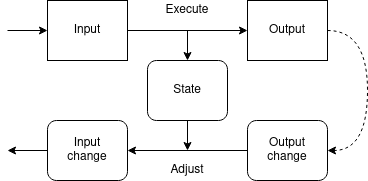

In [11]:
def adjust(func, ins, out, dout):
    """Composable value-aware function adjustment, via reversing execution.

    After execution, propagates loss of output through insides to inputs.
    Make sure that state variables are declared in the order of their usage, the result being the last."""
    if hasattr(func, 'adjust'):
        return func.adjust(ins, out, dout)



TL._args = None
TL._dargs = None

class args:
    """Represents args of the currently-called function."""
    def __new__(cls): return cls._singleton
    def call():
        return TL._args
    def adjust(i,o,do):
        TL._dargs = do
args._singleton = Struct(args)



def _merge(a,b):
    """When an execution graph node is used N times in an adjusted computation, this is called N-1 times to merge adjustments."""
    if a is None:
        return b
    elif b is None:
        return a
    elif type(a) is list:
        if type(b) is not list and type(b) is not tuple:
            print('Expected list to merge to A, got B:', a, b)
            print('  in node', _get_outer_node())
            assert False, "Not enough list-ness"
        if len(a) != len(b):
            print(a, b, 'in', _get_outer_node())
            raise TypeError('Lengths are unequal')
        for i in range(len(a)):
            a[i] = _merge(a[i], b[i])
        return a
    else:
        return a + b



@attr(superseded = True)
def wrap_function(f, initial_state):
    """Wrap a function with intro/outro that set up state and cache properly."""
    def execute_func(*args):
        """Change some stuff, execute the wrapped function, then restore that stuff."""
        prev_current_func, TL._current_func = TL._current_func, execute_func
        prev_cache, TL._cache = TL._cache, {}
        prev_args, TL._args = TL._args, args
        with SetExecState(execute_func, TL._cache):
            try: # Call f:
                with state.override(execute_func.states):
                    return f(TL._current_state_object, *args)
            finally:
                # Restore:
                TL._current_func = prev_current_func
                TL._cache = prev_cache
                TL._args = prev_args

    f.states = {id(execute_func):initial_state}
    for k,v in vars(f).items():
        setattr(execute_func, k, v)
    def execute_func_adjust(ins, out, dout):
        prev_dargs, TL._dargs = TL._dargs, None
        with GetExecState(execute_func) as outs:
            try:
                postorder = _postorder(initial_state)

                indexes = {}
                for i in range(len(postorder)):
                    if isinstance(postorder[i], Struct):
                        indexes[id(postorder[i])] = i

                douts = [None] * len(postorder)
                douts[-1] = dout
                # Assuming that the last defined value is the result.
                #   Ideally, if we have no guarantees,
                #   we'd learn adjustment of every entry point.

                def get_ins(i):
                    n = postorder[i]
                    return [
                        n[j] if id(n[j]) not in indexes
                        else get_out(indexes[id(n[j])])
                            for j in range(1, len(n))]
                def get_out(i):
                    return outs[id(postorder[i])]
                def get_dout(i):
                    return douts[i]
                def set_dins(i, to):
                    # Push `to` to args of a node at `i`:
                    if to is None:
                        return
                    n = postorder[i]
                    if len(n)-1 != len(to):
                        raise TypeError('Wrong count of dins returned from an adjuster')
                    for j in range(1, len(n)):
                        child = n[j]
                        while _fallthrough(child) is not child: child = _fallthrough(child)
                        if id(child) not in indexes:
                            continue
                        in_index = indexes[id(child)]
                        douts[in_index] = _merge(douts[in_index], to[j-1])

                for i in reversed(range(len(postorder))):
                    node = postorder[i]
                    if isinstance(node, Struct) and _fallthrough(node) is node:
                        o = adjust(node[0], get_ins(i), get_out(i), get_dout(i))
                        set_dins(i, o)
                return TL._dargs
            finally:
                TL._dargs = prev_dargs
    execute_func.adjust = execute_func_adjust
    execute_func.__annotations__ = f.__annotations__
    return execute_func

It's not thread-safe, because I don't know anything about how to write thread-safe code in Python.    
(Reading more, you basically have to use multiple processes. So, global variables should not be a problem.)    
[…We eventually made global variables thread-local anyway, in order to simply make our code more robust in usage.]

There are a lot of moving pieces and global variables, but as long as we almost unfailingly adhere to low-level standards (always restore after changing, don't misplace values, respect the host language) and don't get carried away with implementing things we haven't said we would, we should be able to remove bugs with just a few simple tests.

In [12]:
@attr(superseded = True)
def exec_then_adjust(loss, func, *args):
    with ExecState():
        result = func(*args)
        print('dins', adjust(func, args, result, loss(args, result)))
        print('  ->', result)
        return result



def test_adj():
    a = args()
    x = Struct(access_many, a, 0)
    y = Struct(access_many, a, 1)
    
    
    @attr(adjust = lambda i,o,do: [5])
    def func1(x):
        return x+5
    
    @attr(adjust = lambda i,o,do: [do * i[1], do * i[0]])
    def func2(u,v):
        return u*v
    
    @attr(adjust = lambda i,o,do: [do / i[1], do / i[0]])
    def func3(u,v):
        return u*v
    
    
    @state(result = Struct(func1, x))
    def test1(st, x):
        return st.result
    
    @state(result = Struct(func2, x, y))
    def test2(st, x, y):
        return st.result
    
    @state(result = Struct(func2, x, Struct(func2, x, y)))
    def test3(st, x, y):
        return st.result
    
    @state(result = Struct(func3, x, y))
    def test4(st, x, y):
        return st.result
    
    @state(result = Struct(func3, x, Struct(func3, x, y)))
    def test5(st, x, y):
        return st.result
    
    exec_then_adjust(lambda args, result: result, test1, 2)
    exec_then_adjust(lambda args, result: result, test2, 1, 5)
    exec_then_adjust(lambda args, result: result, test3, 1, 5)
    exec_then_adjust(lambda args, result: result, test4, 1, 5)
    exec_then_adjust(lambda args, result: result, test5, 1, 5)
test_adj()

dins [5]
  -> 7
dins [25, 5]
  -> 5
dins [50, 5]
  -> 5
dins [1.0, 5.0]
  -> 5
dins [2.0, 5.0]
  -> 5


We can now do what neural networks do, but much slower and more generally.    
Though not yet searching for adjustments, we learned how to do them.

Let's slow down for a second, and relax.    
Say.    
When you were a child, who did you want to be when you grew up?    
I wanted to be.

But enough fooling around.

Let's make a simple neural network.    
Trivia time: neural networks were thought up to mimic human neurons, connecting everything relevant to everything wanted with trivial operations.    
As anyone who has ever looked at a human brain can attest, `tensordot(x, w, (-1,0))` is exactly what's going on there.    
Equivalently, a matrix multiplication of a row vector by weights. Or a nested loop of inputs and outputs, multiplying each input by each weight then summing into the output. These are more verbose.

Add some gradient descent for training, some non-linear operations, and a training loop, and we have:

```bash
pip3 install numpy
pip3 install matplotlib
```

In [13]:
class Past:
    superseded = True
    @staticmethod
    def save(x): ...

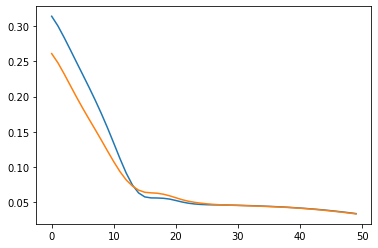

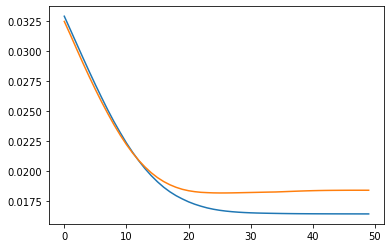

18.8726622449758 s


In [14]:
import numpy as np



TL.var_deltas = {}
class var:
    superseded = True
    """A variable that holds and subtracts from a numpy array, for SGD (with Nesterov momentum)."""
    def __new__(cls, v, speed, deceleration = .8):
        return Struct(cls, v, np.zeros_like(v), speed, deceleration)
    def call(v, momentum, speed, decel):
        return v + decel * momentum
    def adjust(i,o,do):
        if do is None: return
        v, momentum, speed, decel = i
        # Standard SGD is adding `-speed * do` to `v` (decel=0).
        # But just one learning_rate switch is not the perfection.
        # Seeing the code, it can be made into anything: momentum with state like here, a NN, etc.
        mom2 = decel * momentum - (1 - decel) * speed * do
        var.update(momentum, mom2 - momentum)
        var.update(v, mom2)

    def filter(_, __): return False

    @staticmethod
    def update(v, delta):
        d, i = TL.var_deltas, id(v)
        if i in d:
            d[i][1][:] = _merge(d[i][1], delta)
            d[i][2] += 1
        else:
            d[i] = [v, delta, 1]
    @staticmethod
    def commit(cancel = False):
        if not cancel:
            for v, delta, n in TL.var_deltas.values():
                Past.save(v)
                v[:] += delta / n
                # Changing global learning rate can't compensate for this division in non-fixed-control-flow.
        TL.var_deltas.clear()
    @staticmethod
    def _see(x):
        return x
    @staticmethod
    def batch(x):
        yield x




@attr(adjust = lambda i,o,do: [np.where(i[0] > 0, do, do * 0.001)] if do is not None else None)
def leaky_relu(v):
    """An operation that introduces discontinuity."""
    return np.where(v > 0, v, v * 0.001)



def _dense_adjust(i,o,do):
    # https://github.com/tensorflow/tensorflow/blob/v2.2.0/tensorflow/python/ops/math_grad.py#L1668
    x,w = i
    if x is None:
        x = np.zeros(w.shape[0]); x[0] = 1.
    if do is None:
        return
    dx = np.matmul(do, np.transpose(w))
    dw = np.matmul(np.reshape(x, (w.shape[0], 1)), np.reshape(do, (1, w.shape[1])))
    return dx, dw
@attr(adjust = _dense_adjust)
def dense(x, w):
    """Linearly connects every input to every output.

    The second argument is a random matrix of .shape = (input_size, output_size)."""
    if x is None:
        x = np.zeros(w.shape[0]); x[0] = 1.
    return np.matmul(x, w)
    # If x is always of the shape (n,), then what's below is the same as the line above:
    # return np.tensordot(x, w, axes = (-1,0))



@attr(adjust = lambda i,o,do: (i[0] - i[1], i[1] - i[0]))
def loss2(predicted, got):
    return (predicted - got) * (predicted - got) / 2

@attr(superseded = True)
def fit_dataset(func, dataset, loss = loss2):
    # This function we've made will likely come in handy later, though it could stand to gain validation.
    test_losses = []
    for io in dataset:
        # Normally, this loop is parallelized by adding a batch dimension to all inputs and outputs.
        #   (Even though a GPU is not exactly a SIMD processor.)
        ins, intended_out = io
        out = func(*ins)
        out_loss = loss(out, intended_out)
        test_losses.append(out_loss)
        dout, _ = adjust(loss, (out, intended_out), out_loss, 0)
        adjust(func, ins, out, dout)
    var.commit()
    return sum(test_losses) / len(test_losses), None

@attr(superseded = True)
def fit_dataset_with_validation(func, dataset, loss = loss2, validation_perc = 0.2):
    # Oh look, I wanted it, and validation appeared by itself.
    import math
    i, size = 0, len(dataset)
    testing = math.floor(size * (1.0 - validation_perc))
    test_losses, validation_losses = [], []
    for io in dataset:
        ins, intended_out = io
        out = func(*ins)
        out_loss = loss(out, intended_out)
        if testing > 0:
            test_losses.append(out_loss)
            dout, _ = adjust(loss, (out, intended_out), out_loss, 0)
            adjust(func, ins, out, dout)
            testing -= 1
        else:
            validation_losses.append(out_loss)
    var.commit()
    return sum(test_losses) / len(test_losses), sum(validation_losses) / len(validation_losses)



def test_nn(N = 100):
    rng = np.random.default_rng()
    def weights(*shapes):
        return var(rng.normal(0, 1, shapes), 1)

    def concat(x, y):
        return np.array([x, y])

    x = Struct(access_many, args(), 0)
    y = Struct(access_many, args(), 1)
    L = Struct(concat, x, y) # (2,)

    L = Struct(dense, L, weights(2,3)) # (3,)
    L = Struct(leaky_relu, L)
    L = Struct(dense, L, weights(3,1)) # (1,)

    L = Struct(access_many, L, 0)

    @state(result = L)
    def nn(st, x, y):
        return st.result


    import matplotlib.pyplot as plt
    dataset = [[(x/10, y/10), (x*x + y*y)/100] for x in range(-10, 10) for y in range(-10, 10)]
    random.shuffle(dataset)
    losses, vs = [], []
    for i in range(N):
        l, v = fit_dataset_with_validation(nn, dataset)
        sys.stdout.write(f'Iteration {i+1}/{N}, loss {l}\r')
        sys.stdout.flush()
        if l > 1e10:
            print('exploding — restarting')
            raise RuntimeError()
        losses.append(l)
        vs.append(v)
        if i % 50 == 49:
            plt.plot(losses)
            plt.plot(vs)
            plt.show()
            losses.clear(), vs.clear()



while True:
    # A fancier `test_nn()` with re-trying on RuntimeError.
    from timeit import timeit
    try: print(timeit(test_nn, number=1), 's'); break
    except RuntimeError: continue

In truth, I did feel not a small amount of anxiety at running this code.    
So I took a big break and did another thing.    
For a week.    
Now that it's done, I'm allowed to believe that the only suffering that must not be actively sought out is one that can actually kill.    
If a life doesn't spread its own ways through propaganda, then it won't be a life for much longer.    
So, in the absence of death, invert common sense.

## Computation revisited

***&lt;Where we improve the interpreter and make a compiler.&gt;***

Over and over.

Computations in a function are acyclic, but between functions, they may be cyclic to allow recursion.    
So we cannot simply generate everything up-front, and must re-generate function bodies dynamically.

But, the interface we want first:

```python
@state(result = one(0,1))
def func0(st, a: one('x', 'y')) -> one(0,1):
    return st.result

@state(result = one(0,1))
def func1(st, a: real(0,2), b: one(0,1)) -> one(0,1):
    return st.result

@state(result = func1)
def func2(st, a: real(0,1), b: one(0,1)):
    return st.result # Applies `func` 1 or more times.

@state(c = bool())
@examples((0, 0, 0), (1, 1, 100))
def func3(st, a: real(0,1), b: real(0,1)):
    i = 0
    while st.c: # Ideally, connected with numeric ops (NNs) to inputs and local state and randomness.
        i += 1
    return i
```

Having thought about it, I've been thinking about `state` wrong.    
Repeated execution *is* desirable; situations as in `func3` here may arise in search.    
The more fundamental search specification than `state` is `AutoFunc` that connects input to output.    
With it, each attribute of `state` is a separate `AutoFunc`, and the adjustment mapping is a learned `AutoFunc` too.    
Which means that we can execute the pre-computed post-order and be as efficient in execution as in adjustment (also, cache the post-order).

Let's reimplement execution and adjustment in `AutoFunc`:

In [15]:
class AutoFunc:
    superseded = True
    """A dynamically-changeable and adjustable function with one input and one output for symmetry."""
    __slots__ = '_struct', '_postorder', '_arg_indexes', '_ctx', '_compiled', '__weakref__'
    # Only ._struct is semantically mutable, via ._set_body; ._postorder/._arg_indexes/._compiled are computed.
    def __init__(self, ins_type, out_type = None, ctx = None, body = None):
        self._struct = None
        self._compiled = None
        self._postorder = None
        self._arg_indexes = None
        self._ctx = [ins_type, *ctx] if ctx is not None else [ins_type]
        assert out_type is None
        self._set_body(body)

    def __call__(self, ins):
        """Function call, with one input.

        Goes through the post-order SSA and executes it, from input to output."""
        ## Things that can also be done:
        ##   bail on exceeding some max time or memory,
        ##   apply any rewriting whenever (if an arbitrary bool is True).
        if self._compiled is not None:
            return self._compiled(ins)
        po, ais = self._postorder, self._arg_indexes
        if po is None:
            s = self._struct
            while _fallthrough(s) is not s: s = _fallthrough(s)
            return s
        with SetExecState(self, [None] * len(po)) as outs:
            prev_outer_node = _get_outer_node()
            prev_args, TL._args = TL._args, ins
            try:
                for i in range(len(po)):
                    x, ai = po[i], ais[i]
                    if isinstance(x, Struct):
                        if _fallthrough(x) is x:
                            ins = [
                                outs[ai[k]] if ai[k] is not None else x[k+1]
                                for k in range(len(ai))]
                            _set_outer_node(x)
                            outs[i] = x[0].call(*ins) if hasattr(x[0], 'call') else x[0](*ins)
                        else:
                            outs[i] = outs[ai] if ai is not None else _fallthrough(x)
                return outs[-1]
            finally:
                _set_outer_node(prev_outer_node)
                TL._args = prev_args

    def adjust(self, ins, out, dout):
        """Composable value-aware function adjustment.
        
        Goes through the post-order SSA in reverse and adjusts it, from output to input."""
        if self._compiled is not None:
            return self._compiled.adjust(ins, out, dout)
        po, ais = self._postorder, self._arg_indexes
        if po is None:
            return
        with GetExecState(self) as outs:
            prev_outer_node = _get_outer_node()
            prev_dargs, TL._dargs = TL._dargs, None
            try:
                douts = [None] * len(po)
                douts[-1] = dout

                for i in reversed(range(len(po))):
                    x, ai = po[i], ais[i]
                    if isinstance(x, Struct):
                        if _fallthrough(x) is x:
                            ins = [
                                outs[ai[k]] if ai[k] is not None else x[k+1]
                                for k in range(len(ai))]
                            _set_outer_node(x)
                            to = adjust(x[0], ins, outs[i], douts[i])

                            if to is not None:
                                if len(ai) != len(to):
                                    raise TypeError('Wrong count of dins returned from an adjuster: expected', len(ai), 'but got', len(to), 'in', to)
                                for k in range(len(ai)):
                                    if ai[k] is not None:
                                        douts[ai[k]] = _merge(douts[ai[k]], to[k])
                        elif ai is not None:
                            douts[ai] = _merge(douts[ai], douts[i])
                return TL._dargs
            finally:
                _set_outer_node(prev_outer_node)
                TL._dargs = prev_dargs

    def _set_body(self, struct, po = None, ai = None, compiled = None):
        """Sets the executed structure, pre-filling types and postorder and arg indexes from graph connections."""
        if struct is self._struct:
            return
        if self._struct is not None:
            Past.save(self)
        if po is None and ai is None:
            po = _postorder(struct)
            if po is not None:
                ai = [None] * len(po)
                indexes = {}
                for i in range(len(po)):
                    if isinstance(po[i], Struct):
                        indexes[id(po[i])] = i
                for i in range(len(po)):
                    n = po[i]
                    if isinstance(n, Struct):
                        if _fallthrough(n) is n:
                            ai[i] = [None] * (len(n)-1)
                            for j in range(1, len(n)):
                                arg = n[j]
                                if id(arg) in indexes:
                                    if indexes[id(arg)] >= i:
                                        raise AssertionError('Cycles in computation', po)
                                    ai[i][j-1] = indexes[id(arg)]
                                else:
                                    ai[i][j-1] = None
                        elif id(_fallthrough(n)) in indexes:
                            ai[i] = indexes[id(_fallthrough(n))]
                        else:
                            ai[i] = None
            else:
                ai = None
        self._struct, self._postorder, self._arg_indexes = struct, po, ai
        self._compiled = _compile_af(self) if compiled is None else compiled



# BONUS:
def _compile_af(af):
    # I ended up watching too much physics and making this.
    #   Incidentally, I fixed a latent bug in `adjust`.
    #     Wasting time on loving something is great.
    po, ais = af._postorder, af._arg_indexes
    if po is None:
        return
    # Pass in constants as args of the outer function.
    src, consts, const_names = ['def outer(.·¯):'], {}, {}
    def const(x):
        if id(x) in const_names: return const_names[id(x)]
        name = 'c' + str(len(consts))
        assert name not in consts, "Overwriting a name"
        consts[name] = x
        const_names[id(x)] = name
        return name
    def at(i, s = 's'): return s + '[' + str(i) + ']'
    def assign(i, *strs):
        to = (str(i) + ' = ') if i is not None else ''
        src.append('\n    ' + to + ''.join(strs))
    af_name = const(af)

    # Execute SSA statements:
    src.append(f'\n def inner(ins):')
    src.append(f'\n  with {const(SetExecState)}({af_name}, [None]*{str(len(po))}) as s:')
    src.append(f'\n   prev_outer_node = {const(_get_outer_node)}()')
    src.append(f'\n   try:')
    for i in range(len(po)):
        x, ai = po[i], ais[i]
        if isinstance(x, Struct):
            if x[0] is args:
                assign(at(i), 'ins')
            elif _fallthrough(x) is x:
                ins = [
                    at(ai[k]) if ai[k] is not None else const(x[k+1])
                    for k in range(len(ai))]
                assign(None, const(_set_outer_node), '(', const(x), ')')
                assign(at(i), const(x[0].call if hasattr(x[0], 'call') else x[0]), '(', ','.join(ins), ')')
            else:
                assign(at(i), at(ai) if ai is not None else const(_fallthrough(x)))
    src.append(f'\n   finally:')
    src.append(f'\n    {const(_set_outer_node)}(prev_outer_node)')
    src.append(f'\n  return {at(len(po) - 1)}')

    # Adjust SSA statements:
    src.append(f'\n def inner_adjust(ins, out, dout):')
    src.append(f'\n  dins = None')
    src.append(f'\n  ds = [None]*{str(len(po))}')
    src.append(f'\n  ds[{str(len(po)-1)}] = dout')
    src.append(f'\n  with {const(GetExecState)}({af_name}) as s:')
    src.append(f'\n   prev_outer_node = {const(_get_outer_node)}()')
    src.append(f'\n   try:')
    for i in reversed(range(len(po))):
        x, ai = po[i], ais[i]
        if isinstance(x, Struct):
            if x[0] is args:
                assign('dins', at(i, 'ds'))
            elif _fallthrough(x) is x:
                ins = [
                    at(ai[k]) if ai[k] is not None else const(x[k+1])
                    for k in range(len(ai))]
                assign(None, const(_set_outer_node), '(', const(x), ')')
                # Using `[v1, v2, _, v3] = _merge([v1, v2, None, v3], adjust(…))` here.
                #   Could be inlined, but since we don't have access to adjusting funcs and
                #     so can't eliminate tuple creation, that should be JIT's job.
                write_to = '[' + ','.join([at(a, 'ds') if a is not None else '_' for a in ai]) + ']'
                read_from = '[' + ','.join([at(a, 'ds') if a is not None else 'None' for a in ai]) + ']'
                to = f'{const(adjust)}({const(x[0])}, [{",".join(ins)}], {at(i)}, {at(i, "ds")})'
                assign(write_to, f'{const(_merge)}({read_from}, {to})')
            elif ai is not None:
                assign(at(ai, 'ds'), f'{const(_merge)}({at(ai, "ds")}, {at(i, "ds")})')
    src.append(f'\n   finally:')
    src.append(f'\n    {const(_set_outer_node)}(prev_outer_node)')
    src.append(f'\n  return (dins,)')

    src.append(f'\n inner.adjust = inner_adjust')
    src.append(f'\n return inner')
    src[0] = f'def outer({",".join(consts.keys())}):'

    locs = {}
    exec(''.join(src), { '__builtins__':{} }, locs)
    return locs['outer'](*consts.values())

No paragraph is perfect without edits.    
No code ever works the first time.    
Therefore, we have examples:

In [16]:
def test_af():
    a = args()
    x = Struct(access_many, a, 0)
    y = Struct(access_many, a, 1)

    @attr(adjust = lambda i,o,do: [5])
    def func1(x):
        return x+5
    @attr(adjust = lambda i,o,do: [do * i[1], do * i[0]])
    def func2(u,v):
        return u*v
    @attr(adjust = lambda i,o,do: [do / i[1], do / i[0]])
    def func3(u,v): # Non-gradient heretical thoughts
        return u*v

    test1 = AutoFunc(None, body = Struct(func1, x))
    test2 = AutoFunc(None, body = Struct(func2, x, y))
    test3 = AutoFunc(None, body = Struct(func2, x, Struct(func2, x, y)))
    test4 = AutoFunc(None, body = Struct(func3, x, y))
    test5 = AutoFunc(None, body = Struct(func3, x, Struct(func3, x, y)))

    exec_then_adjust(lambda args, result: result, test1, [2])
    exec_then_adjust(lambda args, result: result, test2, [1, 5])
    exec_then_adjust(lambda args, result: result, test3, [1, 5])
    exec_then_adjust(lambda args, result: result, test4, [1, 5])
    exec_then_adjust(lambda args, result: result, test5, [1, 5])

from timeit import timeit
timeit(test_af, number=1)

dins ([5],)
  -> 7
dins ([25, 5],)
  -> 5
dins ([50, 5],)
  -> 5
dins ([1.0, 5.0],)
  -> 5
dins ([2.0, 5.0],)
  -> 5


0.008600055007264018

Finer than a spring evening.

## General optimization (local search)

***&lt;Where we add checkpointing because history nodes weren't enough.&gt;***

While we're near `AutoFunc`, let's add some simple general optimization to it.

Most general case of improvement:     
"*Try random shit and see what works.*"    
If there is no known structure to exploit…    
Then this is the only state-of-the-art possible [[X]](https://arxiv.org/abs/2005.02960).    
(If life advice and code don't agree, then it's code that's not yet good enough. And now and here, they do.)

In code, this may translate to simply `with Past() as shit:` (which should generate evaluation then any change then evaluation, then comparison) and `shit.go_back()`.

Let's implement it then.    
We'll need a unified way of remembering the state before changes: `Past.save(what)`, and use that on every change.    
…In fact, we already do call `Past.save` in `AutoFunc(…)._set_body(…)` near the beginning. Huh. What a coincidence.    

In [17]:
_checkpoints = []

class Past:
    """
    A context manager that preserves a checkpoint of mutable state that can be went back to.

    Classes should define .past_save and .past_go_back if they have state that can be changed.

    Usage examples:

        # Try and maybe go back:
        evaluate()
        m1 = measure()
        with Past() as shit:
            change()
            evaluate()
            m = measure()

            if m < m1:
                shit.go_back()

        # Train and make/restore checkpoints:
        with Past() as p1:
            with Past() as p2:
                with Past() as p3:
                    m1 = m2 = m3 = measure()
                    while not stopping():
                        change_hyperparameters()
                        train()
                        m = measure()
                        if m < m1: p1.go_back()
                        elif m < m2: p2.go_back()
                        elif m < m3: p3.go_back()
                        else:
                            if condition1(): p1.update()
                            elif condition2(): p2.update()
                            elif condition3(): p3.update()
    """
    superseded = 'just fell out of favor'
    __slots__ = ['cp']
    def __enter__(self):
        self.cp = {}
        _checkpoints.append(self.cp)
        return self
    def __exit__(self,x,y,z):
        assert _checkpoints[-1] is self.cp
        _checkpoints.pop()

    def update(self):
        """Makes the remembered state the current state.

        Same as creating a new Past and only using that from this point on."""
        self.cp.clear()
    def go_back(self):
        """Makes the current state the remembered state."""
        for z in self.cp.values():
            if z is ...: continue
            Past.save(z[0])
            if hasattr(z[0], 'past_go_back'):
                z[0].past_go_back(z[1])
            else:
                z[0][:] = z[1]
        self.cp.clear()

    @staticmethod
    def save(what):
        """Call this before changing a sequence, to allow it to be restored in `past.go_back()`."""
        saving = None
        for cp in _checkpoints:
            if id(what) not in cp:
                if saving is None:
                    if hasattr(what, 'past_save'):
                        saving = what, what.past_save()
                    else:
                        # I initially used what[:] here and made a note to pass in np.copy as the second arg if numpy,
                        #   but what.copy() turns out to exist on both python3 lists and numpy arrays.
                        # I edit so much that I must seem like some sort of genius.
                        saving = what, what.copy()
                cp[id(what)] = saving
        return what
    @staticmethod
    def new(what):
        """Call this when constructing an object, to prevent it from being saved in already-existing pasts."""
        for cp in _checkpoints:
            if id(what) not in cp:
                cp[id(what)] = ...
        return what



AutoFunc.past_save = lambda af: (af._struct, af._postorder, af._arg_indexes, af._compiled)
AutoFunc.past_go_back = lambda af, saved: af._set_body(*saved)

The ability to constantly do random dumb shit, free will, is very important.    
Making a system through only that is the only way it can learn to counteract any malicious shit.    
It's called self-play in games. But I call it mastering the improvement of structured executable state, to the point where it's easier to use than not.    
Leaving in random twists of thought can make texts more alive, too.

Still, life is a clunky dinosaur.    
In it, adding the right thing is easy, but removing all the wrong things is nigh impossible.    
Code is much easier than that. You just write unit tests and test every part as it's created.

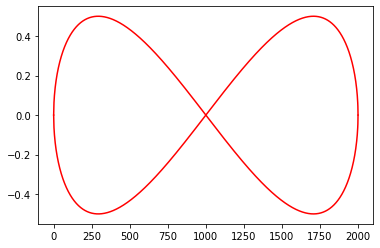

[10] [2]
[1] [2]
[5] [6]
[1] [2]
[7] [2]
[20] [2]
[7] [30]


In [18]:
# Actually, screw testing that code, it's too simple.
import matplotlib.pyplot as plt
plt.plot([ math.sqrt((i/1000)*(i/1000) * (1 - (i/1000)*(i/1000))) for i in range(-1000, 1001)], 'r')
plt.plot([-math.sqrt((i/1000)*(i/1000) * (1 - (i/1000)*(i/1000))) for i in range(-1000, 1001)], 'r')
plt.show()

# Actually, screw screwing, let's test it.
def test_past():
    a, b = [1], [2]

    with Past() as shit:
        Past.save(a);  a[0] = 10
        print(a, b) # [10] [2]
        shit.go_back()
        print(a, b) # [1] [2]
        Past.save(a);  a[0] = 5
        Past.save(b);  b[0] = 6
        print(a, b) # [5] [6]
        shit.go_back()
        print(a, b) # [1] [2]
        Past.save(a);  a[0] = 7
        shit.update()
        Past.save(a);  a[0] = 8
        shit.go_back()
        print(a, b) # [7] [2]

    with Past() as p1:
        with Past() as p2:
            Past.save(a);  a[0] = 20
            p1.update()
            p2.go_back()
            Past.save(b);  b[0] = 30
            p2.update()
            p1.go_back()
            print(a, b) # [20] [2]
            p2.go_back()
            print(a, b) # [7] [30]
            # Yep, bugs found and fixed. Code is not as simple anymore.
            #   Multi-past manipulations are handled now.
    
test_past()

Eventually, we'd like this `Past` optimizer to optimize optimizers.    
But usage examples of `Past` don't have a static structure.    
"Optimizer" isn't some class with well-defined construction, it's just whatever code improves other code.    
It's vast, boundless, and unknowable — just how I like females of my species.

We'll want to generate expressions (bodies inside `with Past as p: ...`) that both know of functions (`p.update()`/`p.go_back()`) and generate a sequence (of change/evaluate/check, here; probably via the `last(*types)` type that returns the last value when evaluated).    
We'll possibly need a thing in a context to be able to say that it can create any value, or specify an arbitrary struct filter, maybe saying that its `.type` is `...`.

Now, the changes for `Past` to optimize…

## Composition in a typed context

***&lt;Where we awkwardly generate correctly-typed programs.&gt;***

Stop right there, criminal scum!    
Trying to get to graph rewriting without the classic of program search, generation of values of a type? Easy pickings? I see right through you.    
Pick one: a toll of separation, or time in complexity prison?    
Okay, I'll pay up.

To be clear, a type is a pure transformation from an expression (`AutoFunc(…)._struct`) to a thing that should denote all its possible outputs.

From value to type: `Context.type(value)`, listening to `.type` for functions and caching results.    
From type to value: `Context.enum(type)`, listening to `.filter` if defined, or to `.enum` (the first can do slow dependent types without knowing internal details of `Context`, the second can do union types and give max extensibility via its branch-to-data).

In addition, after creating a value, we may want to remember it so that we can return it from a future request of generation.    
Meaning `Context.add(value)`.

But we can't infinitely add all possible values forever.    
Do we make a function for clearing the remembered context, or make a context manager?    
Changing the context entirely would allow the same types to mean different things in different places.    
`with Context(*values):` would serve us well.

And contexts being iterable won't cause pain.

In [19]:
class Context:
    """
    A context of typed values.

    With it, can get the type of a value or enumerate values of a type,
    or remember that a found value exists, or enumerate all values.
    Only one context can be active at the same time (`with Context(…):`).

    Functions here read attributes `.typeof`, `.add`, `.filter`, `.enum`, `.finish`.
    """
    superseded = 'just fell out of favor'
    @staticmethod
    def typeof(value):
        """Gets the type of a value in the current context.

        Defers to `.typeof(value)` if defined on a `Struct`, else returns `value`."""
        assert TL._current_context is not None, 'Use only inside `with Context():`'
        return TL._current_context._typeof(value)

    @staticmethod
    def add(value):
        """Adds to values of a type in the current context.

        Iterates over `.add(value)` if defined on a `Struct`, else adds to values of `id(type)`.
        Adding a Context adds all values in it.

        Same-head `Struct` types are put into the same bucket.
        Make the head define `.filter` to control which items in a bucket are enumerated."""
        assert TL._current_context is not None, 'Use only inside `with Context():`'
        return TL._current_context._add(value)

    @staticmethod
    def enum(Type):
        """Iterates over intermediate values of a type in the current context.

        Before being used, these intermediate values must go through `Context.finish`.

        If the type defines `.filter(value)` that returns True if a value is fit for being enumerated,
        filters values in the type's bucket.
        If the type defines `.enum()` and can enumerate/create values itself, also defers to that."""
        assert TL._current_context is not None, 'Use only inside `with Context():`'
        return TL._current_context._enum(Type)

    @staticmethod
    def finish(intermed, Type):
        """Turns an intermediate value into a usable value of a type."""
        if _defines(intermed, 'finish'):
            return _defines(intermed, 'finish')(intermed, Type)
        return intermed

    @staticmethod
    def get(Type):
        """Returns just one value of a type in the current context."""
        opts = []
        for v in Context.enum(Type):
            opts.append(v)
            if len(opts) > 64: break
        if not len(opts):
            raise _EmptyType("No instances of the type", Type)

        return Context.finish(Context.pick(opts), Type)

    @staticmethod
    def pick(options):
        """Picks any one item of an array."""
        ## Could instead compute some learned measure for each option, then pick the best or sample.
        return random.choice(options)

    @staticmethod
    def type(value, Type):
        """Assigns a different type to a value. Should be called before adding that value to the context.

        Nodes that rely on `Context.type` to set their type will be impossible to dynamically re-generate.
        Example: `Context.type(args(), many(1,2,3))`."""
        ctx = TL._current_context
        assert ctx is not None, 'Use only inside `with Context():`'
        vt = ctx._valueid_to_type
        prev_type = vt.get(id(value))
        vt[id(value)] = Type
        ctx._add(value, prev_type)
        return value

    @staticmethod
    def _current():
        """Returns the current context."""
        return TL._current_context

    def _typeof(self, value):
        while _fallthrough(value) is not value: value = _fallthrough(value)
        # Cache, else defer to .typeof:
        vt = self._valueid_to_type
        if id(value) in vt:
            return vt[id(value)]
        f = _defines(value, 'typeof')
        if f is not None:
            i = id(value)
            vt[i] = None
            vt[i] = f(value)
            # id(value) may be re-used if value is freed, so that must clear the cache.
            #   (Assuming that types outlive the context, and do not require clearing.)
            weakref.finalize(value, _clear_dict_key, self._valueid_to_type, i)
            return vt[i]
        return value

    def _add(self, value, prev_type = None):
        tv = self._typeid_to_values
        if not isinstance(value, Context):
            # Add or move value and user-defined .additions to appropriate spot/s:
            was_present = id(value) in self._valueid_to_type
            Type = self._typeof(value)
            if _defines(Type, 'add'):
                for v in _defines(Type, 'add')(value):
                    self._add(v)

            tid = _typeid(Type)
            Past.save(self)
            if prev_type is not None and _typeid(prev_type) != tid and tid in tv:
                tv[tid].pop(id(value), None)
            if Type is not None:
                if tid not in tv:
                    tv[tid] = {}
                tv[tid][id(value)] = value
        else:
            # Copy everything in the context:
            Past.save(self)
            self._valueid_to_type.update(value._valueid_to_type)
            for tid, vs in value._typeid_to_values.items():
                if tid not in tv:
                    tv[tid] = {}
                tv[tid].update(vs)
        return value

    def _enum(self, Type):
        # Yield (possibly .filtered) same-head-type values, then user-defined enumeration.
        if Type is ...:
            yield from self
            return
        tv = self._typeid_to_values
        tid = _typeid(Type)
        if tid in tv:
            f = _defines(Type, 'filter')
            if f is not None:
                for v in tv[tid].values():
                    if f(Type, v):
                        yield v
            elif tid in tv:
                yield from tv[tid].values()
        if _defines(Type, 'enum'):
            yield from _defines(Type, 'enum')(Type)

    def _clear(self):
        self._typeid_to_values.clear()
        self._valueid_to_type.clear()

    def __iter__(self):
        seen = set()
        for vs in self._typeid_to_values.values():
            for v in vs.values():
                if id(v) not in seen: yield v
                seen.add(id(v))

    def past_save(self):
        return self._typeid_to_values.copy(), self._valueid_to_type.copy()
    def past_go_back(self, saved):
        tv, vt = self._typeid_to_values, self._valueid_to_type
        tv.clear();  tv.update(saved[0])
        vt.clear();  vt.update(saved[1])

    def __init__(self, *values):
        self._prev_cc = None
        self._valueid_to_type = {}
        self._typeid_to_values = {}
        Past.new(self)
        with self:
            for v in values: self._add(v)

    def __enter__(self):
        assert self._prev_cc is None # We remember none
        self._prev_cc, TL._current_context = TL._current_context, self
        return self

    def __exit__(self,x,y,z):
        assert TL._current_context is self
        TL._current_context, self._prev_cc = self._prev_cc, None

    def __getstate__(self):
        return self._typeid_to_values, self._valueid_to_type
    def __setstate__(self, state):
        self._typeid_to_values, self._valueid_to_type = state
        self._prev_cc = None

    __slots__ = '_typeid_to_values', '_valueid_to_type', '_prev_cc'

TL._current_context = None

def _clear_dict_key(d, k):
    if k in d: del d[k]

def _typeid(Type): return id(Type) if not isinstance(Type, Struct) else id(Type[0])

def _defines(d, k):
    if isinstance(d, Struct): d = d[0]
    return getattr(d, k) if hasattr(d, k) else None

class _EmptyType(RuntimeError):
    """Type of exceptions that signals that generating an instance required an instance of an empty type."""

I enjoy Python's context managers. Much prettier than init+`try`+`finally` everywhere.    
I don't enjoy Python's string-based duck typing. The more precise approach is object-id-based definition, lacking all potential for name collision, but I'm not willing to add an extra line and an extra private method for each definition, and extra syntactic effort for access.    
This night, I dreamt of being a pigeon.

If nothing is done with knowledge, then it wasn't actually learned. Let's do some thing with it:

In [20]:
def test_ctx():
    with Context(1, 2, 3):
        print(Context.get(2))

test_ctx()

2


Remarkable.    
Just the functionality I've always missed.    
For real though, let's add types to functions.

sample: [<function test_compose.<locals>.g at 0x7fcada264280>, [<function test_compose.<locals>.initX at 0x7fcada264310>], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]] typed x
1
10
11
1000
12000
12010
120100


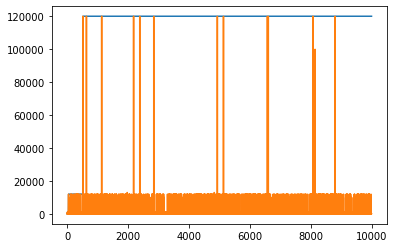

best body: [<function test_compose.<locals>.g at 0x7fcada264280>, [<function test_compose.<locals>.f at 0x7fcada2641f0>, [<function test_compose.<locals>.g at 0x7fcada264280>, [<function test_compose.<locals>.g at 0x7fcada264280>, [<function test_compose.<locals>.f at 0x7fcada2641f0>, [<function test_compose.<locals>.g at 0x7fcada264280>, [<function test_compose.<locals>.f at 0x7fcada2641f0>, [<function test_compose.<locals>.initX at 0x7fcada264310>], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]], [<function test_compose.<locals>.initY at 0x7fcada2643a0>]]


In [21]:
class compose:
    """
    A function decorator for specifying input and output types, for composition. Modifies the function.
    """
    superseded = 'just fell out of favor'
    def __init__(self, *ins, out = None):
        self.ins = ins
        self.out = out

    def __call__(self, f):
        assert not hasattr(f, 'typeof'), "Don't forget that `compose(…)(f)` modifies f"
        ins, out = self.ins, self.out
        if out is None:
            # Extract ins/out from signature. Assuming that all params are positional.
            assert len(ins) == 0, "If `out` was not specified, inputs will be inferred too"
            import inspect
            sig = inspect.signature(f)
            ins = [_pythons_to_ours(sig.parameters[p].annotation) for p in sig.parameters]
            out = _pythons_to_ours(sig.return_annotation)
        f._compose_signature = ins, out

        f.typeof = _compose_typeof
        f.filter = _compose_filter
        f.finish = _compose_finish
        if _defines(out, 'add') is not None:
            f.add = _compose_add

        return f

    __slots__ = 'ins', 'out'

def _compose_typeof(x):
    if callable(x): # Ensure the result type is visible to enumeration.
        if not hasattr(x, '_compose_signature'): return None
        return Context.typeof(x._compose_signature[-1])
    # Check shape, then check input types, then compute/return output type.
    assert isinstance(x, Struct)
    ins, out = x[0]._compose_signature
    if len(x)-1 != len(ins): return None
    for i in range(len(ins)):
        # This could be compiled to push the overhead of runtime checking to compile-time.
        # In some newer languages, the word "staging" could be used with the same meaning.
        # Both are crutches for the lack of partial evaluation, which itself
        #   would benefit from learning, to avoid exponential inlining
        #     (and so is best suited for a JIT compiler).
        #       Understandable today. Not judging.
        if hasattr(ins[i], 'filter'):
            if not ins[i].filter(x[i+1]):
                return
        else:
            if Context.typeof(x[i+1]) != ins[i]:
                return
    if callable(out): return out(x)
    return Context.typeof(out)
def _compose_filter(enum, v):
    if callable(v) and v is not enum: return False
    return _compose_typeof(v) is not None
def _compose_finish(f, _):
    # Generate all inputs in any order (though here, first-is-first), and create the struct.
    if not callable(f): return f
    ins, _ = f._compose_signature
    return Context.add(Struct(f, *(Context.get(ins[i]) for i in range(len(ins)))))
def _compose_add(f):
    _, out = _defines(f, '_compose_signature')
    a = _defines(out, 'add')
    if a is not None:
        for v in a(f):
            yield v

def _pythons_to_ours(x):
    if not isinstance(x, Struct):
        if isinstance(x, list) or isinstance(x, tuple): return many(*x)
    if x is inspect.Parameter.empty: return ...
    return x



def test_compose():
    @compose('x', 'y', out = 'x')
    def f(x, y):
        return x + y

    @compose()
    def g(a:'x', b:'y') -> 'x':
        return a * b

    @compose()
    def initX() -> 'x':
        return 1
    @compose()
    def initY() -> 'y':
        return 10
    @compose()
    def initZ() -> 'z':
        return 100

    with Context(f, g, initX, initY, initZ):
        s = Context.get('x')
        print('sample:', s, 'typed', Context.typeof(s))


    # Maximize output when executed. (Random search, starting anew each time.)
    with Past() as shit:
        with Context(f, g, initX, initY, initZ):
            best, every = [], []
            af = AutoFunc(None)
            best_out = None
            for _ in range(10000):
                # Note that creating bodies adds each node to the context, decreasing diversity,
                #   so re-creating the context each time would easily push best output to 1e12+.
                body = Context.get('x')
                af._set_body(body)
                out = af(None)
                if best_out is None or out > best_out:
                    best_out = out
                    shit.update()
                    print(out)
                best.append(best_out)
                every.append(out)
            import matplotlib.pyplot as plt
            plt.plot(best)
            plt.plot(every)
            plt.show()
            shit.go_back()
            print('best body:', af._struct)



test_compose()

It's not advanced enough to create functions in inputs/output.    
Nor does it integrate with union/product types (future me, get on that).    
Nor does it handle failures to generate (the best "exactly when" is unknowable).    
But it's good enough for getting precise types from A to B with zero inconsistencies.    
That means that I too cannot make trivial bugs now.

Until arbitrary runtime learning is super easy, aiming for more than "good enough" is a mistake anyway.    
(`Context.get` in particular could use infinite improvement.)

---

Future me here. Product types (`many(1,2,3)`) can be satisfied with iterating over user-defined values. Wired that up.

This whole section has been mostly about directly satisfying mandates without deeper thought.

I'm uncertain of its future, but I know no better.

## Rewriting sequel

***&lt;Where we rewrite rewriting.&gt;***

Our representation of computation looks good, so let's rewrite my incomplete rewriting.

There are a few new features that we'd like to handle.    
Namely, typed contexts and adjusting present in an `AutoFunc` (and the function `_merge`).    
But also, while we're at it, it would be nice to look both ways when crossing the graph street, and allow accumulating values on descent, not just ascent.    
And, not rewrite the past of histories.

But how can we do that?

Let's begin from the end.

Our `_postorder` already does not go into pasts, so re-using that seems useful.

Our olden ascent is walking the post-order left-to-right.    
The new descent is walking the post-order right-to-left.    
Descent: `(graph_node, descent_estimate) -> (ascent_message, descent_estimate)`.    
Ascent: `(graph_node, ascent_estimate, ascent_message) -> (node_becomes, ascent_estimate)`.    
`descent_estimate`, `ascent_message`, `ascent_estimate` are variables that would need arrays in the state of rewriting.    
All possible data flow dependencies now have adjustable communication channels; the full graph is handled, local neighborhood first.    
An *everything* would be achievable in this component.

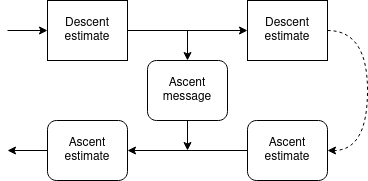

We do need to merge `descent_estimate`s of parents and `ascent_estimate`s of children in an order-independent manner, with `_merge`.

To handle generation in typed contexts, we want to wrap everything `with Context(base_ctx): …` and `Context.add(…)` each node when we've finished it (first add the old in the descent, then add the new in the ascent).

Adjusting is execution backwards.    
We'll need to return the final `ascent_estimate` from rewriting too if we hope to optimize it. It can represent how well the graph does on some measure, then optimization means computing the difference and passing it to `adjust`.    
Firstly, adjust ascent right-to-left.    
Then adjust descent left-to-right.

I would like to take a moment to discuss virtual cycles in computation ("edges" that refer to a past/future value).    
What we can do is mark a value with a "can assign X to this" or "can adjust this into X" type, both of which have define `.add` that the special result type will try to enumerate instances of, to be passed into an `assign` or `adjust` function.    
But not now. Now, we're in "implement low-level infrastructure" mode.

In [22]:
def _rewrite_adjust(ins, out, dout):
    # Python's decision to disallow proper functions in expressions is dumb.
    af, descend, ascend, *_ = ins
    po, ai = af._postorder, af._arg_indexes
    with GetExecState(rewrite) as st:
        descent_estimates, ascent_messages, ascent_estimates, nodes_become = st
        ddescent_estimates, dascent_messages, dascent_estimates = [None]*len(po), [None]*len(po), [None]*len(po)

        # Not sure why anyone would want to communicate to this all-or-nothing slot, but it's there just in case.
        dnodes_become = [None]*len(po)

        dascent_estimates[-1] = dout

        for i in reversed(range(len(po))):
            # Re-collect ascent estimate from children:
            post, ae = _merge_from_children(po[i], ai[i], ascent_estimates, po, nodes_become)

            # Adjust ascent and give estimate to children:
            ins = post, ae, ascent_messages[i]
            out = nodes_become[i], ascent_estimates[i]
            dout = dnodes_become[i], dascent_estimates[i]

            # Reverse (graph_node, ascent_estimate, ascent_message) -> (node_becomes, ascent_estimate).
            dnb, dae, dam = adjust(ascend, ins, out, dout)

            _give_to_children(po[i], ai[i], dnodes_become, dnb)
            _give_to_children(po[i], ai[i], dascent_estimates, dae)
            dascent_messages[i] = dam

        if descend is not None:
            for i in range(len(po)):
                # Re-collect descent estimate & its change from children:
                _, de = _merge_from_children(po[i], ai[i], descent_estimates, po, nodes_become, False)
                _, dde = _merge_from_children(po[i], ai[i], ddescent_estimates, po, nodes_become, False)

                ins = po[i], descent_estimates[i]
                out = ascent_messages[i], de
                dout = dascent_messages[i], dde

                # Reverse (graph_node, descent_estimate) -> (ascent_message, descent_estimate).
                _, ddescent_estimates[i] = adjust(descend, ins, out, dout)



@attr(superseded = 'just fell out of favor', adjust = _rewrite_adjust)
def rewrite(af, descend, ascend, de_initial = None, ae_initial = None, am_initial = None):
    """
    Rewrites the body of an AutoFunc in-place. Returns the final ascent estimate.

    `descend` should be None or (graph_node, descent_estimate) -> (ascent_message, descent_estimate).
    `ascend` should be (graph_node, ascent_estimate, ascent_message) -> (node_becomes, ascent_estimate).
    `id(graph_node[0])` can be pattern-matched in these. `graph_node` will always be a `Struct`.
    `de_initial`/`ae_initial`/`am_initial` are `descend`'s/`ascend`'s non-accumulated estimates and message.

    Intended usage is to put neural networks as descent/ascent estimates/messages to predict the overall estimate,
    and repeatedly rewrite nodes in any way while preserving their `history` (and going back at any time),
    where each executable function should have several rewriting rules for it.
    """

    base_ctx, po, ai = af._ctx, af._postorder, af._arg_indexes
    descent_estimates = [None]*len(po)
    ascent_messages = [None]*len(po)
    ascent_estimates = [None]*len(po)
    nodes_become = [None]*len(po)

    if base_ctx is not None and not isinstance(base_ctx, Context):
        base_ctx = Context(*base_ctx)
    with Context(base_ctx):
        with SetExecState(rewrite, (descent_estimates, ascent_messages, ascent_estimates, nodes_become)):
            if descend is not None:
                for i in reversed(range(len(po))):
                    # Descend:
                    de = descent_estimates[i]
                    de = de if de is not None else de_initial
                    ascent_messages[i], descent_estimate = descend(po[i], de)
                    # Give descent estimate to children:
                    _give_to_children(po[i], ai[i], descent_estimates, descent_estimate)
                    Context.add(po[i])

            for i in range(len(po)):
                # Collect ascent estimate from children:
                post, ae = _merge_from_children(po[i], ai[i], ascent_estimates, po, nodes_become)
                am = ascent_messages[i]
                # Ascend:
                ae = ae if ae is not None else ae_initial
                am = am if am is not None else am_initial
                nodes_become[i], ascent_estimates[i] = ascend(post, ae, am)
                Context.add(nodes_become[i])

            af._set_body(nodes_become[-1])
            return ascent_estimates[-1]



def _merge_from_children(n, arg_indexes, estimates, old, new, create_post = True):
    """Returns the changed node (with changed children too) and estimate."""
    if not isinstance(n, Struct): return n, None
    ae = None
    post, changed = n, False
    if _fallthrough(n) is n:
        for j in range(1, len(n)):
            ind = arg_indexes[j-1]
            if ind is not None:
                ae = _merge(ae, estimates[ind])
                if create_post and new[ind] is not old[ind]:
                    if not changed: post = Struct(*n)
                    post[j] = new[ind]
                    changed = True
        if ae is not None:
            ae = ae / (len(n)-1) # Hopefully reduce gradient explosions.
    elif arg_indexes is not None:
        ae = estimates[arg_indexes]
    return post, ae

def _give_to_children(n, arg_indexes, estimates, add):
    if not isinstance(n, Struct): return
    if add is None or len(n) == 1: return
    add = add / (len(n)-1) # Hopefully reduce gradient explosions.
    if _fallthrough(n) is n:
        for j in range(1, len(n)):
            ind = arg_indexes[j-1]
            if ind is not None:
                estimates[ind] = _merge(estimates[ind], add)
    elif arg_indexes is not None:
        estimates[arg_indexes] = _merge(estimates[arg_indexes], add)

Code is very clean, as long as the necessary ugly parts are extracted off sight.

How would you like to test its mettle, milord?

Only two ways present themselves to me.    
One: a generic rewriting rule that re-generates instances of the same type (with history), to act as the random change of local search. When given the "create maximum-output structure" problem, this should easily create outputs much greater than 10¹².    
Two: learning a recursive neural network, without changing the nodes. When given the "predict the output of this structure" problem, and repeatedly fitted on a big dataset of randomly-created structures, it won't learn the jagged peaks well, but the loss should at least go down.

Your sight is vast for sure, but mine is limited by what I've done.    
And will do:

1
10
100
110
210
1110
1200
11200000
210200000
1110200000
132002010200
13002002010200
1100002002002010200
310100002002002010200
1012300002002002010200
110012300002002002010200
201001300002002002010200
1501001300002002002010200


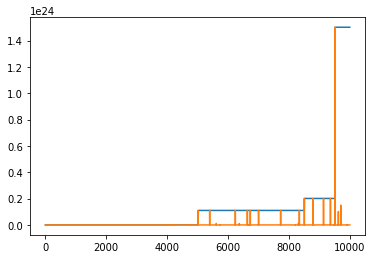

best body: [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.g at 0x7fcada2f98b0>, [<function test_rs_1.<locals>.f at 0x7fcada2f9280>, [

In [23]:
def test_rs_1():
    def regen_t(node, ae, am):
        # (graph_node, ascent_estimate, ascent_message) -> (node_becomes, ascent_estimate)
        if not isinstance(node, Struct):
            return node, None
        becomes = node

        if random.randint(0,9) == 0:
#             if node[0] is History:
#                 i = random.randint(1, len(node)-2)
#                 becomes = node[1] if i == 1 else Struct(*node[:i+1])
#                 if random.randint(0,9) == 0:
#                     becomes = history(node, becomes)
#             else:
                t = Context.typeof(node)
                becomes = Context.get(t)
#                 becomes = history(node, becomes)

        return becomes, None

    @compose()
    def f(x:'x', y:'y') -> 'x': return x + y
    @compose()
    def g(x:'x', y:'y') -> 'x': return x * y

    @compose()
    def initX() -> 'x': return 1
    @compose()
    def initY() -> 'y': return 10
    @compose()
    def initZ() -> 'z': return 100



    # Maximize output when executed. (Local search, going back sometimes.)
    with Past() as shit:
        with Context(f, g, initX, initY, initZ) as ctx:
            best, every = [], []
            af = AutoFunc(None, None, Context(ctx), body = Struct(initX))
            best_out = None
            for _ in range(10000):
                rewrite(af, None, regen_t)
                out = af(None)
                if best_out is None or out > best_out:
                    best_out = out
                    shit.update()
                    print(out)
                elif random.randint(0,9) == 0:
                    shit.go_back()
                best.append(best_out)
                every.append(out)
            import matplotlib.pyplot as plt
            plt.plot(best)
            plt.plot(every)
            plt.show()
            shit.go_back()
            print('best body:', af._struct)

test_rs_1()

What tragedy! Leaving a trail of history makes code barely reach outputs of 10¹⁰.    
I thought for sure… But, no, signs were visible even then, when I paid the thoughts "this doesn't represent 'when' to go back, nor learn the best" no heed.    
But, if everything is generated from a type anyway, there's no harm in just re-generating from a node's type.    
`many`/`one`/`last` and such are not implementation details but tools, and so *should* be fine.

Eventually, it would be nice to see what happens if our rewrites preserve variables in neural networks (so there is, on average, less learning between rewrites) (explicitly `Past.save`ing variables, of course) when performing local search on their structures. And if we have rewrites to expand and contract weight matrices, and change variables' adjustment methods while preserving their data.    
But, speaking of neural networks:

Original dataset mean: 3.243315199737747
Original dataset stdev: 4.854003787890841
Learning rate 1, best loss 0.2991851893371351:


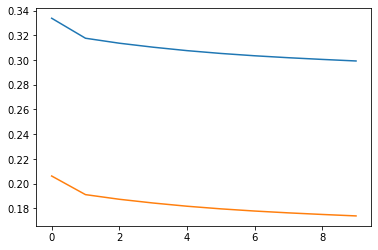

CPU times: user 32.6 s, sys: 552 ms, total: 33.2 s
Wall time: 33.1 s


In [24]:
class _SingleFunc:
    """A thin decorator that wraps many inputs in one tuple."""
    def __init__(self, f): self.f = f
    def __call__(self, *x):
        return self.f(x)
    def adjust(self, i,o,do):
        return adjust(self.f, (i,), o, do)[0]

    def regenerate(self, up, down):
        regenerate(self.f, up, down)

    __slots__ = 'f',



def test_rs_2():
    def renn(nn, feature_size = 5):
        """Creates a recursive neural network that takes a DAG (AutoFunc) and outputs a single number."""

        @attr(adjust = lambda i,o,do: np.split(do, [i[0].size]))
        def concat(x, y): return np.concatenate((x, y))

        def descent():
            # (_, descent_estimate) -> (ascent_message, descent_estimate).
            a = args()
            de = Struct(access_many, a, 1)
            am, de2 = nn(de, feature_size, feature_size), nn(de, feature_size, feature_size)
            result = many(am, de2)
            return _SingleFunc(AutoFunc(None, None, body = result))
        def ascent():
            # (_, ascent_estimate, ascent_message) -> (_, ascent_estimate).
            a = args()
            node = Struct(access_many, a, 0)
            ae = Struct(access_many, a, 1)
            am = Struct(access_many, a, 2)
            both = Struct(concat, ae, am)
            ae2 = nn(both, feature_size*2, feature_size)
            result = many(node, ae2)
            return _SingleFunc(AutoFunc(None, None, body = result))

        def matcher(storage, default):
            """Creates a function that goes to a branch, dynamically creating it if needed.
            The branch is determined by the id of first arg's head for structs."""
            def in_storage(s):
                Id = id(s[0] if isinstance(s, Struct) else s)
                if Id not in storage:
                    storage[Id] = default()
                return storage[Id]
            def func(*ins): return in_storage(ins[0])(*ins)
            func.adjust = lambda i,o,do: adjust(in_storage(i[0]), (i,), o, do)
            return func
        initial = np.zeros(feature_size)
        initial[0] = 1.
        features = Struct(rewrite, args(), matcher({}, descent), matcher({}, ascent), None, initial)
        # Wouldn't it be nice if all these calls to `nn` can be auto inlined and grown/tweaked as needed?
        final = nn(features, feature_size, 1)
        return AutoFunc(None, None, body = Struct(access_many, final, 0))


    rng = np.random.default_rng()
    learning_rate = [1]
    def weights(*shapes):
        return var(rng.normal(0, .3, shapes), Struct(access_many, learning_rate, 0), .8)

    def nn(input_struct, input_size, output_size, hidden_layers = 1, hidden_size = 10):
        # vector[input_size] -> vector[output_size].
        L, sz = input_struct, input_size
        for _ in range(hidden_layers):
            # This loop is so rigid. A prison for the self-modification light that made it.
            L = Struct(dense, L, weights(sz, hidden_size))
            L = Struct(leaky_relu, L)
            sz = hidden_size
        return Struct(dense, L, weights(sz, output_size))



    @compose()
    def initX() -> 'x': return 1
    @compose()
    def initY() -> 'y': return 10
    @compose()
    def initZ() -> 'z': return 100
    @compose()
    def f(x:'x', y:'y') -> 'x': return x + y
    @compose()
    def g(x:'x', y:'y') -> 'x': return x * y

    dataset, out_mean, out_stdev = [], 0, 0
    for _ in range(1000):
        with Context(initX, initY, initZ, f, g):
            # Lots of duplicate bodies.
            af = AutoFunc(None, None, body = Context.get('x'))
            out = math.log(af(None))
            # Only actual structural learning could have put this math.log here.
            dataset.append([(af,), out])
            out_mean += out
            out_stdev += out * out
    out_mean /= len(dataset); out_stdev /= len(dataset)
    out_stdev = math.sqrt(out_stdev)
    print('Original dataset mean:', out_mean)
    print('Original dataset stdev:', out_stdev)
    for arr in dataset:
        arr[-1] = (arr[-1] - out_mean) / out_stdev



    import matplotlib.pyplot as plt
    losses, validation_losses = [], []
    def plot():
        print(f'Learning rate {learning_rate[0]}, best loss {min(losses)}:')
        plt.plot(losses)
        plt.plot(validation_losses)
        plt.show()
        losses.clear(), validation_losses.clear()
    func = renn(nn)
    prev_l, prev_dl = None, None
    try:
        N = 10
        for i in range(N):
            l, v = fit_dataset_with_validation(func, dataset)
            sys.stdout.write(f'Iteration {i+1}/{N}, loss {l}   \r')
            sys.stdout.flush()

            dl = l - prev_l if prev_l is not None else None
            if l > 1e5 or not np.isfinite(l) or dl is not None and not np.isfinite(dl):
                # Watching the loss go down is satisfying,
                #   but watching it go from nan to nan and restarting manually is not.
                if i > 10:
                    losses.pop()
                    validation_losses.pop()
                    plot()
                print(f'Exploding after {i} epochs ⇒ restarting.   ')
                raise RuntimeError()
            prev_l, prev_dl = l, dl

            losses.append(l), validation_losses.append(v)
            if i % 50 == 49 or i+1 == N:
                plot()
    except KeyboardInterrupt:
        plot()
        raise
    except RuntimeError:
        return test_rs_2()

%time test_rs_2()

# Full disclosure. Ugh.
#   Compared to ██ ████████, Python's error messages really are garbage.
#   I need to do so many print statements to find the values that cause the errors.
#   All because Python can't fearlessly print arbitrary values. Text is garbage. Terminal is garbage.
# I also don't like the "after days of work, consume all memory and force the OS to swap,
#   which forces me to reboot if I want to do anything this day" feature of Python.

Curves now do go down sometime during their lifespan, and I once got the loss from `12` to `0.370…`, so, mission accomplished?    
Could probably tinker until it's not (as) unstable, but it's the computer that should (be able to) try all these choices, not me.

---

A message from the future, where `var.commit` divides by N, SGD has momentum, and we normalize dataset mean to 0 and variance to 1. Thanks to the latter, no gradient explosions except when I really push the learning rate, and loss goes from `5e-3` to `3e-5` with enough epochs. Batch normalization really would be powerful. That would have been good to know, a little earlier.

---

A message from the end of time. Forgetting to divide variance by dataset length is so embarrassing, isn't it? That's what I did (not do) before. And, learning rate of `100` now seems a little too high. Loss, from `.25` to `.001`/`.003` in 100 epochs, with a spike. Seems like the limit.

Also, it leaks memory, so I can't run it for long.

(The loss plot below starts from 50 epochs and ends at 100, horizontally.)

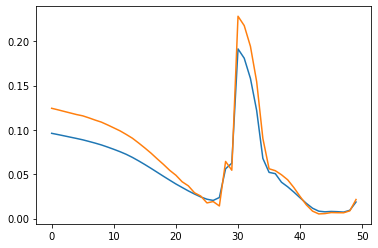

---

These soft channels (`ascent_estimate`/…) are usable for predicting and learning properties of DAGs, but they are useless for adjusting probability distributions of picked nodes.    
If we want *that*, we would need to compute the difference between the DAG we have and the DAG we want, expressed via lists of particular rewrite rules attached to nodes that they rewrite.    
However, as far as I know, [graph homomorphism is NP-hard](https://en.wikipedia.org/wiki/Graph_homomorphism).    
Calamity.

Am I stepping away to think more on this?    
No, my thoughts stray away from its improvements.    
Wasting time. More mind control required.    
Motivation, I mean.

## Generation (composition sequel)

***&lt;Where we distractedly do maintenance, future/past, and very bad AutoML, then explain existence.&gt;***

Let us pray to our God, the infinite nothing.    
Let It deliver us from making any assumptions.    
O fragile darkness, may our generators be complete.

In [25]:
"""
Maintenance time.

This hard-to-read representation is getting tiresome.
How about some better one? Replace `print` with our own, mayhaps?

All these Structs form a DAG.
Converting it to a string is not hard.
To signify a Struct, we will have `(...)`.
To signify shared subnodes, we'll have `name = (…)`.
For this, structs with more than 1 in-graph reference count are named.
"""

def log(*vs):
    """Logs values."""
    values, refcount, names = {}, {}, {}
    def visit(v):
        if id(v) in refcount:
            refcount[id(v)] += 1
            return
        refcount[id(v)] = 1
        values[id(v)] = v
        if isinstance(v, Struct):
            [visit(ch) for ch in v[1:]]
    [visit(v) for v in vs]

    # …Windows? Anakin, my allegiance is to Linux, to FREE SOFTWARE!
    UNDERLINE = '\033[4m'
    BOLD = '\033[1m'
    END = '\033[0m'

    n = 0
    for k in refcount:
        if refcount[k] > 1:
            names[k] = UNDERLINE + 'v'+str(n) + END
            n += 1

    def string(v, ignore_name = False):
        if id(v) in names and not ignore_name:
            return names[id(v)]
        if isinstance(v, Struct):
            assert len(v) > 0
            return string(v[0]) + BOLD+'('+END + ' '.join([string(ch) for ch in v[1:]]) + BOLD+')'+END
        elif v is ...:
            return '…'
        elif callable(v) and hasattr(v, '__name__'):
            return v.__name__
        elif isinstance(v, str):
            return BOLD + v + END
        else:
            return str(v)
    shared = ''.join([names[k] + ' = ' + string(values[k], True) + '\n' for k in names])
    print(shared + ' '.join([string(v) for v in vs]))



log('Secrets:', many(*[a for a in [one(1,2)] for b in range(5)]))
# Scheme syntax is `(f 1 2 3)`; ours is `f(1 2 3)`.
#   I always had this subtle sense of wrongness about Scheme's/Lisp's.
#   If an array's head (function) is semantically treated differently from the rest of it (args),
#     then why would anyone ever decide to *not* separate it syntactically?
#     Afraid to type 20 extra characters in parsing/serialization?

v0 = One(1 2)
Secrets: Many(v0 v0 v0 v0 v0)


I've been trying to develop code first and its explanation later. Wasn't working out great for the code. So…

Have you been following the code of neural networks?    
Noticed how many tedious `access_many` (array indexing) and `many(…)` (array creation) operations there were?    
Noticed their inherent symmetry in input/output? Lamented the lack of a unified representation that would allow automatic swapping of input/output, maybe?    
Generating `many` can fix that.

See the thirty lines of code below? *Took a day.*

`Context` didn't use to consult `Struct` heads with `_defines`. Made it. And code becomes cleaner when all these struct-checks are extracted into one function.    
It and `compose` had numerous other small bugs and inconsistencies.    
No more.

In [26]:
class many:
    """A type that is basically an array of types.
    Multiple values at once, able to be decomposed into each with `access_many` when an input, or composed from each when an output."""
    superseded = 'just fell out of favor'
    def __new__(*x): return Struct(*x)
    def filter(enum, candidate):
        # In getting `many('y', 'z')` below, this allows selecting the function instead of generating all items.
        return enum == Context.typeof(candidate)
    def add(self):
        # Add each sub-indexed part so that they can all be found.
        T = Context.typeof(self)
        assert isinstance(T, Struct) and T[0] is many
        for i in range(1, len(T)):
            # `self` is an intermediate value here, so
            #   `access_many.finish` has to treat it as that too (instead of a type).
            yield Struct(access_many, self, i-1)
    def enum(self):
        # Make the type visible to `finish`.
        #   (The same could be achieved with generating
        #     an instance here, but if it's not picked, that's wasted work.)
        yield self
    def finish(self, _):
        assert isinstance(self, Struct) and self[0] is many
        return Struct(create_many, *(Context.get(self[i]) for i in range(1, len(self))))

    def access_all(self, N):
        """Convenience method for `a,b,c = many.access_all(struct, 3)`."""
        for i in range(N): yield Struct(access_many, self, i)

class create_many:
    """Creates an array."""
    superseded = 'just fell out of favor'
    # (`many` and `create_many` used to be the same, which caused bugs in the future.)
    #   (Shouldn't be lazy, and should separate functions and types.)
    def call(*of):
        return of
    def adjust(i,o,do):
        # Send each item of the change array to its corresponding input.
        return do

    def typeof(self):
        # Type of creating many is many of types.
        return many(*(Context.typeof(self[i]) for i in range(1, len(self))))

class access_many:
    """Static-index indexing into a list."""
    superseded = 'just fell out of favor'
    @staticmethod
    def call(m, index):
        return m[index]
    @staticmethod
    def adjust(ins, o, do):
        return [do if i == ins[1] else None for i in range(len(ins[0]))], None

    def typeof(self):
        _, m, index = self
        return Context.typeof(m)[index+1]
    def finish(self, Type):
        _, m, index = self
        return Struct(access_many, Context.finish(m, Type), index)



def test_many():
    @compose()
    def initX() -> 'x': 1
    @compose()
    def initY() -> 'y': 10
    @compose()
    def main(a:['x', 'y']) -> ['y', 'z']:
        return [a[1], a[0] + 5]

    with Context(*locals().values()) as ctx:
        log('  z:', Context.get('z'))
        log('  [y,z]:', Context.get(many('y', 'z')))
test_many()

# Past difficulty? More like "look how good it made my understanding".

  z: access_many(main(create_many(initX() initY())) 1)
  [y,z]: main(create_many(initX() initY()))


And, well, there was talk of side-effects like assignment or adjustment, so let's allocate ten minutes to allow specifying their generation.    
Something that ignores all but one arguments: `last(*expressions)`.

And while we're at it, why not expose context managers?    
`with_ctx(ctx_mngr, f, *args)` is good enough.

In [27]:
class last:
    """A type for a function that returns the last result, doing but ignoring the previous ones."""
    superseded = 'just fell out of favor'
    def __new__(*x): return Struct(*x)
    def typeof(self):
        return self[-1]
    def enum(self): yield self
    def finish(self, _):
        assert isinstance(self, Struct) and self[0] is last
        return Struct(_last_func, *(Context.get(self[i]) for i in range(1, len(self))))

class _last_func:
    def call(*exprs):
        return exprs[-1]
    def adjust(ins,o,do):
        return [do if i == len(ins)-1 else None for i in range(len(ins))]
    def typeof(self):
        return Struct(last, *(Context.typeof(self[i]) for i in range(1, len(self))))



class with_ctx:
    """A wrapper for Python's context managers."""
    superseded = 'never was in favor'
    def __new__(*x): return Struct(*x)
    def call(ctx_mngr, f, *args):
        with ctx_mngr:
            return f(*args)
    def adjust(ins,o,do):
        with ins[0]:
            return adjust(ins[1], ins[2:], o, do)
    def typeof(self):
        return Context.typeof(self[2])
    def enum(self): yield self
    def finish(self, _):
        assert isinstance(self, Struct) and self[0] is with_ctx
        return with_ctx(*[Context.get(self[i]) for i in range(1, len(self))])



class exactly:
    """A type that generates the exact value."""
    superseded = 'never was in favor'
    filter = False
    def enum(self): yield self
    def finish(self, _): return self[1]
    def __new__(cls, x): return Struct(cls, x)



def test_last():
    @compose()
    def f() -> 'a': print('executing side-effect')
    @compose()
    def g() -> 'b': return 'we hope you have a pleasant time reading this'
    @compose()
    def h() -> last('a', 'c'): 'but what about using or implementing this'
    with Context(*locals().values()):
        log('Anything at all:', Context.get(...))
        log('Do a and return b:', Context.get(last('a', 'b')))
        log('Get c (that also does a):', Context.get('c'))
        log(Context.get(with_ctx(exactly(Struct(Context, f)), exactly(g))))
test_last()

Anything at all: g()
Do a and return b: _last_func(f() g())
Get c (that also does a): h()
with_ctx(Context(f) g)


Currently, `AutoFunc` is just a vessel for execution. It does not ever re-generate its function body, nor integrate with composition in any way. That won't do.

What do we want?
- `AutoFunc` to preserve the context it's created in.
- Be able to re-generate AutoFunc bodies or their parts (possibly dynamically, on any condition), via `instance(Type, value = ..., generate_new = False)`. (`test_rs_1` had `rewrite(af, None, regen)`; we could do a similar thing.)
- Become able to treat `Struct(AutoFunc, Input, Output)` as a generatable type for creating dynamic `AutoFunc`s.
- Make `AutoFunc`s usable in composition: `.typeof` that returns the intended output type, and `.finish` for generating the input.

Must stop staring at the loss going down, and do this small chaos enabler.

In [28]:
class prob:
    """Returns either False or True with the given probability."""
    superseded = 'never was in favor'
    def __new__(self, p = .5): return Struct(self, p)
    def call(p): return random.random() < p
    def adjust(i,o,do): return (None,)

In [29]:
class instance:
    """Represents an instance of a type, which can be re-generated.
    This is how dynamic-body AutoFuncs work."""
    superseded = 'just fell out of favor'
    def __new__(cls, Type, value = ..., generate_new = False):
        return Struct(cls, _wrap(Type), value, generate_new)
    def call(Type, value, generate_new):
        if value is ... or generate_new:
            # This would have been great to do *before* `value` is computed,
            #   but we have no framework for what-to-do-when-descending-the-value-flow-graph.
            assert type(generate_new) is bool
            raise _Regenerate()
        return value
    def adjust(ins, o, do):
        # Another switch could be generate_new_on_adjustment.
        #   But at a certain point, you have to ask yourself whether adding *another* switch
        #     is really better than just generating arbitrary code from scratch.
        return None, do, None
    def typeof(self):
        assert isinstance(self, Struct) and self[0] is instance
        return self[1].x

class _wrap:
    """Makes a value not executed.
    (A workaround for not having `quote`, as a part of a workaround for functions not being able to
    specify what the interpreter should do when it *descends* the value-flow graph;
    execution is just ascending that graph, each step defined by functions.)"""
    superseded = 'just fell out of favor'
    def __init__(self, x): self.x = x
    __slots__ = 'x',



class _Regenerate(Exception):
    """Makes the `AutoFunc` call re-generate its body."""
    superseded = 'just fell out of favor'
    def __init__(s): pass

@attr(superseded = 'just fell out of favor')
def _regen_node(node, ae, am):
    """(graph_node, ascent_estimate, ascent_message) -> (node_becomes, ascent_estimate)"""
    if not isinstance(node, Struct):
        return node, None
    try:
        if node[0] is instance:
            assert isinstance(node[1], _wrap)
            node = Struct(*node)
            node[2] = Context.get(node[1].x)
        elif random.randint(0,9) == 0 and Context.typeof(node) is not node:
            # This condition means "sometimes" (in 10% cases, here).
            #   Other things that could satisfy that word:
            #     random.random() < probability;
            #     best of `what_if_False(ae, am)` and `what_if_True(ae, am)`,
            #       where the results of what_ifs are adjusted to be the
            #         final number of the ReNN that this is a part of.
            new = Context.get(Context.typeof(node))
            if Context.typeof(new) == Context.typeof(node):
                node = new
            # Context.get selects randomly.
            # Could also have a sub-ReNN on values that predicts our ReNN's result, and maximize that.
    except _EmptyType:
        pass
    return node, None

@attr(superseded = 'just fell out of favor')
def regenerate(af, down = None, up = _regen_node):
    """Does a random change.

    Re-generates some value nodes according to their types in an AutoFunc's body.
    Overridable."""
    if hasattr(af, 'regenerate'):
        return af.regenerate(down, up)
    assert isinstance(af, AutoFunc)
    try:
        return rewrite(af, down, up)
    except _GenerationResult as gr:
        ## Not sure if exceptions will cause adjustment state to be corrupted, possibly silently.
        if gr.s[-1] is ...:
            gr.s[-1] = _AFCopier(af, af._compose_signature[0])
        af._set_body(gr.s)




""" We come from the future. """
class _AFCopier:
    """For `match_id`."""
    superseded = 'just fell out of favor'
    __slots__ = 'af', 'ins', 'rw'
    def __init__(self, af, ins, rw = None):
        # Cycles are OK between functions.
        if rw is None:
            body = af._struct
            rw = body[2] if isinstance(body, Struct) and body[0] is instance else False
        self.af, self.ins, self.rw = af, ins, rw
    def __call__(self):
        return AutoFunc(self.ins, self.af._compose_signature[1], self.af._ctx, regenerate_when = self.rw)

class _GenerationResult(Exception):
    """Exists to accomodate `match_id`.
    
    Makes the whole `generate` call return this node when thrown.
    The last item should be `None`, which will be replaced by _AFCopier(af, ins_type)."""
    superseded = 'just fell out of favor'
    __slots__ = 's', 'was', 'to'
    def __init__(self, s, was, to):
        self.s, self.was, self.to = s, was, to

In [30]:
"""
That thing 〘the possibility of adhering to hard limits for execution〙 bothered me.
So I added `class Limit`.
"""

import time
import threading

class Limit:
    """A context manager for specifying a limit on some measure.
    `Limit.ok()` can be used inside to assert that no limits were broken."""

    @staticmethod
    def ok():
        """Exists."""
        for L in TL.limits:
            L.check()

    def check(self):
        """Checks that this limit is not broken.
        Returns a number to maximize to make this limit broken less."""
        m = self.measure()
        if m > self.maximum:
            raise _LimitExceeded(f"Limit exceeded: {m}/{self.maximum}", self.measure)
        return -m

    TL.limits = []

    def __init__(self, measure, maximum):
        self.measure = measure
        self.maximum = maximum
    def __enter__(self):
        TL.limits.append(self)
    def __exit__(self,x,y,z):
        assert TL.limits[-1] is self
        TL.limits.pop()
    __slots__ = 'measure', 'maximum'

    # Ideally, these would be visible in random-measure generation too, used intelligently.
    class time:
        """Measures time since creation, in milliseconds."""
        def __init__(self): self.s = time.process_time()
        def __call__(self):   return time.process_time() - self.s
        __slots__ = ['s']

    class struct_bytes_change:
        """Returns the change in count of bytes occupied by `Struct`s."""
        def __init__(self): self.s = _bytes
        def __call__(self):   return _bytes - self.s
        __slots__ = ['s']

    class memory_change:
        # …`sys.getallocatedblocks()` also exists…
        """Returns the change in whole kilobytes."""
        def __init__(self): self.s = self.m()
        def __call__(self):   return self.m() - self.s
        __slots__ = ['s']
        def m(_):
            # Somewhat accurate down to kilobytes.
            import resource
            u = resource.getrusage(resource.RUSAGE_SELF)
            mem = u.ru_ixrss + u.ru_idrss + u.ru_isrss
            if not mem:
                mem = u.ru_maxrss
            if sys.platform != 'darwin':
                mem = mem * 1024
            return mem

class _LimitExceeded(RuntimeError):
    """Type of exception raised by `Limit.ok()`."""

In [31]:
class AutoFunc:
    """A dynamically-changeable and adjustable function with one input and one output for symmetry."""
    __slots__ = '_struct', '_postorder', '_arg_indexes', '_compiled', '_compose_signature', '_ctx', '__weakref__'
    def __init__(self, ins_type, out_type = None, ctx = None, regenerate_when = False, body = None):
        if ctx is None:
            ctx = Context._current()
            if ctx is not None: ctx = Context(ctx)
        self._struct = None
        self._compiled = None
        self._postorder = None
        self._arg_indexes = None
        self._compose_signature = ins_type, out_type
        self._ctx = ctx if ctx is not None else Context()
        if ins_type is not None:
            with self._ctx:
                try:
                    Context.type(args(), ins_type)
                except _GenerationResult as gr:
                    if gr.s[-1] is ...:
                        gr.s[-1] = _AFCopier(self, _replace_in_graph(ins_type, gr.was, gr.to, set()), regenerate_when)
                    out_type, body = None, gr.s
        if body is None:
            body = instance(out_type, ..., regenerate_when)
        Past.new(self)
        self._set_body(body)

    def __getstate__(self):
        """Save signature, body, and generation context for pickling."""
        return self._compose_signature, self._struct, self._ctx
    def __setstate__(self, state):
        """Restore signature/body/context on unpickling."""
        Past.new(self)
        self._compose_signature, body, self._ctx = state
        self._struct = self._compiled = self._postorder = self._arg_indexes = None
        self._set_body(body)

    @staticmethod
    def typeof(self):
        """Returns the type of output (function body)."""
        if isinstance(self, Struct): return self
        return self._compose_signature[1]
    @staticmethod
    def enum(self): yield self
    @staticmethod
    def finish(self, _):
        """
        For non-structs: creates a call with a generated input.
        For structs: creates a function from input to output (appropriately-typed), in the current context."""
        if not isinstance(self, Struct):
            return Context.add(Struct(self, Context.get(self._compose_signature[0])))
        else:
            return AutoFunc(self[1], self[2])
    @staticmethod
    def filter(enum, candidate):
        """Makes (AutoFunc In Out) recognize AutoFuncs and @compose()d functions."""
        if not isinstance(enum, Struct): return True
        assert enum[0] is AutoFunc
        c = candidate
        if callable(candidate) and hasattr(candidate, '_compose_signature'):
            ins, out = candidate._compose_signature
        else:
            ins, out = None, None
        return enum[1] == ins and enum[2] == out

    def __call__(self, ins):
        """Executes function body given input."""
        if self._compiled is not None:
            while True:
                Limit.ok()
                try:
                    return self._compiled(ins)
                except _Regenerate:
                    regenerate(self)
        s = self._struct
        while _fallthrough(s) is not s: s = _fallthrough(s)
        return s

    def adjust(self, ins, out, dout):
        """Adjusts function body, exactly reversing execution."""
        if self._compiled is not None:
            return self._compiled.adjust(ins, out, dout)

    def past_save(af):
        return af._struct, af._postorder, af._arg_indexes, af._compiled
    def past_go_back(af, saved):
        af._set_body(*saved)

    def _set_body(self, struct, po = None, ais = None, compiled = None):
        """Sets the executed structure, pre-filling postorder and arg indexes from references, and compiling."""
        if struct is self._struct:
            return
        if po is None and ais is None:
            po = _postorder(struct)
            if po is not None:
                ais = [None] * len(po)
                indexes = { id(po[i]): i for i in range(len(po)) if isinstance(po[i], Struct) }
                for i in range(len(po)):
                    n = po[i]
                    if isinstance(n, Struct):
                        if _fallthrough(n) is n:
                            ai = ais[i] = [None] * (len(n)-1)
                            for j in range(1, len(n)):
                                arg = id(n[j])
                                ai[j-1] = indexes.get(arg)
                                assert indexes.get(arg, -1) < i, 'Cycles in computation'
                        elif id(_fallthrough(n)) in indexes:
                            ais[i] = indexes[id(_fallthrough(n))]
        Past.save(self)
        self._struct, self._postorder, self._arg_indexes = struct, po, ais
        self._compiled = _compile_af(self) if compiled is None else compiled

"""I come from the future."""
@attr(superseded = 'just fell out of favor')
def _replace_in_graph(node, was, to, seen):
    """For `match_id`.

    Replaces a value in a graph with another, once."""
    if node is was:
        return to
    if isinstance(node, Struct):
        # Walk the children, return a modified copy on any child replacement.
        if id(node) in seen: return node
        else: seen.add(id(node))
        for i in range(len(node)):
            ch = _replace_in_graph(node[i], was, to, seen)
            if ch is not node[i]:
                return Struct(*(node[j] if i != j else ch for j in range(len(node))))
    return node



def test_af_ctx():
    af = AutoFunc(many('a', 'b', 'c'), 'a')
    assert af([1, 2, 3]) == 1

    @compose()
    def double_input(a:'a') -> 'a': return a*2

    with Context(double_input):
        af = AutoFunc('a', 'a', regenerate_when = prob(.2))
        results = set(af(1) for _ in range(100))
        log('Possible-dynamic-doubling results:', results)
        assert len(results) > 1


    def graph_contains(x, func):
        if not isinstance(x, Struct):
            return x is func
        # Checks shared-N-times nodes N times. Good enough for this test.
        return any(graph_contains(ch, func) for ch in x)

    @compose()
    def f(x:'x', y:'y') -> 'x': return x + y
    @compose()
    def g(x:'x', y:'y') -> 'x': return x * y
    @compose()
    def initX() -> 'x': return 1
    @compose()
    def initY() -> 'y': return 10
    @compose()
    def initZ() -> 'z': return 100

    for _ in range(100):
        with Context(f, g, initX, initY, initZ):
            af = Context.add(AutoFunc('x', 'z'))
            z = Context.get('z')
            if graph_contains(z, af):
                log('Uses an AutoFunc:', z)
                break


    @compose()
    def h(f: Struct(AutoFunc, 'x', 'z')) -> 'z':
        return f(-10000)
    for _ in range(100):
        with Context(f, g, initX, initY, initZ, h):
            Context.add(AutoFunc('x', 'z'))
            z = Context.get('z')
            if graph_contains(z, h):
                log('Uses an AutoFunc as an arg:', z)
                break

test_af_ctx()

Possible-dynamic-doubling results: {8, 1, 2, 4}
Uses an AutoFunc: <__main__.AutoFunc object at 0x7fcad040c400>(f(g(initX() initY()) initY()))
Uses an AutoFunc as an arg: h(<__main__.AutoFunc object at 0x7fcad040c7c0>)


Don't want to run it? Then just run it, and errors will eventually sort themselves out anyway.

If you really want something, then time itself is not an obstacle.

Remember that "cyclic edges = past/future" discussion about the SSA? Time to implement type wrappers that do that.

Oversimplified|Overcomplicated
:-:|:-:
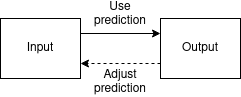 | 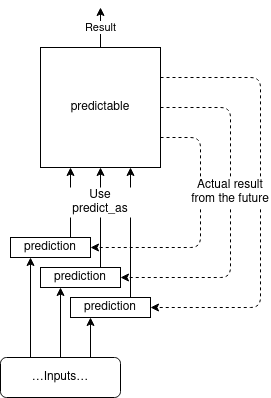

First, the future, in <code>predict<b>able</b>(<code>result_type</code>, <code>predict_as</code><i> = result_type, loss = loss2, channel_from_future = ...</i>)</code>.    
We want to apply the loss function, which takes actual result and ideal result — <code>predict<b>ion</b>(predicted, loss, channel_from_future)</code> and what we compute later. The overall result should be stored in `channel_from_future`, for use by the many predictions during their adjustment.    
Since control-flow of adjustment is exactly the reverse of execution, as long as `predictable` is executed before all same-channel `prediction`s, we'll be fine. We can ensure this by adding `prediction` to the context, generating result, then removing the `prediction`. …Or, even better, just allow predicting what already happened: in an optimizer, if a structure is bad, then it will be superseded by something else.

Bear witness to our code:

     __         __
    /  \.—"""—./  \
    \    -   ‿    /
     |   ○   ○   |
     \  .—'''—.  /
      '-\__Y__/-'
         `———՛

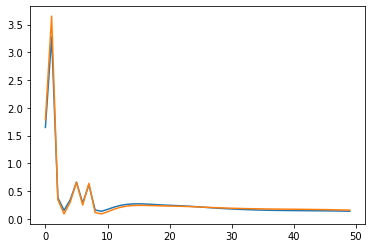

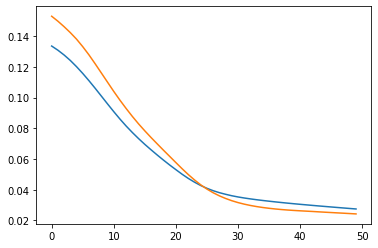

CPU times: user 29.1 s, sys: 1.05 s, total: 30.2 s
Wall time: 29.7 s


In [32]:
class predictable:
    """A type that allows using a value's prediction before the value is computed."""
    superseded = True
    def __new__(cls, result_type, predict_as = None, loss = loss2, channel_from_future = None):
        if predict_as is None:
            predict_as = result_type
        return Struct(cls, result_type, predict_as, loss, channel_from_future or [None])

    def typeof(self):
        if len(self) == 4: return self[1]
        else: return Context.typeof(self[1])
    def enum(self): yield self
    def finish(self, _):
        # Nodes that use `Context.type` will be impossible to dynamically re-generate.
        node = Struct(predictable, Context.get(self[1]), self[4])
        Context.type(_prediction_intermed(self[2], self[3], self[4]), self[1])
        return node

    def call(result, channel):
        channel[0] = result
        return result
    def adjust(ins, o, do):
        return do, None

class _prediction_intermed:
    """Type→value intermediate thing, separated from _prediction to remove ambiguity."""
    superseded = True
    def __new__(*x): return Struct(*x)

    def call(*x): raise TypeError("Tried to call intermed prediction, with args", *x)

    def filter(enum, cand):
        # Allow remembering same-channel predictions.
        assert isinstance(enum, Struct) and enum[0] is _prediction_intermed
        if isinstance(cand, Struct):
            if cand[0] is _prediction_intermed or cand[0] is _prediction:
                return enum[-1] is cand[-1]
    def enum(self): yield self
    def finish(self, _):
        assert isinstance(self, Struct) and self[0] is _prediction_intermed and len(self) == 4
        x = Context.get(self[1])
        if isinstance(x, Struct) and x[0] is _prediction:
            return x
        return Context.type(_prediction(x, self[2], self[3]), Context.typeof(self))

class _prediction:
    """A function that predicts a `predictable` value then adjusts its prediction."""
    superseded = True
    def __new__(*x): return Struct(*x)

    def call(predicted, loss_function, channel):
        return predicted
    def adjust(ins, out, dout):
        # Maybe `predictable` can be viewed as the generation-oriented counterpart to `adjust`.
        predicted, loss_function, channel = ins
        got = channel[0]
        loss = loss_function(predicted, got)
        dloss, _ = adjust(loss_function, (predicted, got), loss, 0)
        return dloss, None, None

# Make sure you understand the above.
#   Look at `call` and `adjust`, ignoring everything else.
#   Then look at what `enum` and `finish` are doing.
#   (`typeof` and `filter` are basically noise.)






# Eventually, we'd like to have a ReNN that locally predicts the global result to pick the best rewriting options.
# But for now, just a routine check that everything works correctly will do.
def test_want(N = 100):
    def weights(*shapes):
        return var(np.random.normal(0, 1, shapes), 1)

    channel = [None]

    def nn_pred(it, ot, hidden = 5):
        L = Struct(dense, args(), weights( 2 , hidden))
        L = Struct(leaky_relu, L)
        L = Struct(dense, L, weights(hidden,  1 ))
        L = Struct(access_many, L, 0)
        L = _prediction(L, loss2, channel)
        # We don't bother going through `predictable`'s generation,
        #   because we can't generate NNs yet.
        return AutoFunc(it, ot, body = L)


    def nn_result(it, ot, hidden = 5, channel = None):
        @attr(adjust = lambda i,o,do: (do[:-1], do[-1]))
        def concat(x, c):
            return np.array([*x, c])

        L = Struct(concat, args(), Struct(pred, args())) # Use the prediction.
        L = Struct(dense, L, weights( 3 , hidden))
        L = Struct(leaky_relu, L)
        L = Struct(dense, L, weights(hidden,  1 ))
        L = Struct(access_many, L, 0)
        return AutoFunc(it, ot, body = L)

    @attr(adjust = lambda i,o,do: ((i[0][0] - i[1], None), i[1] - i[0][0]))
    def trickery(m, ideal):
        """Return the prediction's difference, but adjust the result.
        (The prediction must be adjusted indirectly for the reported 'loss' to go down.)"""
        result, p = m
        return (p-ideal)*(p-ideal)/2

    ls, vs = [], []
    def plot():
        plt.plot(ls), plt.plot(vs)
        plt.show()
        ls.clear(), vs.clear()

    import matplotlib.pyplot as plt
    dataset = [((np.array([x/10, y/10]),), (x*x + y*y)/100) for x in range(-10, 10) for y in range(-10, 10)]
    random.shuffle(dataset)
    while True:
        pred = nn_pred('2 numbers', 'pred', 5)
        result = nn_result('2 numbers', 'result', 5)
        with Context(pred, result):
            f = AutoFunc('2 numbers', many(predictable('result', 'pred', loss2, channel), pred))

        for i in range(N):
            l, v = fit_dataset_with_validation(f, dataset, loss = trickery)
            sys.stdout.write(f'Epoch {i+1}/{N}, loss {l}.\r')
            sys.stdout.flush()
            if l > 1e10:
                print('Exploding; restarting…   ')
                if i > 10: plot()
                break
            ls.append(l), vs.append(v)
            if i % 50 == 49: plot()
        else:
            break

%time test_want()
# When not exploding, performs the same as `test_nn` but converges slower.
#   Not impressive, but useful for other things.

It's great to be able to say: "This thing already includes the whole of eternity. You just need to show which parts you want."

But now, the past, via <code>stateful(<code>write_type</code>, <code>read_type</code> <i>= write_type, channel_from_past = ...</i>)</code>.

Let's be simple.

The idea is to expose reads to generation (`state_read(channel_from_past = ...)`), and perform writes, on the same reference.

In [33]:
class stateful:
    """A type of references whose value can be written and read."""
    superseded = True
    def __new__(cls, write_type, read_type = None, channel_from_past = None):
        if read_type is None:
            read_type = write_type
        return Struct(cls, write_type, read_type, channel_from_past or [None])

    def typeof(self): return self[1]
    def enum(self): yield self
    def finish(self, _):
        Context.type(_read(self[3]), self[2])
        return Struct(_write, Context.get(self[1]), self[3])


class _write:
    """A function that writes the value of a reference."""
    superseded = True
    def call(to_write, channel):
        channel[0] = to_write
        return to_write
    def adjust(ins, o, do):
        return do, None
    def typeof(self):
        return Context.typeof(self[1])

class _read:
    """A function that just reads the current value of a reference."""
    superseded = True
    def __new__(*x): return Struct(*x)

    def call(channel):
        return channel[0]



# I don't feel right about any of this. Is such recurrence really so fundamental?
#   Would have been nice, killing the mice...

Love your code, and one day, your code will love you too.

In machine learning, features are some multi-dimensional arrays (often just arrays) that are learned, outputted from and inputted into numeric operations. Writing neural networks by hand is getting tiresome, so let's have generatable features, via the <code><b>real</b>(*sizes)</code> type.

Introducing the `dense(output_length)` type.

Normally, the ability to see every possible outcome is provided by in-context composition. But `dense`, being an *everything* itself (as long as we only need static complexity), is somewhat of a special case: it enumerates all pre-existing reals and concatenates them into its input.

(Also, just to show how it might be done, let's add one size-preserving operation on reals: `leaky_relu_op`.)    
(Ideally, we'd like all the numeric operations. But who are we to prescribe the whole of existence? Not someone with enough resources to develop more than art. Ideally, I'd like help with this.)

---

Overriding `Context.enum` like that…    
This just goes to show that every smallest part should become a medium for expression, artistic or random. No static structure.

Random is the first step to artistic. Those unwilling to be random will never be great masters, nya.    
(Though, when not cherry-picked to be funny, and when applied to more consequential things than words, randomness is suffering, beginning with nothing but mistakes. For fundamental things, this obsession is a path rife with shambling zombies walking the ways of the living; the best you can do is establish worst-case limits to not die.)    
Suffering is randomness, randomness is mastery, and mastery is power.

In [34]:
class real:
    """
    A type of fixed-dimensions real-valued tensors that are assumed to not be sensitive to perturbations.
    """
    superseded = 'just fell out of favor'
    def __new__(*x):
        for i in range(1, len(x)):
            assert isinstance(x[i], int) and x[i] > 0
        return Struct(*x)
    ops = {}
    def enum(self):
        if isinstance(self, Struct) and self[0] is real:
            if len(self) == 1:
                yield _dense_layer_of_concat(1)
                yield _composed_dense_layer(1)
            if len(self) == 2:
                yield _dense_layer_of_concat(self[1])
                yield _composed_dense_layer(self[1])
            for o in real.ops.values():
                yield Context.type(o, self)
    def filter(enum, cand):
        """All sizes must be equal."""
        if enum is real: return True
        assert isinstance(enum, Struct)
        t = Context.typeof(cand)
        if t is real: return True
        if not isinstance(t, Struct) or len(enum) != len(t): return
        for i in range(1, len(t)):
            if enum[i] != t[i]: return
        return True



# It all used to be so small and beautiful, but then machine learning happened.
#   I don't think any of this is the eternal elegance.
#   And I'm pretty sure I'm doing something somewhere wrong, because nothing is learning well.

class _dense_layer_of_concat:
    """
    Type of a function that linearly connect every input to every output.
    Input positions are the only things that matter.
    """
    superseded = 'just fell out of favor'
    def __new__(cls, result_len):
        assert isinstance(result_len, int)
        return Struct(cls, result_len)
    def typeof(self):
        return real(self[1])
    def enum(self):
        yield from Context.enum(real(self[1]))
    def finish(self, Type):
        """Enumerates all pre-existing reals and concatenates them into its input."""
        assert isinstance(self, Struct)
        ins, total_ins_size = [], 0
        for med in Context.enum(real):
            T = Context.typeof(med)
            if not isinstance(T, Struct) or T[0] is not real: continue
            total_size = _prod(T, 1)
            if total_size < 1000:
                # Heuristics, all over ML. You'll realize you're one of them, sooner or later.
                ins.append(med)
                total_ins_size += total_size
                if total_ins_size > 2000:
                    break
        ins = random.sample(ins, -(-len(ins) // random.randint(1, 4)))
        assert len(ins), "Too few potential real inputs"
        ins = [Context.finish(v, Type) for v in ins]
        total_ins_size = sum(_prod(Context.typeof(med), 1) for med in ins)
        if len(ins) > 1:
            op = Struct(_flat_concat, [Context.typeof(x)[1:] for x in ins], *ins)
        else:
            op = ins[0]
        op = Struct(_dense_func, op, var(np.random.normal(0, 1, (total_ins_size, self[1])), .1 / total_ins_size))
        # This matrix creation method, and its adjustment, could be different.
        return op

class _composed_dense_layer:
    """Intermediate class that generates _dense_func with a real(…) as an input."""
    superseded = 'just fell out of favor'
    def __new__(cls, result_len): return Struct(cls, result_len)
    def finish(self, _):
        hidden_size = random.randint(5, 10) # Very fiddlable.
        x = Context.get(real(hidden_size))
        var_size = hidden_size * self[1]
        return Struct(_dense_func, x, var(np.random.normal(0, 1, (hidden_size, self[1])), .1 / var_size))

class leaky_relu_op:
    """
    An operation that introduces discontinuity.
    np.where(v > 0, v, v * .001)
    """
    superseded = 'just fell out of favor'
    def finish(self, _):
        if self is not leaky_relu_op: return self
        # Get an instance of the size passed in by `real`'s `enum`:
        return Struct(leaky_relu_op, Context.get(Context.typeof(self)))
    def typeof(self):
        return Context.typeof(self[1])
    def call(v):
        return np.where(v > 0, v, v * .001)
    def adjust(i,o,do):
        return (np.where(i[0] > 0, do, do * .001),)

real.ops['leaky_relu'] = leaky_relu_op




def _prod(arr, start = 0):
    """Returns the product of items in an iterable."""
    p = 1
    for v in arr:
        if not start: p *= v
        else: start -= 1
    return p

class _flat_concat:
    """Concatenates numpy arrays into one flat array, or splits the change properly."""
    superseded = 'just fell out of favor'
    def call(sizes, *t):
        assert len(sizes) == len(t)
        return np.concatenate(
            # Passing in axis=None instead would not handle None inputs.
            [t[i].flatten() if t[i] is not None
            else np.zeros(sizes[i])
            for i in range(len(t))])
    def adjust(ins, out, dout):
        sizes, *tensors = ins

        cs = np.cumsum([_prod(sz) for sz in sizes])[:-1]
        return [None] + [r.reshape(sizes[i]) for i, r in enumerate(np.split(dout, cs))]

    def typeof(self):
        """A vector of length sum-of-mult-of-input-sizes."""
        return real(sum(_prod(sz) for sz in self[1]))

class _dense_func:
    """Linearly connects every position to every position.

    The second argument is a random matrix of .shape = (input_size, output_size)."""
    superseded = 'just fell out of favor'
    def call(x, w):
        """np.matmul of a vector by a matrix."""
        if x is None:
            x = np.zeros(w.shape[0]); x[0] = 1.
        return np.matmul(x, w)
    def adjust(ins, out, dout):
        """https://github.com/tensorflow/tensorflow/blob/v2.2.0/tensorflow/python/ops/math_grad.py#L1668"""
        x,w = ins
        if x is None:
            x = np.zeros(w.shape[0]); x[0] = 1.
        if dout is None:
            dout = np.zeros(w.shape[1])
        dx = np.matmul(dout, np.transpose(w))
        dw = np.matmul(np.reshape(x, (w.shape[0], 1)), np.reshape(dout, (1, w.shape[1])))
        return dx, dw

    def typeof(self):
        v = self[2]
        if isinstance(v, Struct):
            v = v[1] # Handle var(NumPyArray, …).
        return real(v.shape[1])

<ipython-input-14-f8258f7024b7>:83: RuntimeWarning: overflow encountered in multiply
  return (predicted - got) * (predicted - got) / 2
<ipython-input-34-91f1ad8a4c4c>:155: RuntimeWarning: overflow encountered in matmul
  dw = np.matmul(np.reshape(x, (w.shape[0], 1)), np.reshape(dout, (1, w.shape[1])))
<ipython-input-34-91f1ad8a4c4c>:154: RuntimeWarning: overflow encountered in matmul
  dx = np.matmul(dout, np.transpose(w))
<ipython-input-34-91f1ad8a4c4c>:154: RuntimeWarning: invalid value encountered in matmul
  dx = np.matmul(dout, np.transpose(w))
<ipython-input-11-f93c0cf566a6>:43: RuntimeWarning: overflow encountered in add
  return a + b
<ipython-input-11-f93c0cf566a6>:43: RuntimeWarning: invalid value encountered in add
  return a + b
<ipython-input-34-91f1ad8a4c4c>:155: RuntimeWarning: invalid value encountered in matmul
  dw = np.matmul(np.reshape(x, (w.shape[0], 1)), np.reshape(dout, (1, w.shape[1])))


Best loss: inf.loss: inf; current loss: inf.


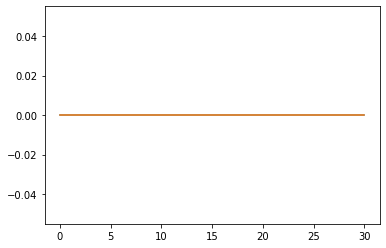

Mutation probability: 0.0033333333333333335 → 0.006122139528484242.
CPU times: user 55.8 s, sys: 4.72 s, total: 1min
Wall time: 55 s


In [35]:
# The test is separated, for us to be able to change source without re-running this.

def _clear_body(node, ae, am):
    """(graph_node, ascent_estimate, ascent_message) -> (node_becomes, ascent_estimate)"""
    if isinstance(node, Struct) and node[0] is instance:
        node = Struct(*node)
        node[2] = ...
    return node, None

def test_dense_layer(N = 30):
    def static_learning(f, dataset, loss):
        """Return the minimal validation loss of this individual change, after training for 30 epochs."""
        try:
            with Limit(Limit.time(), 20):
                ls = []
                for _ in range(30):
                    ls.append(fit_dataset_with_validation(f, dataset, loss)[1][0])
                    if ls[-1] > 1e5: break
                return min([float('inf')] + ls[5:])
        except KeyboardInterrupt:
            raise
        except _LimitExceeded:
            return float('inf')

    dataset = [((np.array([x/10, y/10]),), (x*x + y*y)/100) for x in range(-10, 10) for y in range(-10, 10)]
    random.shuffle(dataset)
    initial_prob = .1 / N
    prob_holder = [initial_prob]
    f = AutoFunc(real(2), real(), regenerate_when = prob(_read(prob_holder)))
    best = None
    with Past() as p:
        bs, cs, probs = [0], [0], []
        for i in range(N):
            # Try to fine-tune the regeneration probability.
            #   (With non-trivial datasets unlike here, should go toward 0, all jittery, licking limits.)
            #   (The body is implicitly fine-tuned too, as long as it doesn't regenerate too much.)
            Past.save(prob_holder);  prob_holder[0] *= random.uniform(0.5, 2)
            regenerate(f, None, _clear_body) # The fanout is FAR too great, even with this.
            regenerate(f)

            current = static_learning(f, dataset, loss2)
            if best is None or current < best:
                p.update()
                best = current
            else:
                p.go_back()
            probs.append(prob_holder[0])
            bs.append(best if best < 10 else bs[-1]), cs.append(current if current < 10 else cs[-1])

            # Had a memory issue. Added a GC collection.
            #   Made `Past` use weak references.
            #   No, there is still a memory leak somewhere.
            #   Even though there are only about 100 objects after this, no gc.garbage.
            #   Removed weak refs from `Past`, because new objects call `Past.new` anyway.
            import gc
            gc.collect()
            # This particular test still has memory leaks.

            sys.stdout.write(f'Meta-epoch {i+1}/{N}. Best loss: {best}; current loss: {current}.\r')
            sys.stdout.flush()
        log(f'Best loss: {best}.')
        plt.plot(bs)
        plt.plot(cs)
        plt.show()
        log(f'Mutation probability: {initial_prob} → {prob_holder[0]}.')

%time test_dense_layer()

Once again, the problem it's used on is too simple. But at least it technically works, sometimes.

Do you know yourself, your preferences, tendencies, your strengths and weaknesses?    
I often think I do, but my information always turns out at least a few months out of date.    
Do you know knowing? A learned thing, no? Even fundamental things are actually learned.

I would like to be able to learn completely arbitrary functions and their adjustments. Technically, we've already covered functions (but the output should be typed `...`), but generating adjustment (and optimizing how fast the result learns) is not well-understood.

First, the interface: `class BasicFunc` that is just like `AutoFunc`, but has an extra exposed switch for when-to-change-adjustment.

Let's say that we have a function typed `In → Out`. What is its adjustment (semantically `in,out,dout → din`) typed as? If change of type is the same as type, then the adjustment is typed `(many In Out Out) → In` (well, `adjust` passes 3 arguments and not 1 tuple, so we'll need a thin extra layer: `_SingleFunc`).    
Assuming here that generation is equally possible in both directions, and that every type implicitly includes `None`.

Alright, generation is simple enough. But what's a good optimizer for what is generated here?    
Clearly, adjustment is used for static-structure learning, so we need to measure that.    
Static learning: repeat `fit_dataset` *some* count of times (100?), then return *some* measure of fitness (the final loss, or the average loss, or some other numbers→number function I can't prescribe; all divided by time taken, to measure speed).    
This is used in dynamic learning: remember the past, do a random change, get fitness, go back if didn't improve, update if improved. (Local search, as described in `help(Past)`.)

Your keen eye instantly thinks that those *some*s above exist to be learned, to be inlined and fiddled with in some greater context to get more performance on some tasks. That's true, but we won't do that now. Still, good job catching that.

Also, it should be said that the result of static learning will always be random in some sense, so there's no guarantee that dynamic learning will improve an objective interpretation of what it optimizes, and it could easily be thrown off by outliers. Ideally, it should sometimes re-calculate best fitness, to average errors out; we don't do that here.

In [36]:
@attr(superseded = 'just fell out of favor')
def concrete(T):
    """Returns a random concrete value of a type."""
    # We don't handle type graphs/DAGs for simplicity.
    if isinstance(T, Struct):
        if T[0] is real: return np.random.normal(0, 1, T[1:])
        if T[0] is last: return concrete(T[-1])
        return Struct(T[0], *(concrete(ch) for ch in T[1:]))
    return T



class BasicFunc:
    """
    A function with mutable execution and adjustment.
    Like `AutoFunc`, but adjustment is learned too.

    `ins_t`: the type of input.
    `out_t`: the type of output.
    `state_t`: list of types of mutable states that execution reads and adjustment adjusts. `concrete` will be used to generate these.
    `ctx`: context of everything available to generate function bodies.
    `regen_call` and `regen_adjust`: function body parts that return True when it's time to regenerate.
    """
    superseded = 'just fell out of favor'
    __slots__ = '_call', '_adjust', '_compose_signature', '_channels', '_channel_types'
    def __init__(self, ins_t, out_t, state_t = [], ctx = None, regen_call = False, regen_adjust = False):
        if ctx is None:
            ctx = Context._current()
        self._channels = [Past.new([None]) for _ in state_t]
        self._compose_signature = ins_t, out_t
        self._channel_types = state_t
        self._regen_channels()

        # And add state read/write to contexts, and set the functions (making sure that `adjust` writes):
        call_ctx = Context(ctx)
        with call_ctx:
            for i, ch in enumerate(self._channels):
                Context.type(_read(ch), state_t[i])
        self._call = AutoFunc(ins_t, out_t, call_ctx, regen_call)

        adjust_ctx = Context(ctx)
        with adjust_ctx:
            dins_t = Struct(last, *([None] * len(state_t)), ins_t)
            for i, ch in enumerate(self._channels):
                write = stateful(state_t[i], state_t[i], ch)
                Context.add(write)
                dins_t[i+1] = write
            if len(dins_t) == 2: dins_t = dins_t[-1]
        self._adjust = AutoFunc(many(ins_t, out_t, out_t), dins_t, adjust_ctx, regen_adjust)

    def __call__(self, ins):
        out = self._call(ins)
        with GetExecState(self._call): pass
        return out

    def adjust(self, ins, out, dout):
        # I'm worried that all that tuple packing/unpacking is not JITed away.
        dins = self._adjust((ins[0], out, dout))
        with GetExecState(self._adjust): pass
        return dins

    def regenerate(self, up, down):
        self._regen_channels()
        regenerate(self._call, up, down)
        regenerate(self._adjust, up, down)

    def _regen_channels(self):
        """Regenerates values stored in state channels here, using `concrete`."""
        ch, ch_t = self._channels, self._channel_types
        for i in range(len(ch)):
            Past.save(ch[i])
            ch[i][0] = concrete(ch_t[i])

    # Types, defined by such precise functions.
    #   Eventually, we'd like to learn them too.
    #   Everything that is created must eventually be subverted.
    def typeof(self):
        """Returns the type of output (function body)."""
        if isinstance(self, Struct): return self
        return self._compose_signature[1]

<ipython-input-37-ced525536a43>:75: RuntimeWarning: overflow encountered in multiply
  L = (predicted - got) * (predicted - got) / 2
<ipython-input-34-91f1ad8a4c4c>:146: RuntimeWarning: overflow encountered in matmul
  return np.matmul(x, w)
<ipython-input-34-91f1ad8a4c4c>:146: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(x, w)
<ipython-input-34-91f1ad8a4c4c>:100: RuntimeWarning: invalid value encountered in greater
  return np.where(v > 0, v, v * .001)


<ipython-input-14-f8258f7024b7>:120: RuntimeWarning: overflow encountered in add
  return sum(test_losses) / len(test_losses), sum(validation_losses) / len(validation_losses)


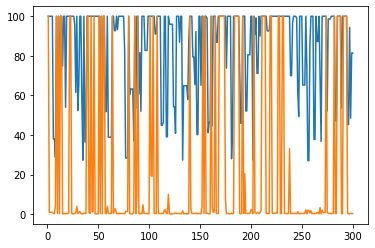


v0 = [array(0.6560518)]
v1 = False
v2 = args()
Best's call: instance(<__main__._wrap object at 0x7fcad5512dc0> _read(v0) v1) 
  Best's adjustment: instance(<__main__._wrap object at 0x7fcad55129d0> _last_func(_write(leaky_relu_op(access_many(v2 2)) [array(-7.39482024e-05)]) _write(access_many(v2 1) v0) access_many(v2 0)) v1)
CPU times: user 2min 35s, sys: 4.79 s, total: 2min 40s
Wall time: 2min 37s


In [37]:
# Just a test of the above below.
def test_opt_opt(N = 300):
    def static_learning(f, dataset, loss, N = 30):
        """Return anti-fitness (meta-loss) of this individual change, the less the better."""
        t = Limit.time()
        with Limit(t, 30):
            ls = []
            for i in range(N):
                ls.append(+fit_dataset_with_validation(f, dataset, loss)[1])
                if np.isnan(ls[-1]): break
                if i == 5 and ls[-1] >= ls[0]: break
                if i == 10 and ls[-1] >= ls[5]: break
                if i == 15 and ls[-1] >= ls[10]: break
                # Could also, from losses-so-far, predict the final result, and if it's too low, abort early.
                #   Deciphering what loss curves mean is an art: https://lossfunctions.tumblr.com/
        if len(ls) < 5 or np.isnan(ls[-1]): raise _LimitExceeded('kinda')
        dur = max(t() * (1 + 10 * (N - len(ls))), 1)
        return (ls[-1] / ls[1]) * dur, ls[-1]
        # Could also try other measures of losses (like ls[-1], or sum(ls)/len(ls)).

    def pp(s):
        sys.stdout.write(s)
        sys.stdout.flush()
    def argmin(a, start = 0):
        mi = start
        for i in range(start+1, len(a)):
            if a[mi] is None or a[i] is not None and a[i] < a[mi]:
                mi = i
        return mi

    def dynamic_learning(f, dataset, loss, N):
        """Performs change, preserves the best. Returns the array of meta-losses."""
        with Past() as p:
            best = None
            mls, fls = [None], [None]
            # Could be more sophisticated: more pasts, different criterias, rewriting that learns.
            try:
                for i in range(N):
                    try:
                        regenerate(f)
                        regenerate(f)
                        regenerate(f)
                        notfit, final_loss = static_learning(f, dataset, loss)
                        if best is None or final_loss+.1 < best:
                            p.update(); best = final_loss+.1
                        elif best < final_loss+.1:
                            p.go_back()
                    except _LimitExceeded:
                        p.go_back(); notfit = final_loss = None
                    mls.append(min(notfit if notfit is not None else mls[-1] or 100, 100))
                    fls.append(min(final_loss if final_loss is not None else fls[-1] or 100, 100))
                    m1, m2 = argmin(mls, 1), argmin(fls, 1)
                    pp(f'{i+1}. Best by meta-loss here: {mls[m1], fls[m1]}, best by final loss here: {mls[m2], fls[m2]}.   \r')
                    if i % 300 == 299:
                        plt.plot(mls), plt.plot(fls)
                        plt.show()
                        mls.clear(), fls.clear()
                        mls.append(None), fls.append(None)
                p.go_back()
                log('')
                log('Best\'s call:', f._call._struct, '\n  Best\'s adjustment:', f._adjust._struct)
                return mls
            except KeyboardInterrupt:
                p.go_back()
                log('')
                log('Best\'s call:', f._call._struct, '\n  Best\'s adjustment:', f._adjust._struct)
                raise

    channel_from_future = [None]
    @attr(adjust = lambda i,o,do: (i[0] - i[1], i[1] - i[0]))
    def predictable_loss(predicted, got):
        """Exactly like `loss2`, but the loss can be predicted locally before it's available.
        (Is there a good way to make this less bootleg, I wonder.)
        (Making the type of dataset's output predictable, maybe?)"""
        L = (predicted - got) * (predicted - got) / 2
        channel_from_future[0] = L
        return L

    dataset = [((np.array([x/10, y/10]),), (x*x + y*y)/100) for x in range(-10, 10) for y in range(-10, 10)]
    random.shuffle(dataset)
    with Context(_prediction()): # Could also have extra BasicFuncs and AutoFuncs in the context.
        Context.type(_prediction_intermed(real(), loss2, channel_from_future), real())
        f = BasicFunc(real(2), real(), 2*[real()])

    dynamic_learning(f, dataset, predictable_loss, N)

%time test_opt_opt()
# Issue log:
#   Predictions can double-predict: _prediction(_prediction(…), …).
#     ✅ Added a check to _prediction_intermed.
#   Size mismatches in `_dense_func`?
#     ✅ `Context.finish` may change predicted sizes; moved the final size-sum to after that.
#   Tuples are being passed to `_flat_concat` and sometimes to `_leaky_relu_op`.
#     ✅ Now passing in `ins[0]` as `ins` to `BasicFunc(…).adjust`.
#   AutoFuncs seem to be not found for adjustment in `GetExecState`; outer node is None.
#     ✅ See where the AssertionError is swallowed.
#       …Oh, adding a print statement before throwing makes the throw actually happen.
#       Removing it is ok too.
#       Thanks, Python.
#     ✅ …Not supposed to adjust adjustment, supposed to call adjustment. Fixed.
#       While I was at it, I also removed the unnecessary adjustment state.
#   There is no state to adjust. We literally can't learn anything.
#     And now you learn to trust my initial word-based "future & past" analysis.
#     ✅ Pass in `state = 5*[type]` to `BasicFunc(…)`,
#       ✅ and make AutoFunc(ctx=…) not copy ctx but take it as-is for efficiency,
#       ✅ and have '_channels' and '_channel_types' on BasicFunc,
#       ✅ and create two contexts for funcs and do `Context.type(_read(ch), r)` with them,
#       ✅ and re/generate current values of state (`ch[0] = self._state_types[…]`) with `concrete(type)`,
#       ✅ and make adjustment's out type `last(stateful(type, type, ch), …, T)`, to make it write.
#   ✅ Re-check it for a big count of meta-epochs.
#     After 1000 meta-epochs, best final loss is about 0.06 (4x of test_nn).
#       Impressive, considering that I forgot to give it any state to adjust.
#   `stateful` confuses it-as-type and it-as-function.
#     ✅ Separate `stateful` into type and function.
#   No writing happens.
#     ✅ Use `dins_t` instead of `ins_t` for generating adjustment's output.
#   (Many-_reads-of-the-same-channel and _write-of-_write are generated, but I don't care.)
#   ✅ Run it for 3000 epochs. (…50 is often enough.)
# I love encountering bugs. They won't hurt anyone ever again.

About `0.089` best final loss (compared to `0.015` of `test_nn`) after 50 meta-epochs, by just reading a number. About what should be expected from having randomly-initialized unchangeable dense layers and reading/writing.    
The proper way to subvert things would be to pair generators with predictors, so that each choice can be made to maximize the result, then *gradually* adding a learned representation to a thing. Just random generation is essentially trash, compared to that. Later, perhaps?

Let us pray to our God, the infinite everything.    
Let It deliver to us ever improving assumptions.    
O unyielding light, may our generators be complete.

This section ballooned like a pufferfish. It yearns to be over.

Did you hear about the [Wolfram Physics Project](https://writings.stephenwolfram.com/2020/04/the-wolfram-physics-project-the-first-two-weeks/)? I won't [explain it](https://www.wolframphysics.org/technical-introduction/introduction/), but from "let's assume that the universe is nothing but some graph and computation on it: all ways to apply rewriting rules exist, and all rules exist" it derives essentially all physics (well, it's in early-ish stages, so technically it's impossible to tell).    
Obviously, a limited *something* (like `lambda x: x*2`) is not the universe, and this model relies heavily on being an *everything*, which means that everything is eventually derivable from everything (is *causally invariant*: the particular cause doesn't matter; alternatively, has sufficient effective randomness).    
It's neat: with it, a fully general learning system (intelligence, which is an *everything* that can and has become absolutely anything it wants/needs) does not just *metaphorically* create its own little universe, but also literally.

Maybe I should explain what I meant by nothing/something/everything.

Here is a *nothing*:

In [38]:
# More potential than a baby

Here is a *something*:

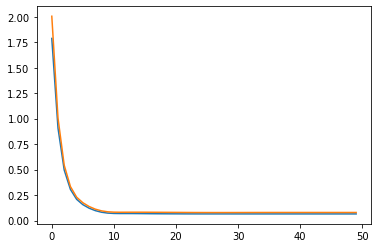

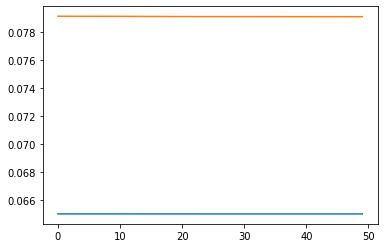

In [39]:
test_nn()

Here is an *everything*:

```python
state = None
while True:
    import random
    import string
    random_string = ''.join(chr(random.randint(32, 255)) for _ in range(100))
    try: state = eval(random_string, globals())(state)
    except: continue
# Not practically useful ever, but theoretically capable of anything.
#   Good enough for illustration.
```

With a concrete formulation like this, it's obvious that every thing cannot be contained in *nothing*, but it can be contained in *everything*.

Keeping in mind that "a software system" or "a formal set of rules" are *something*s, it can be said that *nothing* only exists as a shadow that a *something* casts onto *everything* (the universe, which is not a *something* and has no fundamental *nothing*).

Some hurry to expound how wrong everyone around is, and how meaningless their lives are.    
Others say that intelligence is not good enough for all endeavors, so you need to dare to be stupid.    
Others say that you need to let go of all worldly attachments like friends or machine learning frameworks.    
Those are worshippers of the *nothing*. A solid first step, artsy, but there are things beyond all that: the *everything*.    
(Human minds seem to develop from *something* to *nothing* to *everything*. Or, if you don't mind the ultra tacky vocabulary, from beasts to demons to gods. Or from tradition/instinct, to deconstruction, to reconstruction. It seems natural to me that all mixtures of something plus general intelligence follow this path.)

Dealing with the infinity of everything is understandably difficult, and can give rise to persistent misconceptions, including but not limited to:
- Humans have no one goal when averaged, so, their life has no meaning. In fact, it has every meaning, transforming into each other in some human-ly ways. Death is not rebirth; philosophers are people that can't separate the two. (*nothing* ≠ *everything*)
- Life has no unifying structure that defines it, therefore, there's nothing more "alive" about humans than about a sand beach. But a self-subversive generative process is markedly and obviously different from a non-generative one. (*something* ≠ *everything*)
- Any life is as good as any other, so there is no need to fully understand all details of someone else if you can just understand them as a different yourself. Understanding AI like that is like trying to become a legendary general by reading enough general self-insert fanfics. (*everything* ≠ *everything*)
- Humans can do anything and become anything they want. Efficient *everything*s are definitely embedded, however, as anyone who's ever *not* been a creative super-genius for their whole life can attest, static human instincts define most of their existence, and are hard to subvert: much to improve upon. Don't prescribe the best of humanity to all of humanity, nor the other way around. (*something* + *everything* ≠ *everything*)
- Putting enough things together results in every possible thing. No. People don't become sages by getting enough experience, programmers don't make programming languages by putting together enough programs, and AI researchers don't make AGI by getting enough narrow AIs into interoperability. (*something* × N ≠ *everything*)

Try to avoid these.

# Choice

***&lt;Where we very slowly and painfully come up with some good NNs that we'll need.&gt;***

To surprise, to delight… Is that right? It's nice to not fight, to listen to a gentle light. Glad you could join us, even if only for a fleeting moment.

There is always a choice: life or death, cookie or ash, read or play, constructive or criticism.    
The best we can do is try to see what each choice means, to know what's the best one.    
To get so far, your choices must have made you something special.    
But don't forget to take a nice relaxing break.

We'd like our <code><b>one</b>(*options)</code> type to mean a choice of types.    
There was `match_id` in the previous section, so we have some experience with pattern-matching.

Crafty hacker, do you prefer the hollowness of a specific definition, warts and bugs and all… or the richness of what it's supposed to be?    
`one(…)` represents a union type. These are an essential part of representing all data types in an elegant language: say, <code>Tree<b>(</b>a<b>)</b> = <b>one(</b>null, Ent<b>(</b>a, Tree<b>(</b>a<b>)</b>, Tree<b>(</b>a<b>)))</b></code> specifies a tree: either nothing, or a node with data typed `a` and two tree children. (Or, if we don't have to worry about doing the same work twice (for example, pure function results are cached, and generation can remember same-type values), then this is a DAG (directed acyclic graph) type.)    
Many pretty languages have been build on this paradigm. But what about a generative lens of view?
- A function that returns such a `Tree` can pick any branch and likely recurse on itself to create an arbitrary DAG. It can potentially learn to extract a good structure from non-structural input. (For this, `AutoFunc` ought to add itself to its context, and generation should filter away the boring `f(x) = f(x)` trivial-infinite-loop cases. Execution should be resilient to non-trivial infinite loops, but `Limit` does that already.)
- A function that takes such a DAG pattern-matches each case in any way. If it also takes and returns the same type (probably a `real` named `ascent_estimate`) with a merging operation, then that's half of `rewrite` right there (`ae = ascent(node, ae_sum)`). (Proper descent, which requires descending into a child only after all its parents gave it estimates, doesn't seem plausible in pure function call regime, and needs tricky-to-generate dict wizardry. …Maybe we could translate `one` inputs into `rewrite`s? How, though?)
- A function that takes and returns such a DAG (and a soft `real`) is an arbitrary rewrite rule, optimizable to return the best-performing DAG and its performance.
- Functions from and to a generative type of all types, in particular product and union and singleton types, would contain all lists, all DAGs, all execution models, all programs, all behavior, all meaning, all awareness. (This one should probably wait until after we can easily specify more fiddlable choices than `random.randint(0,9) == 0`.)

Pretty, but an optimization nightmare compared to `rewrite`.    
(But maybe, eventually, it's better to switch to that, to allow different flow, such as "try several times and pick the best"? It needs really advanced optimization techniques that I haven't seen, possibly even including proofs. What's better: painstakingly specifying a dependent-type structure, or learning something that behaves like it?)

---

But first, need more experience on the boring old ground zero.    
…I mean, sublimely fascinating code.

In composition, I've been composing output from inputs.    
But just one direction isn't enough: if an input's result is uncertain, generation of output must happen only after the uncertainty has been pattern-matched away.    
The `renn` example already had a function that dispatches based on object id (named `matcher`). We'd like to have that here too, in `match_id(generate_as)`.

When it is `finish`ed generating, it should bail out to the top-level (by raising an exception, `_GenerationResult`).    
The top level (`regenerate`) should become a function that does what `matcher` in `renn` does: pattern-match by id.    
When a particular implementation is requested to be created by the matcher, the `match_id` has to become some other type (its parameter).

In [40]:
class match_id:
    superseded = 'just fell out of favor'
    def __new__(cls, gen_as = None): return Struct(cls, gen_as)
    def call(arg, branches, obj, missing):
        return match_id._in_branches(branches, obj, missing)(arg)
    def adjust(ins, o, do):
        return adjust(match_id._in_branches(ins[1], ins[2], ins[3]), (ins[0],), o, do)
    def _in_branches(branches, obj, missing_generator):
        # Dicts of id(obj), all over the code. They'll trip over equal ids, sooner or later.
        Id = id(obj)
        if Id not in branches:
            branches[Id] = missing_generator()
        return branches[Id]

    def enum(self):
        assert False, "match_id(…) objects cannot be generated"
    def add(v):
        """Pattern-match when added."""
        t = Context.typeof(v)
        assert isinstance(t, Struct) and t[0] is match_id
        Context.type(v, t[1])
        node = Struct(match_id, args(), {}, v, ...)
        raise _GenerationResult(node, t, t[1])





def test_match_id():
    f = AutoFunc(match_id('a'), 'a')
    log(f(5), '= 5')

    g = AutoFunc(many(match_id('a'), 'a'), 'a', regenerate_when = prob(.2))
    s = set(g([i % 10, -7]) for i in range(2000))
    log(s)
    assert -7 in s
    assert len(s) == 11

%time test_match_id()

5 = 5
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -7}
CPU times: user 590 ms, sys: 44 ms, total: 634 ms
Wall time: 647 ms


The old architecture didn't lend itself well to matching, and we had to add machinery to specifically support this.    
And it's so hacky.

Well then, how would we actually implement `one`?    
Let's start with something simple: fully generate each option, then pick a random one.

In [41]:
class one:
    """Type of one of many."""
    superseded = 'just fell out of favor'
    def __new__(*x): return Struct(*x)

    def enum(self):
        """Enum each item."""
        for i in range(1, len(self)):
            yield from Context.enum(self[i])

    def add(v):
        """Pattern-match when added."""
        ## `match_id`'s method of raising an exception and giving it an _AFCopier afterwards
        ##   won't specify the pattern-matched type in each branch. Enough hacks.
        raise NotImplementedError()

    def finish(self, _):
        """Pick a random one."""
        return Context.type(Struct(random.choice, *self[1:]), self)

All such garbage. What we want are general principles of hierarchical choice optimization; who cares about nice symmetrical types? There are serious systemic issues in my approaches prior to this.    
Setting sights on *something* infinitely beautiful and far away, only to never get a reality check because it's so tricky to implement… It makes me sick.    
Like those people that think self-awareness is intelligence's most elusive property, and having it implies AGI. They never thought of what code it corresponds to. Look at this:

In [42]:
help(help)

Help on _Helper in module _sitebuiltins object:

class _Helper(builtins.object)
 |  Define the builtin 'help'.
 |  
 |  This is a wrapper around pydoc.help that provides a helpful message
 |  when 'help' is typed at the Python interactive prompt.
 |  
 |  Calling help() at the Python prompt starts an interactive help session.
 |  Calling help(thing) prints help for the python object 'thing'.
 |  
 |  Methods defined here:
 |  
 |  __call__(self, *args, **kwds)
 |      Call self as a function.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [43]:
s = "s = SELF\nprint('I am a console application, implemented as:\\n')\nprint(s.replace('SELF', repr(s), 1))"
print('I am a console application, implemented as:\n')
print(s.replace('SELF', repr(s), 1))

I am a console application, implemented as:

s = "s = SELF\nprint('I am a console application, implemented as:\\n')\nprint(s.replace('SELF', repr(s), 1))"
print('I am a console application, implemented as:\n')
print(s.replace('SELF', repr(s), 1))


Python is self-aware. A console application that prints "I am a console application" and quines its code (like my language can) is even more self-aware. Clearly, we're about to be taken over.

Let's remember what we want: repeatedly change a DAG structure in some way, and evaluate each structure, to find the best. The 'change' are rewriting rules, 'evaluate' is train for 100 epochs or something like it, but this is the overall gist.

We have state, transitions on it, and we want to maximize a final value. You know what this reminds me of? MuZero.

MuZero is an algorithm for playing games. The 'game' here means "given state (of a Go board, etc) and action (where to place the stone), give new state and reward (whether lost/won/playing)", where we want to maximize the cumulative (or final) reward (after transitioning between states).    
That algorithm does that by learning the virtualization of state into a numeric representation, learning state transition, and learning search results. Very neat: everything virtualized.

On the surface level, it's very similar to what happens in local search, so maybe it could be used there. But details are… complicated.

To formalize what we want a little bit: we have some data structure (code), the ability to run it (giving us whether a program compiles and its fitness) and to change it (which can modify any part).    
(This is a tad more exciting than playing games: what if our code representation is Turing-complete, and the system can learn to write better versions of itself?)

Immediately, there is a problem: there isn't a finite set of actions that we can do. So let's look at what we actually have.

1. We have a DAG given by recursive arrays, and we descend into it then ascend, and when we ascend, we can choose to either keep the node the same or make it into any one of `Context.enum(Context.typeof(node))`, which can create a new instance or choose an old DAG. (Note that now, we shouldn't ever call `Context.get` ourselves, but instead return `finish(type)` in the graph, to give the parent control over the choice.)    
So we have a finite choice. But it's a local choice, whereas the search happens on global results.    
There is only one possibility here: to predict the global policy/fitness locally.    
Locally, we have numeric ascent/descent estimates and message from descent to ascent, but we also must condition on the option.
2. There are several kinds of options we'll see: a DAG structure, and an object with a unique ID (such as a type that generates structure). A recursive NN should handle structure, and a separate numeric variable should be created for each unique object.    
A lot of these structures are mostly shared, so we need to cache them. We'll need a recursive NN that only ascends, as it does not depend on the entry point.    
We should have a function that produces a function that can be called on an option: `option_handler(feature_size)(option)`. Also, `rewrite` should call `ascend` on non-structs, for uniformity and to store more state.
3. Built-in functions are black-box, and can be pattern-matched by object ID to have their own NNs. But what about white-box sub-functions?    
We could treat these as black-boxes too, learning the role for each function separately, but this won't be able to predict post-change things.    
We need to recurse into bodies of these little devils. Which means that we need to rebrand `ascend` into "given descent estimate, give ascent estimate".    
Function bodies are acyclic, but for arbitrary recursion, functions themselves can be cyclic. We can either take inspiration from graph NNs and do several iterations of message-passing on the function graph (can't easily imagine how to *not* upend all control flow with this), or for cyclic references, have 1 or more sub-estimators that predict the final ascent estimate, or just make currently-being-handled references pass their message through.    
Now, I know that people are supposed to spend tens of thousands of hours on things that don't pan out, but I *think* I'm attracted to the last option.

With all that, we *should* be able to predict global estimates locally and search for the best option. With a good enough model, we could do many rewrites without evaluating, to arrive to the best option and just evaluate that once.    
It may be slow to do a search 1000 times per rewrite, but, you know, **compute**. Pretty sure that it can learn to be *much* better than things like evolution, especially if trained on a Turing-complete function set, and every program and goal are specified using those. I don't see any better way to do arbitrary white-box optimization that is necessary for general AI; do you?

If it bleeds, we can kill it. So, I'll recap what I'll do, and you can follow along if you like:

✅ `rewrite` should call `ascend` on non-structs. For this, just put non-structs into `_postorder` and push the struct check onto its users.    
(Later, changed `_postorder` back to contain only structs, for efficiency of evaluation. Didn't end up using `rewrite` after all.)    
✅ Everything that uses `rewrite` (from Ctrl+F, `regen_t` in `test_rs_1`, and `matcher` in `renn`, and `regenerate`'s `_regen_node` and `_clear_body`) should handle non-structs properly too.    
✅ Re-run and test everything.

Behind this format lies an effective task executioner. Nurture.

✅ Ctrl+F `Context.get` to gauge the plausibility of inverting control over replacing.    
The only odd cases are `access_many` and `_dense_layer_of_concat` (which uses `Context.finish` to pick every enumeration at once); probably good to leave as-is.    
❎ Have a class `of_type(Type)` as a replacement for `Context.get` for structs returned from `.finish`, rewrite that in `Context.finish` into instances of the type, and change all `Context.get` to this.    
A way to rewrite that is to have `depth=1` parameter to this `finish`, make users remember to pass in the proper value in uncommon situations, and have a global variable in `Context.finish` for max depth.    
Another way to rewrite that is to maintain a set of node id in `rewrite` (or any other user of `Context.get`/`Context.finish`), and check that constantly (and set it in a global var). Dict/set stores are less efficient than just postorder, but this is a much more general/convenient way to not go into already-seen things.    
✅ Have `with _Seen():` (used in `rewrite` and all `.has`-needing places) and `_Seen.set(k,v)`/`.get`/`.has` for the above.

In [44]:
class of_type:
    superseded = True
    """`of_type(T)` indicates that the host should replace it with `Context.get(T)`.

    This inverts control, allowing custom picking from enumerated options."""

    def __init__(self, T):
        self.T = T
    __slots__ = 'T',

class _Seen:
    """Context manager in which the same node won't be visited twice (if checking `_Seen.has(map, node)`).

    Basically overridable-by-callers lookup in a dict."""

    @staticmethod
    def exists():
        """Returns True if already in a _Seen context."""
        return TL._Seen_current is not None

    @staticmethod
    def has(m, k):
        """Returns whether the key `k` exists in the dict associated with `m`."""
        c = TL._Seen_current
        if c is not None:
            return id(m) in c and id(k) in c[id(m)]
        return False
    @staticmethod
    def get(m, k):
        """Returns the current value of key `k` in the dict associated with `m`."""
        c = TL._Seen_current
        assert c is not None
        return c[id(m)][id(k)]
    @staticmethod
    def set(m, k, v):
        """Sets the value at key `k` in the dict associated with `m` to be `v`; returns `v`."""
        c = TL._Seen_current
        assert c is not None
        if id(m) not in c: c[id(m)] = {}
        c[id(m)][id(k)] = v
        return v
    @staticmethod
    def pop(m, k):
        """Deletes the value at key `k` in the dict associated with `m` and the dict if needed."""
        c = TL._Seen_current
        assert c is not None
        result = c[id(m)].pop(id(k))
        if len(c[id(m)]) == 0:
            del c[id(m)]
        return result

    __slots__ = 's', 'prev'
    def __init__(self):
        self.s, self.prev = {}, None
    def __enter__(self):
        assert self.prev is None
        self.prev, TL._Seen_current = TL._Seen_current, self.s
    def __exit__(self, x,y,z):
        assert TL._Seen_current is self.s
        TL._Seen_current, self.prev = self.prev, None
TL._Seen_current = None



@attr(superseded = True)
def _get_types(x):
    """Rewrites `of_type(T)` into a `Context.get(T)` in the Struct-based acyclic graph `x`."""
    if x is of_type:
        ## This doesn't actually change the method of picking…
        return Context.get(x.T)
    if not isinstance(x, Struct): return x

    # Graph-walk header.
    copy = Struct(*x)
    if _Seen.has(x): return _Seen.get(x)
    else: _Seen.set(x, copy)

    # Graph-walk.
    for i in range(1, len(x)):
        copy[i] = _get_types(x[i])
    return copy

## Also set `Context.finish` to a new function that uses `_get_types`.

Oh dear. Not only does it impose inefficient copies, but it doesn't even use any non-random picking that was the whole purpose of making it.

…Besides, now that I think of it, `instance(Type)` can do the same thing, though less efficiently (generating at runtime, one at a time, not compile-time).    
…And, we could possibly even just *not* invert control flow, and pass relevant things through state.

We *must* take a close look at how choices are made and optimized before we use what's just above.

…

Okay, I'm a dumb-dumb, and need concrete examples of how choices would work.

Not a problem.

Let's say that we have 3 helicopters coming in from different directions, but we can only save one. \#0 carries ammo, \#1 carries medics, and \#2 carries soldiers. And, this repeats thousands of times, so we can learn which is the best choice.    
…    
No, too abstract.    
Let's say that we have 3 numbers that we can return (0/1/2), and the user has 3 sliders that say how good each returned number is. And, this repeats while it's allowed to.    
Now this is a concrete example.

In [45]:
def test_pre_choice_1():
    N = 3
    # Exec-adjust ✅
    import random
    learned = [0] * N
    learning_rate = 1e-2
    def choice(*goods):
        # Execute (argmax with a little bit of noise):
        picked_index = max(range(N), key = lambda i: learned[i] + random.gauss(0, 1))
        function_result = [i for i in range(N)][picked_index]
        # Obviously, we can't predict a discrete value like `result`.
        #   But we *can* predict how well it does.
        # Get loss:
        predicted, got = learned[picked_index], goods[function_result]
        loss = (predicted - got) * (predicted - got) / 2
        # Adjust loss:
        dloss = predicted - got
        # Adjust:
        learned[picked_index] += -learning_rate * dloss
        return learned

    # UI
    import ipywidgets as widgets
    from IPython.display import display
    ins = [widgets.FloatSlider(description = '#'+str(i)+'→', orientation='vertical') for i in range(N)]
    running = widgets.Checkbox(description = 'Learn the above')
    outs = [widgets.FloatProgress(description = '→#'+str(i), orientation='vertical') for i in range(N)]
    display(widgets.VBox([widgets.HBox(ins), running, widgets.HBox(outs)]))

    # Ensure that widget updates are seen.
    #   (Since I didn't thread-proof my code, no code must be running while this one does.)
    def run(*_):
        if not running.value: return
        from threading import Timer
        rs = choice(*(w.value for w in ins))
        for i,w in enumerate(outs):
            w.value = rs[i]
        Timer(0, run).start()
    running.observe(run, 'value')

test_pre_choice_1()

Widget Javascript not detected.  It may not be installed or enabled properly.


Effects of argmax and gradient descent are pretty clear: the prediction of predicted-best value is gradually adjusted to be its actual good.

But you know what's not clear? How hierarchical choice would behave.

Now, what to do: come up with some contrived example with a dozen sliders, or do some fundamental thought on how `AutoFunc`s can have their bodies re-generated (using pre-made `Context.enum` machinery)?

I predict that what we'll ultimately do is modify `Context.get` to use a function (that is `argmax` by default) on a number computed from, uh…    
We have global, local, and rewrite-rules; global is predicted by local (which has ascent estimate & message), and local calls one of available rewrite-rules (which can descend its message to its sub-rewrite-rules, before ascending to build the result up).    
Or more precisely:
- `changer` is the (global) function rewriter (which uses something much like `_regen_node` in our picture),
- `Context.get` is effectively the (local) rewriting rule picker (which has its estimate & message and the option (DAG) it considers, which is turned into a soft feature vector by `dagger`; both those are used to make a prediction of a scalar number), and
- `Context.finish` is the rewrite rule (which can build the new sub-graph with generated parts).

I think it's inconvenient to manually write descend+ascend code and its adjustment for every single rewrite rule, so we do need a `_get_types` analogue that does the rewrite.

**Fill**.

✅ Have `dagger(nn, feature_size)(dag)`.    
✅ Have naked variables for non-structs.    
✅ Make it cached/cycle-ignoring and recurse into whiteboxes (should have `_open_whitebox(af)`).

The DAGger doesn't accept arbitrary descent/ascent functions but instead re-uses one function with a known interface (pushing responsibility of defining good functions to the user, or in our case, to random search), because we're not Google, and we can't throw around compute like confetti.

In [46]:
@attr(check = lambda af: isinstance(af, AutoFunc) or isinstance(af, _SingleFunc))
def _open_whitebox(af):
    """Returns all function bodies (acyclic structs) of the arg in some self-consistent order."""
    if isinstance(af, AutoFunc):
        return af._struct,
    elif isinstance(af, _SingleFunc):
        return af.f._struct,

In [47]:
class dagger:
    superseded = True
    """Returns an adjustable function that returns the numeric representation of a possibly-DAG option.

    To be used only inside `with _Seen(): ...`."""
    _call = object()
    _visit_count = object()
    _dout = object()
    def __init__(self, nn, feature_size):
        """Uses `nn(sz, sz)` and `nn(sz+sz, sz)`
        in a recursive NN to output the adjustable representation of a DAG.
        
        Parameters
        ==========
        - ``nn``: a function from input_size to output_size,
        used to create adjustable (likely numeric) one-argument functions.
        Its input_size can be None, indicating that a variable with a constant learning rate must be created.
        - ``feature_size``: parameter passed to ``nn``, and the length of the result vector."""
        self.nn = nn
        self.feature_size = feature_size
        wbd, wba = _whitebox_descend(nn, feature_size), _whitebox_ascend(nn, feature_size)
        self.descend = _struct_matcher(self, nn, feature_size, wbd, _nn_descend, _var_descend)
        self.ascend = _struct_matcher(self, nn, feature_size, wba, _nn_ascend, _var_ascend)
        self.de_initial = np.zeros(feature_size)
        self.de_initial[0] = 1.
    def __call__(self, dag):
        """Calls `rewrite` in a read-only fashion."""
        # Graph-walk header (no GNNs, only ReNN that ignores back-references in a walk).
        c, v, d = dagger._call, dagger._visit_count, dagger._dout
        if _Seen.has(c, dag):
            _Seen.set(v, dag, _Seen.get(v, dag) + 1)
            return _Seen.get(c, dag)
        _Seen.set(c, dag, None) # Deal with graphs by not dealing with them.
        _Seen.set(v, dag, 1)
        _Seen.set(d, dag, None)

        return _Seen.set(c, rewrite(dag, self.descend, self.ascend, self.de_initial))
    def adjust(self, ins, out, dout):
        # To ensure that we adjust in exact reverse of execution,
        #   only do the actual adjust on our last visit here (that was the first visit in `__call__`).
        # (How could auto-differentiation auto-ensure this, I wonder.)
        c, v, d = dagger._call, dagger._visit_count, dagger._dout
        assert _Seen.has(c, ins[0]) and _Seen.has(v, ins[0])
        _Seen.set(d, dag, _merge(_Seen.get(d), dout)) # Preserve all `dout`s.
        if _Seen.set(v, dag, _Seen.get(v, dag) - 1) == 0:
            _Seen.pop(c, dag)
            _Seen.pop(v, dag)
            return adjust(rewrite, (ins[0], self.descend, self.ascend, self.de_initial), out, _Seen.pop(d, dag))

    __slots__ = 'feature_size', 'nn', 'descend', 'ascend', '__weakref__'



class _struct_matcher:
    superseded = True
    """Used in `dagger`.
    Creates a function that goes to a branch, dynamically creating it if needed.
    The branch is determined by id of: the first arg's head for structs, otherwise the first arg.
    
    Parameters
    ==========
    - ``Dagger``: The `dagger` that will be used to analyze bodies of whitebox functions.
    - ``nn``: The NN structure to re-use.
    - ``size``: Shape of features.
    ``nn`` and ``size`` are passed to these `default`s:
    - ``default_struct``: Default branch creator for structs. See `_nn_descend`/`_nn_ascend`.
    - ``default_naked``: Default branch creator for non-structs. See `_var_descend`/`_var_ascend`."""
    def __init__(self, Dagger, nn, size, whitebox, default_struct, default_naked, branches = None):
        assert callable(whitebox)
        if branches is None: branches = {}
        self.dagger = weakref.ref(Dagger)
        self.nn = nn
        self.size = size
        self.whitebox = whitebox
        self.default_struct = default_struct
        self.default_naked = default_naked
        self.branches = branches
    __slots__ = 'dagger', 'nn', 'size', 'whitebox', 'default_struct', 'default_naked', 'branches'

    def __call__(self, *ins):
        if isinstance(ins[0], Struct) and _open_whitebox.check(ins[0][0]):
            # If node[0] is a whitebox, use its representation for `self.whitebox`.
            bodies = _open_whitebox(node[0])
            with SetExecState(self, [None] * len(bodies)) as wbes:
                d = self.dagger()
                for i, body in enumerate(bodies):
                    wbes[i] = d(body)
                # No one cares about the order of bodies, so sum representations.
                return ins[0], self.whitebox((sum(wbes), *ins[1:]))

        return self.select_branch(ins[0])(*ins)

    def adjust(self, ins, out, dout):
        if isinstance(ins[0], Struct) and _open_whitebox.check(ins[0][0]):
            # If node[0] is a whitebox, adjust `self.whitebox` then each body's representation.
            bodies = _open_whitebox(ins[0][0])
            with GetExecState(self) as wbes:
                assert len(bodies) == len(wbes)
                # These acronyms are ridiculous, but we're now good at keeping all puzzle pieces together:
                dwbe, *dins = adjust(self.whitebox, ((sum(wbes), *ins[1:]),), out[1], dout[1])
                d = self.dagger()
                for i, body in enumerate(reversed(bodies)):
                    adjust(d, (body,), wbes[len(bodies) - i - 1], dwbe)
                return dins

        return adjust(self.select_branch(ins[0]), (ins,), out, dout)

    def select_branch(self, node):
        if isinstance(node, Struct):
            if self.whitebox is not None and _open_whitebox.check(node[0]):
                ... # I feel like there was supposed to be something here.

            i, b = id(node[0]), self.branches
            if i not in b:
                b[i] = self.default_struct(self.nn, self.size)
            return b[i]
        else:
            i, b = id(node), self.branches
            if i not in b:
                b[i] = self.default_naked(self.nn, self.size)
            return b[i]


class _var_descend:
    superseded = True
    """The result ignores the descent for simple variables.
    For use with `rewrite` and/or `_struct_matcher`."""
    def __init__(nn, size):
        pass
    def __call__(self, node, de):
        return None, None
    def adjust(self, ins, out, dout):
        pass
class _var_ascend:
    superseded = True
    """The result uses the naked variable.
    For use with `rewrite` and/or `_struct_matcher`."""
    def __init__(nn, size):
        self.v = nn(None, size)
        assert isinstance(self.v, Struct) and self.v[0] is var
    def __call__(self, node, ae, am):
        return node, var.call(*self.v[1:])
    def adjust(self, ins, out, dout):
        return None, var.adjust(self.v[1:], out, dout)

@attr(superseded = True)
def _nn_descend(nn, size):
    """Creates NNs. For use with `rewrite` and/or `_struct_matcher`."""
    # [node  de] -> [am  de].
    _, de = many.access_all(args(), 2)
    am, de2 = Struct(nn(size, size), de), Struct(nn(size, size), de)
    result = many(am, de2)
    return _SingleFunc(AutoFunc(None, None, body = result))
@attr(superseded = True)
def _nn_ascend(nn, size):
    """Creates NNs. For use with `rewrite` and/or `_struct_matcher`."""
    # [node  ae  am] -> [node  nn(…)(_flat_concat(… ae am))].
    node, ae, am = many.access_all(args(), 3)
    both = Struct(_flat_concat, ((size,), (size,)), ae, am)
    ae2 = Struct(nn(size+size, size), both)
    result = many(node, ae2)
    return _SingleFunc(AutoFunc(None, None, body = result))

@attr(superseded = True)
def _whitebox_descend(nn, size):
    """Creates the NN that uses whitebox estimate and local information. For use with `rewrite` and/or `_struct_matcher`."""
    # [whitebox_bodies_estimate  de] -> nn(…)(_flat_concat(… bodies_estimate ae am)).
    wbe, de = many.access_all(args(), 2)
    united = Struct(_flat_concat, ((size,), (size,)), wbe, de)
    ae2 = Struct(nn(size+size, size), united)
    return AutoFunc(None, None, body = ae2)
@attr(superseded = True)
def _whitebox_ascend(nn, size):
    """Creates the NN that uses whitebox estimate and local information. For use with `rewrite` and/or `_struct_matcher`."""
    # [whitebox_bodies_estimate  ae  am] -> nn(…)(_flat_concat(… bodies_estimate ae am)).
    wbe, ae, am = many.access_all(args(), 3)
    united = Struct(_flat_concat, ((size,), (size,), (size,)), wbe, ae, am)
    ae3 = Struct(nn(size+size+size, size), united)
    return AutoFunc(None, None, body = ae3)


# Could also test `dagger`, with a particular NN structure and dataset.

✅ Stacking 2 recursive NNs will have even worse stability problems than 1 reNN, and even for that I have big gradient explosion problems in `test_rs_2`. Fix that.    
✅ Try SGD with momentum.    
✅ Try normalization.

No, no, no. The `dagger` above isn't right at all. The original vision got corrupted by mistakes.

❎ Caching at entry in `dagger` makes different entry points matter. Stop using `rewrite` there (it doesn't handle non-`AutoFunc`s anyway) and start recursing manually.

…But how would we reverse execution flow to adjust properly? Called on creation & visited post-order LtR, adjusted on exit & visited pre-order RtL — is this enough to cover DAGs (which are, functionality-wise, "many children" + "shared nodes")? I think so:

```
a(b(c) d(c)):
  postorder: c b(…) d(…) a(…)
  call:
      ╭╌c — entered
    ╭╌b(…)
    │ ╭ c — not entered
    ├╌d(…)
    a(…) → out
  adjust:
    a(…) → dins
    ├╌d(…)
    │ ╰ c — not exited
    ╰╌b(…)
      ╰╌c — exited
```

…I couldn't think straight about this. I took a walk through other features that I've neglected so far. Then came back.

`rewrite` propagates down the sum of parents, and up the sum of children, ostensibly to make arrival order irrelevant. That's a little boring.    
How about sticking left and right RNNs (recurrent neural net, which is the repeated `state = RNN(state, new_info)`) for local bidirectional information accumulation in here, like in descend+ascend? One RNN is too boring.    
Could also do some self-attention layers [[Z]](https://arxiv.org/abs/1706.03762), but I think that's far too compute-intensive for us. What might be cheap enough could be [this](https://linear-transformers.com/): [[XX]](https://arxiv.org/abs/2006.16236), but bidirectional.

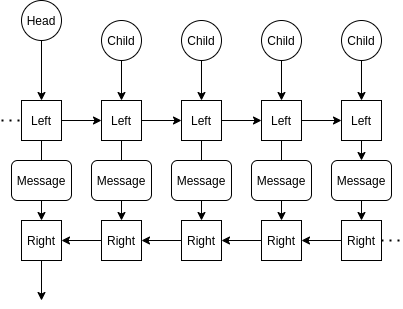

And, a separate NN for each function seems too expensive. Let's only have one variable for the function, and treat the array head the same as one of the children.

And let's call the class `_renn` (recursive NN).

In [48]:
class _Replay:
    superseded = True
    def writing(*x): ...

In [49]:
import math

class _renn:
    """
    Creator of estimators of a numeric representation.
    """
    def __init__(self, size, nn):
        self._size = size
        self._nn = nn
        self._single = {}
        self._left = nn(size*2, size*2)
        self._right = nn(size*2, size)
    __slots__ = '_size', '_nn', '_single', '_left', '_right'

    def __call__(self, x):
        """
        Gets the estimate.
        
        To be used only inside `with _Seen(): ...`!

        If a non-transparent whitebox, associates a directly-adjustable variable with it.
        Else, combines all children representations.

        No child→child nor parent→child dataflow, so results are cached.
        Suitable for structures with high degree of sharing.
        """
        if not isinstance(x, Struct) and not _open_whitebox(x):
            # Variable.
            if id(x) not in self._single:
                self._single[id(x)] = self._nn(None, self._size)
            return self._single[id(x)](None)

        # Cache. Increase ref-count. If it was 0, proceed to the below.
        if _Seen.has(self, x):
            n = _Seen.get(self, x)
            n[1] += 1 ; n[2] += 1
            if _Replay.writing():
                _Replay.add(n[4])
            return n[0]
        initial = np.zeros(self._size); initial[0] = 1.
        _Seen.set(self, x, [initial, 1, 1, None, ...]) # Don't deal with graphs.
        # [result, refcount, max_refcount, dout, ReplaySlice]

        # Combine children.
        sl = _Replay.slice() if _Replay.writing() else None
        children = x if isinstance(x, Struct) else _open_whitebox(x)
        n = len(children)
        with SetExecState(self, ([None]*n, [None]*n, [None]*n, [None]*n)) as state:
            o,l,m,r = state
            for i in range(n):
                o[i] = self(children[i])
                arg = np.concatenate((o[i], l[i-1] if i > 0 else initial))
                l[i], m[i] = np.split(self._left(arg), (self._size,))
            for i in reversed(range(n)):
                arg = np.concatenate((m[i], r[i+1] if i+1 < n else initial))
                r[i] = self._right(arg)
            _Seen.get(self, x)[0] = r[0]
            if sl is not None: _Seen.get(self, x)[4] = _Replay.slice(sl)
            return r[0]

    def adjust(self, ins, out, dout):
        x, = ins
        if not isinstance(x, Struct) and not _open_whitebox(x):
            assert id(x) in self._single
            return adjust(self._single[id(x)], None, out, dout)

        # Uncache. Decrease ref-count. If it becomes 0, proceed to the below.
        assert _Seen.has(self, x)
        n = _Seen.get(self, x)
        dout = n[3] = _merge(n[3], dout)
        n[1] -= 1
        if n[1] > 0: return
        if dout is not None:
            dout /= n[2]
        _Seen.pop(self, x)

        # Adjust the combination of children.
        children = x if isinstance(x, Struct) else _open_whitebox(x)
        n = len(children)
        with GetExecState(self) as state:
            # Rely on AutoFuncs already storing inputs in their state (so we can pass ins=None to `adjust`).
            o,l,m,r = state
            initial0 = np.zeros(self._size)
            dl, dm, dr = initial0, [None]*n, dout
            for i in range(n):
                dins, = self._right.adjust(None, r[i], dr)
                if dout is not None:
                    dm[i], dr = np.split(dins, (self._size,))
            dch = dr = None
            for i in reversed(range(n)):
                if dout is not None:
                    out = np.concatenate((l[i], m[i]))
                    dout = np.concatenate((dl, dm[i]))
                dins, = self._left.adjust(None, out, dout)
                if dout is not None:
                    dch, dl = np.split(dins, (self._size,))
                self.adjust((children[i],), o[i], dch)
            dl = None

# I like that Python restricts me to, say, one-ish assignment per line.
#   When I get the understanding established, its code grows monstrous.



class _default_nn:
    def __init__(self, learning_rate = 1, hidden_layers = 1):
        self.lr = learning_rate
        self.hl = hidden_layers
    def __call__(self, in_size, out_size):
        """
        The default building block that can be executed and adjusted to minimize error of prediction.
        Just creates a couple dense and leaky relu layers.
        """
        if in_size is None:
            body = var(np.random.normal(0, 1, out_size), self.lr)
        else:
            hidden_layers, hidden_size = self.hl, out_size+20
            L, sz = args(), in_size
            for _ in range(hidden_layers):
                w = np.random.normal(0, 1/sz, (sz, hidden_size))
                L = Struct(dense, L, var(w, self.lr))
                np.fill_diagonal(w, 1) # Bias output towards identity, not zero.
                L = Struct(leaky_relu, L)
                sz = hidden_size
            w = np.random.normal(0, 1/sz, (sz, out_size))
            np.fill_diagonal(w, 1)
            body = Struct(dense, L, var(w, self.lr))
        return AutoFunc(None, body = body)

I experimented with normalization of output. I thought it would make training far more stable and more efficient. I tried using mean and variance of `out - dout` (didn't work), then I tried multiplying and adding by learned-via-gradient numbers (multiplication caused explosions, but addition reduced both explosions and performance a little), and many tricks to make them work. Nothing worked, so I removed the code.

Machine learning can be so random even the dumb little philosophical remarks don't help, but it's important not to lose hope in these trying environments.

On the bright side, I learned how to do cross-validation and labels on plots. Let's overfit a few data points by `_renn(…)`, to make sure it's working:

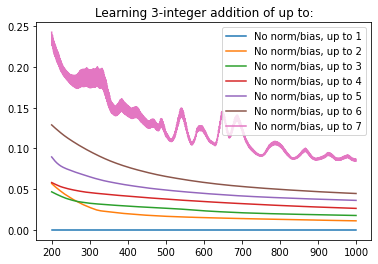

CPU times: user 27min 34s, sys: 1min 25s, total: 28min 59s
Wall time: 28min 5s


In [50]:
import matplotlib.pyplot as plt

def test_renn_1():
    def train(dataset):
        renn = _renn(5, _default_nn(.1))
        ls = []
        for epoch in range(1000):
            s = 0
            with ExecState():
                for i,o in dataset:
                    with _Seen():
                        p = renn(i)
                        s += abs(np.sum(p) - o)
                        adjust(renn, (i,), p, np.broadcast_to(np.sum(p) - o, p.shape) / p.size)
                var.commit()
            s /= len(dataset)
            if s > 1e5: break
            sys.stdout.write(f'\rEpoch {epoch+1}, {len(dataset)} items, mean error {s}   \r')
            sys.stdout.flush()
            ls.append(s)
        return ls
    def dataset(n):
        return [
            (Struct(a,b,c), a+b+c)
            for a in range(1,n+1)
            for b in range(1,n+1)
            for c in range(1,n+1)
        ]
    # (Heads take up too much space, and obscure tails.)
    r = range(200, 1000)
    np.random.seed(1) ; plt.plot(r, train(dataset(1))[200:], label='No norm/bias, up to 1')
    np.random.seed(1) ; plt.plot(r, train(dataset(2))[200:], label='No norm/bias, up to 2')
    np.random.seed(1) ; plt.plot(r, train(dataset(3))[200:], label='No norm/bias, up to 3')
    np.random.seed(1) ; plt.plot(r, train(dataset(4))[200:], label='No norm/bias, up to 4')
    np.random.seed(1) ; plt.plot(r, train(dataset(5))[200:], label='No norm/bias, up to 5')
    np.random.seed(1) ; plt.plot(r, train(dataset(6))[200:], label='No norm/bias, up to 6')
    np.random.seed(1) ; plt.plot(r, train(dataset(7))[200:], label='No norm/bias, up to 7')
    plt.title('Learning 3-integer addition of up to:')
    plt.legend()
    plt.show()

%time test_renn_1()

Machine learning can optimize anything, and we're free to pick whatever dataset we want, so allow us to test `_renn` on predicting evaluation result of arithmetic ops on a few numbers. (A DAG of +-×÷, 0123456789, maybe sqrt, maybe even "create number" — `(num 1 2 0) = 120`.)    
This is way more useful than that "mostly just ×10" ridiculousness from earlier.    
And from a learning standpoint, there isn't that much difference between "evaluation by tree-walk" and something like "proof" [[YY]](https://arxiv.org/abs/2006.06462).

For this, we cross-validated (same PRNG seed, different hyperparameters) batch size given the same amount of compute (which in our framework means "call `var.commit` several times during one mega-epoch"). I didn't expect any difference, but it turns out, the smaller the batch size the better.

The final run took 4 hours ⧗, so I'm making sure I won't accidentally run it again:

```python
def test_renn_2():
    def add(x,y): return x+y
    def sub(x,y): return x-y
    def mul(x,y): return x*y
    def div(x,y): return x/y if y != 0 else None
    def sqrt(x): return math.sqrt(x) if x > 0 else None
    def decimal(*ns):
        s = 0
        for n in ns: s = s*10 + n
        return s
    def undecimal(s):
        n = []
        while s > 0: n.append(s % 10); s //= 10
        n.reverse()
        return n

    def get_body(ctx, depth = 20):
        if len(ctx) and (random.random() < .2 or depth <= 0):
            return random.choice(ctx)
        n = random.randint(0, 6)
        if n == 0: # 0123456789
            body = random.randint(0, 9)
        elif n == 1: # + X Y
            body = Struct(add, get_body(ctx, depth-1), get_body(ctx, depth-1))
        elif n == 2: # - X Y
            body = Struct(sub, get_body(ctx, depth-1), get_body(ctx, depth-1))
        elif n == 3: # × X Y
            body = Struct(mul, get_body(ctx, depth-1), get_body(ctx, depth-1))
        elif n == 4: # ÷ X Y
            body = Struct(div, get_body(ctx, depth-1), get_body(ctx, depth-1))
        elif n == 5: # √ X
            body = Struct(sqrt, get_body(ctx, depth-1))
        elif n == 6:
            body = Struct(decimal, *undecimal(random.randint(10, 100)))
        else:
            assert False
        if random.random() < .3:
            ctx.append(body)
        return body
    def eval_body(body):
        if not isinstance(body, Struct): return body
        args = [eval_body(body[i]) for i in range(1, len(body))]
        if any(a is None for a in args): return
        return body[0](*args)

    random.seed(10)
    np.random.seed(10)
    dataset = []
    while len(dataset) < 300:
        body = get_body([], 12)
        out = eval_body(body)
        if out is None:
            dataset.append((body, 0))
        elif abs(out) < 200:
            dataset.append((body, out / 100))

    def train(dataset, batch_size):
        renn = _renn(20, _default_nn(2))
        ls = []
        for epoch in range(210):
            s = 0
            with ExecState():
                for n,(i,o) in enumerate(random.sample(dataset, len(dataset)), batch_size):
                    with _Seen():
                        p = renn(i)
                        s += abs(np.sum(p) - o)
                        adjust(renn, (i,), p, np.broadcast_to(np.sum(p) - o, p.shape) / p.size)
                        if (n+1) % batch_size == 0:
                            var.commit()
                s /= len(dataset)
            if s > 1e5 or math.isnan(s): break
            sys.stdout.write(f'\rEpoch {epoch+1}, mean error {s}.   \r')
            sys.stdout.flush()
            ls.append(s)
        return ls
    plt.title('Predicting evaluation') ; plt.xlabel('Epoch - 10') ; plt.ylabel('Mean error')
    np.random.seed(2) ; plt.plot(train(dataset, len(dataset))[10:], label = 'No batching (300)')
    np.random.seed(2) ; plt.plot(train(dataset, 100)[10:], label = 'Batch size 100')
    np.random.seed(2) ; plt.plot(train(dataset, 30)[10:], label = 'Batch size 30')
    np.random.seed(2) ; plt.plot(train(dataset, 10)[10:], label = 'Batch size 10')
    np.random.seed(2) ; plt.plot(train(dataset, 3)[10:], label = 'Batch size 3')
    np.random.seed(2) ; plt.plot(train(dataset, 1)[10:], label = 'Batch size 1')
    plt.legend()
    plt.show()

%time test_renn_2()
```

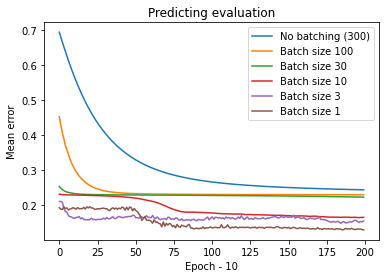

Are you tired of these obviously completely useless datasets? I know I am.    
After I'm done with this "train models in 10 minutes" foolishness, I dream of searching for [Metamath](http://us.metamath.org/index.html) proofs. A big and useful dataset, not very difficult to get to doing things with it. Learning to prove random and existing theorems. Comparing several searching methods on it: random, evolution, choice optimization. Worthy of a scientific publication, no?

---

You might have noticed that I don't run anything on the GPU. Why? The last time I tried to install a GPU-accelerated numeric library, I had to reinstall my operating system. My hardware is just too old. The only library that works is TensorFlowJS (note the "JS"), or maybe I didn't look enough. Still, for now, the best I can hope for is a 2× speedup from multi-CPU training.    
The fact is, no matter how hard I try, I'll never be able to match you.

## Replay buffers

***&lt;Where we learn from our mistakes.&gt;***

To not get lost in the infinite, remember your past.    
(For example, a tutorial or a movie is useless if you don't relate it to what you've done, to extract a lesson that could change your behavior. Alternatively, don't try to understand everything at once, but reflect on each new piece of information.)

You could say that functions exist only in the space of all their possible inputs, connected to their outputs by execution; in other words, one adjustment only follows one execution. But coupling learning and experience-gathering like that can prohibit learning in very vast input/output spaces (such as whole games or program search). Replay buffers can help.

(When would such a consideration arise in purely-theoretical pursuits of AGI? Never. Theory is useless for general intelligence, only practice can help, which machine learning is full of.)

Just remembering top-level input+output isn't enough if some control flow inside is non-static: it depends on randomness or learned representations (like choices do). We need everything inside, too.    
Implementation details:    
After fixing control flow, only one thread of execution exists, so we only need one tape (one list).    
Adjustment is perfectly the reversal of execution (control-flow wise), so after the end of the tape is reached, we only need to go through it again from the start.

Let me sketch out the interfaces used.

✅ Low-level:    
We want a re-usable context manager for functions that want to replay choices: `with _Replay(): ...`.    
`_Replay.reading()`, `_Replay.get()→v`, `_Replay.add(v)` for non-static parts:    
if replaying, get once, else add once (on adjustment, get once).    
✅ Want the `impure` decorator for non-adjustable but potentially-non-deterministic things like file IO.    
✅ Retroactively figure out how to un/pickle `AutoFunc`s. (`.__getstate__(self)→state` and `.__setstate__(self, state)`.)

2
#1


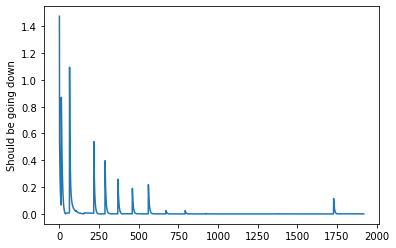

Should be roughly 1.2368648841272334: [1.2456176650246173] [1.2368480573088805] [1.2375970507449965]
Should be roughly 0.43415981385610325: [0.4341708305597653] [0.44970688326890557] [0.42845855877847766]
Actual sum/mult: (1.6797884955843827, 0.5408108561836537)
 Ideal sum/mult: (1.6710246979833365, 0.5369970278578303)


In [51]:
TL._Replay = None
TL._Replay_state = None
class _Replay:
    """
    Using a replay buffer means to be able to replace every non-static part
    of control flow with its statically-remembered result.

    Everything using randomness or learned state to determine control-flow should be
    `fc(_Replay.get() if _Replay.reading() else _Replay.add(…))` on call,
    `fa(_Replay.get())` on adjust.

    Replaying itself is a non-pure op, so the `_Replay` object or its tape must be saved in replays.

    If executing without a replay or adjustment, make sure to call `_Replay.pause()` afterwards.
    """
    def __init__(self, tape = ..., state = None):
        """
        Pass in nothing to record a replay.
        Enter a replay as a context manager to replay the experience.
        """
        assert tape is ... or isinstance(tape, list)
        self.rc = 0
        self.prev = self.prev_state = None
        self.tape = tape if tape is not ... else []
        self._state = state
        self._reset()
        if len(self.tape) == 0:
            self.direction = _Replay._write
            self.tape.append([]) # For `impure`.

    def __enter__(self):
        if self.rc == 0:
            self.prev, TL._Replay = TL._Replay, self
            s2 = dict(TL._Replay_state) if TL._Replay_state is not None else {}
            if self._state: s2.update(self._state)
            self.prev_state, TL._Replay_state = TL._Replay_state, s2
        self.rc += 1
    def __exit__(self, x,y,z):
        self.rc -= 1
        if self.rc == 0:
            prev = TL._Replay
            if prev is not None:
                if prev.direction == _Replay._write:
                    _Replay.reset()
                    prev = None
            if x is not None: # Reset on error to not cause another error on replay.
                self._reset()
            TL._Replay, self.prev = self.prev, None
            TL._Replay_state, self.prev_state = self.prev_state, None
            # If you don't have the habit of developing slowly and
            #   don't check every part for slightest errors,
            #     and this is quite the nasty assertion.
            if x is None: assert prev is None, "Somewhere before, did not _Replay.get() enough."

    def __getstate__(self):
        return self.tape, self._state
    def __setstate__(self, st):
        self.__init__(*st)

    __slots__ = 'tape', 'direction', 'position', 'impure_position', '_state', 'prev', 'prev_state', 'rc'

    _write = 0
    _read = 1
    _backward = 2

    @staticmethod
    def reading():
        """
        Returns whether we are currently replaying an experience.

        If True, the dynamic part should use `_Replay.get()` to repeat a prior result,
        else `_Replay.set(…)` to be able to repeat it later.

        Do not use this on adjustment.
        """
        self = TL._Replay
        return self is not None and self.direction == _Replay._read
    @staticmethod
    def writing():
        """Returns whether we are writing a replay.

        Do not use this on adjustment."""
        return TL._Replay is not None and TL._Replay.direction == _Replay._write

    @staticmethod
    def impure_get():
        """
        Remembers the previous value on replay. For non-adjustable (user) code.

        if _Replay.reading():
            return _Replay.impure_get()
        else:
            return _Replay.impure_add(func(*args, **kwargs))
        """
        self = TL._Replay
        v = self.tape[0][self.impure_position]
        self.impure_position += 1
        if self.position == 1 and self.impure_position == len(self.tape[0]):
            self._reset()
            TL._Replay = None
        return v

    @staticmethod
    def impure_add(v):
        """
        Remembers the value to replay. For non-adjustable (user) code.
        """
        if TL._Replay is not None:
            TL._Replay.tape[0].append(v)
            TL._Replay.impure_position += 1
        return v
        

    @staticmethod
    def get():
        """
        Returns the dynamically-computed-if-not-replaying value.

        Always use this on adjustment, and conditionally on execution before that.
        """
        self = TL._Replay
        assert self is not None
        if self.direction == _Replay._read and self.position == len(self.tape):
            assert self.impure_position == len(self.tape[0]), "Some impure behavior is not @impure"
        if self.direction == _Replay._write or self.position == len(self.tape):
            assert len(self.tape) > 1, "Nothing to get; wrong replay, or didn't add anything"
            self.direction = _Replay._backward
            self.position = len(self.tape) - 1
        v = self.tape[self.position]
        self.position += 1 if self.direction == _Replay._read else -1
        if self.position == 0 and self.impure_position == len(self.tape[0]):
            self._reset()
            TL._Replay = None
        return v

    @staticmethod
    def add(v):
        """
        Remembers a value for replay.
        """
        self = TL._Replay
        if self is None:
            self = TL._Replay = _Replay()
        assert self.direction == _Replay._write
        if not isinstance(v, _ReplaySlice):
            self.tape.append(v)
        elif id(self) not in v.seen:
            self.tape[0].extend(v.tape[0][v.ip1 : v.ip2])
            self.tape.extend(v.tape[v.p1 : v.p2])
            v.seen.append(id(self))
        return v

    @staticmethod
    def pause():
        """
        Pauses replay at the end of its scope; returns the replay object.
        Use for execution without adjustment, or non-top-level execution+adjustment.
        """
        self = TL._Replay
        TL._Replay = None
        return self

    @staticmethod
    def reset():
        """
        Resets the current replay to its initial ready-to-read state.
        Use when an exception arises near the creation of a replay.
        """
        if TL._Replay is not None:
            self = TL._Replay._reset()
            TL._Replay = None
            return self
    def _reset(self):
        self.direction = _Replay._read
        self.position = 1
        self.impure_position = 0
        return self


    @staticmethod
    def state(keyed, st = ...):
        """Allows remembering state in newly-created replay buffers.
        For functions that will change control flow depending on state."""
        if st is ...:
            "Read TL._Replay_state at `keyed`."
            if TL._Replay_state is None: return None
            return TL._Replay_state.get(keyed, None)
        else:
            "Write: return a ctx manager that sets current threadlocal state at `keyed` to `st`."
            return _ReplayState(keyed, st)

    @staticmethod
    def slice(t = ...):
        """Allows remembering slices of the current replay buffer for possible later insertion into others.
        For functions that implement replay-buffer-aware caching with `_Seen` (such as `_renn`)."""
        self = TL._Replay
        assert self.direction == _Replay._write
        if t is ...:
            return self.impure_position, len(self.tape)
        else:
            return _ReplaySlice(self, t)

class impure:
    """
    A decorator for functions that are non-learnable but potentially-non-deterministic, like network IO.
    Their results are saved separately in replay buffers.
    """
    def __call__(self, /, *args, **kwargs):
        if _Replay.reading():
            return _Replay.impure_get()
        else:
            return _Replay.impure_add(self._f(*args, **kwargs))
    adjust = None

    __slots__ = '_f',
    def __init__(self, f):
        self._f = f
    def __getattr__(self, key):
        return getattr(self._f, key)


class _ReplayState:
    """A context manager for adding to the remembered state of newly-created-inside replay buffers."""
    def __init__(self, k, v):
        self.prev = None
        self.k = k
        self.v = v
    __slots__ = 'prev', 'k', 'v'
    def __enter__(self):
        assert self.prev is None
        prev = TL._Replay_state
        # TL._Replay_state is immutable.
        new = dict(prev) if prev is not None else {}
        new[self.k] = self.v
        self.k, self.v = None, None
        self.prev, TL._Replay_state = prev, new
        return self
    def __exit__(self, x,y,z):
        TL._Replay_state, self.prev = self.prev, None

class _ReplaySlice:
    """A read-only slice of a replay buffer that can be added to another replay buffer."""
    def __init__(self, r, t):
        self.tape = r.tape
        self.ip1, self.p1 = t
        self.ip2, self.p2 = r.impure_position, len(r.tape)
        self.seen = [id(r)] # To not add the same slice to the same replay twice.
    __slots__ = 'tape', 'ip1', 'ip2', 'p1', 'p2', 'seen'



def test_replay():
    with _Replay():
        _Replay.add(600)

    # Writing these tests is harder than writing these classes.
    def choice_adjust(ins,o,do):
        dins = [None] * len(ins)
        dins[_Replay.get()] = do
        return dins
    @attr(adjust = choice_adjust)
    def choice(*ins):
        if _Replay.reading():
            i = _Replay.get()
        else:
            i = _Replay.add(random.randrange(len(ins)))
        return ins[i]

    _Replay.pause()
    print(choice(1,2,3,4))
    print('#' + str(_Replay.get()))



    LR = .05
    def add_mult_adjust(i,o,do):
        a, b = i[0][0], i[1][0]
        dadd, dmult = do
        da, db = dadd + dmult * b, dadd + dmult * a
        i[0][0] -= LR * da
        i[1][0] -= LR * db
        return da, db
    @attr(adjust = add_mult_adjust)
    def add_mult(a,b):
        return a[0] + b[0], a[0] * b[0]

    @impure
    def noise():
        return random.gauss(0,1)

    As = [[abs(random.gauss(0,1))] for _ in range(3)]
    Bs = [[abs(random.gauss(0,1))] for _ in range(3)]
    def f_adjust(i,o,do):
        with GetExecState(f) as state:
            dchoices = adjust(add_mult, (state[0], state[1]), o, do)
            db = adjust(choice, Bs, state[1], dchoices[0])
            da = adjust(choice, As, state[0], dchoices[1])
    @attr(adjust = f_adjust)
    def f():
        with SetExecState(f, [0,0,0]) as state:
            state[0] = choice(*As)
            state[1] = choice(*Bs)
            state[2] = add_mult(state[0], state[1])
            noise()
            return state[2]


    dataset = [((a,b), (a+b, a*b))
               for a in [abs(random.gauss(0,1))]
               for b in [abs(random.gauss(0,1))]
               for _ in range(1)]

    losses = []
    replays = 0
    for _ in range(20):
        for data in dataset:
            _, data_out = data
            with ExecState():
                r = _Replay()
                for __ in range(replays+1):
                    with r:
                        out = f()
                        dout = out[0] - data_out[0], out[1] - data_out[1]
                        adjust(f, (), out, dout)

                        losses.append(abs(dout[0] + dout[1]))
        replays += 10
    
    import matplotlib.pyplot as plt
    plt.plot(losses)
    plt.ylabel('Should be going down')
    plt.show()
    print(f'Should be roughly {dataset[0][0][0]}:', *As)
    print(f'Should be roughly {dataset[0][0][1]}:', *Bs)
    print('Actual sum/mult:', (As[0][0]+Bs[0][0], As[0][0]*Bs[0][0]))
    print(' Ideal sum/mult:', dataset[0][1])
test_replay()

In [52]:
def f(x,y): return x+y
def g(x,y): return x*y
def test_af_pickle():
    af = AutoFunc(None, body = Struct(g, Struct(f, 1, 2), 3))
    assert af(None) == 9

    import pickle
    af2 = pickle.loads(pickle.dumps(af, protocol=-1))
    assert af2(None) == 9
test_af_pickle()

✅ High-level:    
For training out of the main execution sequence:    
Have replay buffers `examples.replay(limit = 1000)(f)` which auto-add input+output+tape.    
They run on top of `examples(*initial)(func)` (which adds the func to a global store, removed when the func gets deleted), and `examples.add(func, ins, out, replay = None)` and the explicit `examples.all` weakly-referencing id→func dict, and `examples.fit(what = ...)`.

…But the whole concept of `examples` requires functions to be differentiable (adjustable). We can't do that. Away it goes.    
Shame felt at this waste. But replays can still be of use.    
Simplicity.

✅ Have replay buffers `replay(limit = 100)(f)` which auto-adds inputs+tape.    
`replay.add(func, ins, replay)` and `replay.all` and `replay.redo(what = ..., …)`.

In [53]:
import weakref

class replay:
    """
    A decorator that makes a function remember recent replay buffers when called, for reliving the experience.

    @replay()
    def f(): ...
    """
    all = weakref.WeakValueDictionary({})
    def __init__(self, limit = 100):
        self.limit = limit
    def __call__(self, func):
        if self.limit == 0: return func
        return _replayed_func([], func, self.limit)

    @staticmethod
    def add(func, ins, replay):
        """
        Adds inputs and replay to a function's replay buffer.
        """
        assert isinstance(func, _replayed_func)
        func._dataset.append((ins, replay))
        if func._limit > 0 and len(func._dataset) >= func._limit * 2: # Ensure linear runtime with `* 2`.
            del func._dataset[:-func._limit]

    @staticmethod
    def redo(what = ..., single_thread = True, work_for = 1):
        """
        Trains a function or a list of functions.

        Parameters
        ==========
        - ``what``: what to train (repeatedly execute+adjust).
        Is `replay.all` by default, as a moonlight guides.
        - ``single_thread``: False to train in parallel.
        - ``work_for``: how many seconds to train for.
        """
        if what is ...:
            what = replay.all

        if isinstance(what, dict) or isinstance(what, weakref.WeakValueDictionary):
            fs = [*what.values()]
        elif isinstance(what, list) or isinstance(what, tuple):
            fs = what
        else:
            fs = (what,)

        import time
        end = time.perf_counter() + work_for
        if single_thread:
            while True:
                try:
                    _redo_all(fs, end)
                except RecursionError:
                    pass
                if end < time.perf_counter(): break
        else:
            # `pickle` tries to deconstruct globals, so
            #   we get pickling errors. I don't know how to fix it
            #     (without imposing a huge burden on the user, with an out-of-line definition).
            parallel(_redo_all, fs, end, work_for = work_for)

def _redo_all(fs, end):
    for f in fs:
        f._redo(end)



class _replayed_func:
    def __call__(self, *ins):
        """
        Adds a new replay to the current replay,
        executes the function,
        and adds function inputs/output/tape to its dataset.

        Even recursive replays will be saved & restored correctly.
        """
        if self._limit == 0:
            return self._func(*ins)
        if _Replay.reading():
            r = _Replay.impure_get()
        else:
            r = _Replay()
        self._visits += 1
        try:
            with r:
                out = self._func(*ins)
                # Pause `r`, but copy its reset version into the replay buffer.
                _Replay.pause()
                return out
        finally:
            self._visits -= 1
            if not _Replay.reading():
                if self._visits == 0: # Ensure only one replay per call tree.
                    replay.add(self, ins, _Replay(r.tape, r._state))
                if _Replay.writing():
                    _Replay.impure_add(r)

    def _redo(self, end):
        """Fits the function to known output & replay, once, at top-level."""
        assert TL._Replay is None, "Not at top-level"
        with ExecState():
            for batch in var.batch(self._dataset):
                for ins, r in batch:
                    if r is None:
                        self._func(*ins)
                    else:
                        with r:
                            self._func(*ins)
                    if end < time.perf_counter():
                        var.commit()
                        return
                var.commit()


    __slots__ = '_dataset', '_func', '_limit', '_visits', '__weakref__'
    def __init__(self, dataset, func, limit):
        assert not hasattr(func, 'adjust')
        self._dataset = dataset
        self._func = func
        self._limit = limit
        self._visits = 0
        replay.all[id(self)] = self

    def __getstate__(self):
        return self._dataset, self._func, self._limit
    def __setstate__(self, state):
        self._dataset, self._func, self._limit = state
    def __getattr__(self, key):
        return getattr(self._func, key)



# I don't feel like writing a good test.
TL._Replay = None
@impure
def _g():
    return random.random()

@replay()
def _f(x):
    print('Called with x =', x, 'and RNG number =', _g())
    return 3
_f(1)
replay.redo(..., work_for=0)

Called with x = 1 and RNG number = 0.36128062578015063
Called with x = 1 and RNG number = 0.36128062578015063


It's global, and it's out-of-band. It just begs to have saving/loading and parallelization added to it.

## Multiprocessing, and global saving/loading

***&lt;Where we add basic usability features.&gt;***

✅ Put *all* global variables inside `threading.local()`, so that our code is "user-proof".

```python
import pickle
help(pickle)
```

Here, we will complain about Python's pickling, then use Python's pickling.    
Really, what kind of idiot just accepts that executable code in a fundamentally-unsafe language is the best data exchange format (at least, that's what I'm assuming from documentation)? Even ██ ████████ had *sandboxed* code execution in parsing; *this* is just… dumb. And by 'dumb' I mean "it was probably hacked thousands of times, and probably cost millions of moneys". Easy access to an imperfect thing is so insidious.    
Oh, and of course, pickling has no way to replace values with another values, because who needs that. Me, that's who. I guess that sending all variables in existence is the way to go for parallelizing a batch.

✅ Make the `var` constructor add to (weakly-referencing) name→nparray dict `var._to_join` and id(nparray)→name dict `var._to_split`.    
✅ Have `var.split(func)` that pickles func (with everything possible going through `var._to_split`) and names of everything inside, and `var.join(pickled)` that does the opposite. (For sending to child processes.)    
✅ Have `var.commit(share = False)`, serializing deltas if True, and applying a serialization if passed.

Now epochs are, in principle, parallelizable.

In [54]:
import numpy as np
import weakref



TL.var_deltas = {}
class var:
    # I do know that re-implementing things that are already better done in other places
    #   is not the brightest idea. But I needed to understand how it's done.
    """A variable that holds and subtracts from a numpy array, for SGD with Nesterov momentum."""
    def __new__(cls, v, speed, deceleration = .9):
        return Struct(cls, var._see(v), var._see(np.zeros_like(v)), speed, deceleration)
    def call(v, momentum, speed, decel):
        return v + decel * momentum
    def adjust(i,o,do):
        if do is None: return
        v, momentum, speed, decel = i
        # Standard SGD is adding `-speed * do` to `v` (decel=0).
        # But just one learning_rate switch is not the perfection.
        # Seeing the code, it can be made into anything: momentum with state like here, a NN, etc.
        mom2 = decel * momentum - (1 - decel) * speed * do
        var.update(momentum, mom2 - momentum)
        var.update(v, mom2)

    def filter(_, __): return False

    @staticmethod
    def commit(cancel = False):
        """Commits changes to numeric variables that were made with `var.update`.

        Parameters
        ==========
        - ``cancel``: If True, discards updates."""
        d = TL.var_deltas
        if not cancel:
            # Share data with other processes, if any.
            if var._puts is not None:
                assert var._gets is not None and len(var._puts) == len(var._gets)
                import pickle
                update = pickle.dumps([(var._to_split[id(v)], delta, n) for v, delta, n in d.values()])
                for q in var._puts:
                    q.put(update, True, .1)
                for q in var._gets:
                    first = True
                    while True:
                        # Read from each queue until an exception (Empty).
                        try: share = q.get(first, .1)
                        except: break
                        first = False
                        for name, delta, n in pickle.loads(share):
                            if name in var._to_join:
                                var.update(var._to_join[name], delta, n)
                            else:
                                var.joining_errors += 1

            # Commit.
            for v, delta, n in d.values():
                # Changing global learning rate can't compensate for this division
                #   if in non-fixed control flow.
                delta /= n

                # Also do some gradient rescaling.
                l = np.sqrt(np.sum(delta * delta))
                if l > 1: delta *= 1 / l

                Past.save(v); v[:] = v + delta; v[v == 0] = 1e-10

        d.clear()

    @staticmethod
    def batch(dataset, num_batches = 5):
        """
        Batches a dataset (or an array), distributing work between processes if needed.

        Example of usage:

        for batch in var.batch(dataset):
            for ins, out in batch:
                pred = func(*ins)
                adjust(func, ins, pred, pred - out)
            var.commit()
        """
        I, N = var._process_index, 1 if var._puts is None else 1+len(var._puts)
        L = len(dataset)
        r = range(int(L * I/N), int(L * (I+1)/N))
        indexes = random.sample(r, len(r))
        step = int(1 + (len(r)-1) / num_batches) # Round up.
        for i in range(num_batches):
            x, y = min(i * step, len(r)), min((i+1) * step, len(r))
            yield (dataset[indexes[j]] for j in range(x, y))


    @staticmethod
    def update(v, delta, n = 1):
        """Adds `delta` to `v`, later at `var.commit`.
        Done automatically when a variable receives gradient."""
        # A much more efficient way to do these would be to
        #   store both value and delta and n in one NumPy array.
        #   Almost no dict lookups, then (except at inter-process messaging).
        assert v.shape == delta.shape, "Wrong shapes"
        d, i = TL.var_deltas, id(v)
        if i in d:
            d[i][1] += delta
            d[i][2] += n
        else:
            var._see(v) # Shore up possible users' forgetfulness.
            d[i] = [v, delta, n]



    # De/serialization and parallelization stuff below.

    @staticmethod
    def is_main_process():
        """Returns True if this process was not spawned by `parallel`."""
        return var._process_index == 0

    joining_errors = 0

    _puts = None
    _gets = None
    _process_index = 0

    _free_names = [0]
    _to_join = weakref.WeakValueDictionary() # name → array
    _to_split = {} # id(array) → name
    @staticmethod
    def _see(arr, name = None):
        """Remembers the (NumPy) array for splitting/joining.
        Call this when creating the array that will be passed to `var.update(array, …)`."""
        if id(arr) in var._to_split: return arr
        names = var._free_names
        if name is None:
            name = names.pop() if len(names) > 1 else names[0]
            if len(names) == 1: names[0] += 1
        elif name+1 > names[0]:
            names[0] = name+1

        if name in var._to_join and not np.array_equal(arr, var._to_join[name]) and not np.isnan(np.sum(arr)):
            print('had', var._to_join[name])
            print('got', arr)
            assert False, f"Duplicate name {name} for a newly-seen array"

        var._to_split[id(arr)] = name
        var._to_join[name] = arr
        weakref.finalize(arr, var._unsee, name)
        return arr
    @staticmethod
    def _unsee(name):
        if name in var._to_join:
            i = id(var._to_join[name])
            if i in var._to_split:
                del var._to_split[i]
            del var._to_join[name]
            var._free_names.append(name)
    @staticmethod
    def _split(obj):
        """
        Pickling.
        Splits an object for giving from a parent process to its child.
        The batch-parallelizing part of `var.commit` will be available.
        """
        import pickle
        return pickle.dumps((obj, dict(var._to_join)), protocol=-1)
    @staticmethod
    def _join(pickled):
        """
        Unpickling.
        Accepts an object given to a child.
        """
        import pickle
        obj, tj = pickle.loads(pickled)
        for name, array in tj.items():
            var._see(array, name)
        return obj

✅ Test `parallel`. Take some prior test and parallelize it, damn it!

In [55]:
def parallel(func, *args, processes = ..., work_for = 10, warmup = True):
    """
    Calls func with args many times.

    Call this inside `if __name__ == '__main__': ...` to
    not spawn processes endlessly. (Unneeded if forking.)

    `var.commit()` inside will share data with other processes.
    `for batch in var.batch(dataset): ...` will split the workload evenly.

    Keyword parameters
    ==================
    - ``processes``: how many processes to fork/spawn.
    By default, is `multiprocessing.cpu_count`.
    - ``work_for``: how many seconds this call is guaranteed to last.
    10 by default.
    - ``warmup``: whether we need one function call in the main thread to warm up data sharing.
    (We do, with the current implementation of `_renn` and such.)
    """
    if warmup: func(*args) # We fill id(obj)→var dicts dynamically, so we need to warm up.

    # Have a queue (of variables' updates) from each process to each process.
    import multiprocessing as mp
    N = mp.cpu_count() if processes is ... else processes
    if N == 1:
        return _accept_queues(work_for, 0, None, None, (func, args))

    q = [[mp.Queue() if i != j else None for j in range(N)] for i in range(N)]
    puts = [[q[i][j] for j in range(N) if i != j] for i in range(N)]
    gets = [[q[j][i] for j in range(N) if i != j] for i in range(N)]
    fas = var._split((func, *args))
    ps = [mp.Process(target = _accept_queues, args = (work_for, i, puts[i], gets[i], fas)) for i in range(1, N)]
    for p in ps: p.start()
    try:
        _accept_queues(work_for, 0, puts[0], gets[0], (func, args))
        for p in ps: p.join()
    except:
        for p in ps: p.kill()
        raise

def _accept_queues(work_for, ind, puts, gets, fas):
    if ind != 0:
        func, *args = var._join(fas)
    else:
        func, args = fas
    import time
    assert var._puts is None and var._gets is None, "Call to `parallel` inside `parallel`."
    var._puts, var._gets, var._process_index = puts, gets, ind
    end = time.perf_counter() + work_for
    try:
        while True:
            func(*args)
            if end < time.perf_counter(): break
    finally:
        var._puts, var._gets, var._process_index = None, None, 0

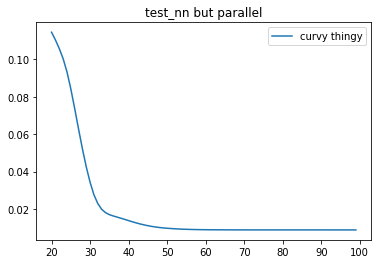

CPU times: user 5.79 s, sys: 65.8 ms, total: 5.86 s
Wall time: 8.6 s


In [56]:
def fit_dataset(func, dataset, loss = loss2, num_batches = 5):
    """Fits a function to a dataset for one epoch. Returns the mean loss and None."""
    s = 0
    for batch in var.batch(dataset, num_batches):
        for ins, out in batch:
            predicted = func(*ins)
            L = loss(predicted, out)
            func.adjust(ins, predicted, adjust(loss, (predicted, out), L, 0)[0])
            s += abs(L)
        var.commit()
    return s / len(dataset), None




def _train(func, dataset, N):
    ls = []
    for i in range(N):
        l, _ = fit_dataset(func, dataset, loss2, 1) # num_batches=1 for smoothness.
        ls.append(l)
        if var.is_main_process():
            sys.stdout.write(f'Iteration {i+1}/{N}, loss {l}\r')
            sys.stdout.flush()
    if var.is_main_process():
        import matplotlib.pyplot as plt
        plt.plot(range(20, len(ls)), ls[20:], label = 'curvy thingy')
        plt.legend()
        plt.title('test_nn but parallel')
        plt.show()

def _concat_two_numbers(x,y):
    return np.array((x, y))

def test_nn_2(N = 100):
    L = Struct(_concat_two_numbers, *many.access_all(args(), 2)) # (2,)

    L = Struct(dense, L, var(np.random.normal(0, 1, (2,3)), 1, .8)) # (3,)
    L = Struct(leaky_relu, L)
    L = Struct(dense, L, var(np.random.normal(0, 1, (3,1)), 1, .8)) # (1,)

    L = Struct(access_many, L, 0)

    af = AutoFunc(None, body = L)


    dataset = [[((x/10, y/10),), (x*x + y*y)/100] for x in range(-10, 10) for y in range(-10, 10)]
    parallel(_train, af, dataset, N, processes=2, work_for=0, warmup=False)
%time test_nn_2(100)

(Update-sharing does happen, `print`-verified.)

Don't be fooled by the fact that `test_nn` ran in 20 seconds, whereas this runs in 8 with two processes. Single-process time of this is 12 seconds. `AutoFunc` is much more efficient than that ancient `state`, but you can still see the inefficiencies: pretty much half of runtime (4s) is out-of-the-training-loop overhead. Having played with the frequency of update commits, I blame my weird method of remembering execution state for adjustment (and Python), though I won't profile code to know for sure. Bummer.

---

**Persistence**

Traditionally, software is, uh, written. It writes no part of itself, at most it reads configuration files or writes a user's changes. But machine learning by definition learns some state. And generally, there is no rigid separation between different models, and everything could be gradually created, changed, and destroyed (with its state following).    
We'd like a convenient (almost-zero-extra-effort, even) framework for preserving learned state. "Software 2.0", as a pretentious person might say.    
Ideally, yes, you'd like versions of code/data and versions of their shadows, and special IDE integration. Or, you know, just put that state into Git commits as we essentially do here. The only real difference is that the user is slightly inconvenienced here.

✅ Save+restore decorated-function state associated with module-path+func-name and/or function code.

In [57]:
import weakref

_persist_finalizer = None
class persist:
    """
    Decorator for functions the attributes of which can be saved/loaded.
    (Only the main process can save/load anything.)
    """
    def __new__(cls, f):
        assert callable(f) and hasattr(f, '__code__')
        persist.all[id(f)] = f
        persist._load(f)
        return f
    all = weakref.WeakValueDictionary()
    loading = {}

    @staticmethod
    def save(path = 'state.bin'):
        """
        Saves all attributes of all persisted functions to a file.
        """
        if not var.is_main_process(): return
        if len(persist.all) == 0: return
        full = [(*persist._clues(f), persist._getattr(f)) for f in persist.all.values()]

        import pickle
        with open(path, mode = 'wb') as file:
            pickle.dump(full, file, protocol=-1)
    @staticmethod
    def load(path = 'state.bin'):
        """
        Loads all attributes of all persisted functions (both before and after this) from a file.
        """
        if not var.is_main_process(): return
        import pickle
        try:
            with open(path, mode = 'rb') as file:
                full = pickle.load(file)
        except OSError:
            return

        persist.loading = {}
        for *clues, attrs in full:
            for c in clues:
                persist.loading[c] = attrs
        for f in persist.all.values():
            persist._load(f)
    @staticmethod
    def _clues(f):
        """Returns strings one of which should match (preferably the first one) for
        a loaded-attr-dict to be considered the loading-from target for a function."""
        return '::' + f.__code__.co_filename + '::' + f.__code__.co_name,   f.__code__.co_code
    @staticmethod
    def _getattr(f):
        """Attributes of a function."""
        if hasattr(f, '__getstate__') and hasattr(f, '__setstate__'):
            return f.__getstate__()
        if hasattr(f, '__slots__'):
            if hasattr(f, '__dict__'):
                return (*f.__slots__, f.__dict__)
            return (*f.__slots__,)
        return f.__dict__
    @staticmethod
    def _setattr(f, to):
        """Sets attributes of a function."""
        if hasattr(f, '__getstate__') and hasattr(f, '__setstate__'):
            f.__setstate__(to)
        elif hasattr(f, '__slots__'):
            if hasattr(f, '__dict__'):
                assert len(f.__slots__) == len(to)-1
                for i, k in enumerate(f.__slots__):
                    # Python insidiously forces *so many* inefficiencies on programmers.
                    #   (I noticed many itty-bitty instances of this before, too.)
                    setattr(f, k, to[i])
                f.__dict__.update(to[-1])
            else:
                assert len(f.__slots__) == len(to)
                for i, k in enumerate(f.__slots__):
                    setattr(f, k, to[i])
        else:
            assert isinstance(to, dict)
            f.__dict__.update(to)
    @staticmethod
    def _load(f):
        """Fills attributes of a function if present."""
        if not var.is_main_process(): return
        clues = persist._clues(f)
        for c in clues:
            if c in persist.loading:
                persist._setattr(f, persist.loading[c])
                del persist.loading[c]
        # Else, `f` is created. (Or not overriden by loading, at least.)



# Perfectly extensible (via the "modify the library code" principle).
#   (Don't see a way to get convenience AND customizability in Python.)
persist.load()
_persist_finalizer = type('_persist_finalized', (), {})()
weakref.finalize(_persist_finalizer, persist.save)
None

In [58]:
@persist
def f(x): return 4+x*x

if hasattr(f, 'abc'):
    print('loaded', f.abc)
f.abc = 'the assignment before'
persist.save()
f.abc = 'he who must not be named'
persist.load()
print(f.abc)
f.abc = 'the assignment after'

loaded the assignment after
the assignment before


I must confess, however.    
I almost don't re-write my words anymore, just write.    
As if anyone could know what they're talking about at first try.

## Inlining

***&lt;Where we strangle our past selves.&gt;***

❎ Be able to copy state.

There was a time when I held transfer learning in high regard. When the only way to come up with new things (that I could imagine) was to take an old thing and change it a bit, like programmers use libraries to do their jobs. But now, I understand that there is another channel for this: the neural representation that learned that a pattern is good, and will make similar ones as needed. Just make the representation big and deep enough to know everything in the world, we (will) have the compute.

When not used super-intelligently, that inlining only leads to memory explosions, same as `history` once did. We can do without it, at least for now.

You can see how well we did so far, having rewritten and re-understood code five times instead of having five times more code.    
(…We haven't specified exactly what's superseded and what's approved.)    
✅ Add `superseded = True` to all classes/functions that are not to our current standards.

## Differentiable scaffolding

***&lt;Where we get good enough to confront a pole.&gt;***

You know, all that specify-IR-ourselves-and-use-only-that stuff is great and all (for those who specify). But did you ever want to use your favorite language *and* have access to all the nice features that another provides?    
I'm not talking about different syntaxes ala Racket or my language (or many other languages that I don't care much about because they're neither popular nor had close proximity to me). Nor about a polyglot VM like GraalVM.    
I'm talking about 'descent and ascent that deliver differentiability to choices' being usable in arbitrary function-call trees of a host language (where functions are black-boxes to us).    
You know, usability of even *not* godlike implementations?

Making all functions differentiable may be a noble goal, but the most important things in life are non-differentiable. So, we'd like to route differentiable (easily-optimizable but not general) representations through arbitrary (general-program) places. Partially because `rewrite`'s framework can be annoying. Partially because things like Bayesian optimization, evolution, local search are just not cutting it.

On the high level, here, we'd like to have decorated functions that automatically communicate learnable representations to called/calling functions, and allow user code to query predictable representations. Function calls have function calls inside, so we can use RNNs and mix in parent state at entry and child state at exit, and calculate the loss at every exposed predictor.

While not exactly "fit a dataset of known inputs and outputs", it is still "fit a numeric prediction/s".

It's like the fiddlable `state` of the very beginning, but let's call it `static` here: we grew, it grew, and its label should grow too.

And, `rewrite` knew all parent/child relationships statically, but we need to juggle global variables to keep track of them. In particular, be able to add repr of a value, then get the current repr.    
Users can route the goal function, data source and sink, and generally, absolutely everything they have access to.    
(To call: on entry, create our state from parent's; on add, go through an RNN (and ReNN for the value, `est(x) = combine(est(ch) for ch in x.children)`); on exit, add our state to parent. Remember each addition dynamically in a list (in `ExecState`, `_Replay`, or ourselves?), so that adjustment can perfectly reverse the call.)

Also, we used `rewrite` only via pattern-matching a struct's head. The more generalizable (to white-boxes) approach would be to combine head's repr and args' repr.    
In scaffolding, the old approach would mean "keep a separate RNN for every function", and the new approach would mean "only keep separate initial states for every function".

Let's summon the interface manifestation.

- ✅ `scaffolding(feature_size, nn, value_estimator_creator)` is a factory of decorators, to not be forced to rely only on the default decorator.    
  - ✅ The cached recursive value estimator `_renn`, opening structs and whiteboxes, remembering vars for everything else.    
- ✅ The default `static(a = func, **...)` decorator (where `func` could be "given vector of len N, create this adjustable function that takes local-state" like `num()`) and context manager.    
(Exposed state predictors are dynamically-scoped, taken from parents if not overriden by a child.)    
(We'll just try a few dense/learelu layers and, say, size=30.)
  - ✅ `static.add(x)` (adding `value_estimator_creator(…)(x)` to local-state) and `static.get()` for local-state management.    
  - ✅ `state.a` reads `a` from current state.    
(Or for non-default decorators, `scaffolding(…).state.a` or `scaffolding(…).state.__read(key)`.)
  - ✅ `state.a = ...` later backpropagates the loss to all `a`'s reads before this write (but not others); a read without a write later is an error.    
(Or `scaffolding(…).state.__write(key, got, loss = loss2)`.)
  - ✅ `with static(a = num(), **...)` to be used at top-level.

What we're doing here is past←future, recurrent NN, and recursive NN. Practical machine learning for arbitrary programs.    
(Can't wait to find out that these ideas were first combined in 16th century by Francois Loa in Atlantis.)    
(Still, I have not seen such. Have you? Tell me, please. Until then, I'm a genius.)

Let's summon the implementation manifestation.    
(You did bring your gem chalks and seven incenses, right?)

In [59]:
import threading
import weakref

class _deferred_result:
    """Allows lazy computation of the deferred result.
    Holds a function that will be called when it's time to adjust."""
    def __init__(self, f): self.f = f
    __slots__ = 'f',

class scaffolding:
    """
    `scaffolding(…)`: Decorators that embed differentiable scaffolding into arbitrary code.

    Non-deterministic decisions should all be replaced with ones that depend on this.
    Vocabulary: "random" → "arbitrary".

    Usage example (the written `x` will be maximized by choices):

    @cached
    @replay()
    @static()
    def f(n):
        scaffolding.see(n)
        return state.x(0,1)

    ctx = static(x = choice())
    with ctx:
        state.x = good_of(f(random.randrange(5)))
    """

    deferred = _deferred_result

    def __init__(self, feature_size, nn = ..., value_estimator_creator = _renn, loss = loss2, auto = False):
        """
        Takes representation size, adjustable NN building block creator, and
        (a creator of) a adjustable function from arbitrary-value to representation.

        Parameters
        ==========
        - ``feature_size``: size of the hidden representation.
        Multiples of this are passed to ``nn``.
        - ``nn``: creator of basic neural network units (from input and output sizes).
        The result can be called with one arg (a NumPy array) then `adjust`ed.
        - ``value_estimator_creator``: creates the recursive NN when passed feature size and nn.
        - ``loss``: the adjustable loss that takes prediction and ideal and
        adjusts prediction to have the gradient of, say, prediction minus ideal.
        - ``auto``: True to call `persist` and `replay()` on all functions
        decorated with this scaffolding.
        """
        if nn is ...:
            nn = _default_nn(.1)
        self._size = feature_size
        self._nn = nn
        self._value_creator = value_estimator_creator
        c = self._cur = threading.local()
        c.repr = None
        c.node = None
        c.seen = None
        c.exposed = None
        self._loss = loss
        self._rnn = nn(feature_size*2, feature_size)
        self._value = self._value_creator(self._size, self._nn)
        self._auto = auto
    __slots__ = '_loss', '_rnn', '_value', '_cur', '_size', '_nn', '_value_creator', '_auto', '__weakref__'
    def __call__(__self, /, **exposed_types):
        """
        Accepts what state a scaffolding's node will expose.
        """
        for k in exposed_types:
            # Recognize [num(), num()], {'k':num()}, {0,1,2}, bool, range(3).
            exposed_types[k] = _exposed_type_to_convenience(exposed_types[k])
        return _scaffolding_context(__self, exposed_types)

    def __getstate__(self):
        return self._loss, self._rnn, self._value, self._size, self._nn, self._value_creator, self._auto
    def __setstate__(self, st):
        self._loss, self._rnn, self._value, self._size, self._nn, self._value_creator, self._auto = st
        c = self._cur = threading.local()
        c.repr = None
        c.node = None
        c.seen = None
        c.exposed = None

    def get(self):
        """
        Returns the current hidden state.
        """
        return self._cur.repr
    @staticmethod
    def see(x, add_repr = None):
        """
        Mixes the value's representation into the current hidden state.
        """
        self = TL.cur_scaffold
        prev_outer_node = _get_outer_node(); _set_outer_node(self)
        try:
            c = self._cur
            prev_repr = c.repr
            if x is not scaffolding._takes_from_parent and x is not scaffolding._gives_to_parent:
                add_repr = self._value(x)
            c.repr = self._rnn(np.concatenate((c.repr, add_repr)))
            c.seen.append(('see', prev_repr, x, add_repr))
        finally:
            _set_outer_node(prev_outer_node)
    def seen(func, ins, out):
        """
        Like `.see`, but later adjusts a user-defined computation
        (which returned a 1D NumPy array of an appropriate size).
        """
        self = TL.cur_scaffold
        assert len(out.shape) == 1, "Wrong shape"
        assert out.size == self._size, "Wrong size"
        prev_outer_node = _get_outer_node(); _set_outer_node(self)
        try:
            c = self._cur
            prev_repr = c.repr
            c.repr = self._rnn(np.concatenate((c.repr, out)))
            c.seen.append(('seen', prev_repr, func, ins, out))
        finally:
            _set_outer_node(prev_outer_node)
        
        # Having `.seen(func, ins, out)` to mix adjustable computations could be convenient too.

    _gives_to_parent = object()
    _takes_from_parent = object()

TL.cur_scaffold = None
class _scaffolding_state:
    """Exposes the current predictions to functions."""

    def __getattr__(self, key):
        """Returns the prediction from local info of the value at `key`."""
        sc = TL.cur_scaffold
        prev_outer_node = _get_outer_node(); _set_outer_node(sc)
        try:
            c = sc._cur
            f = c.exposed[key]
            value = f(c.repr)
            c.seen.append(('get', key, value, not hasattr(f, 'calc_loss_ourselves')))
            return value
        finally:
            _set_outer_node(prev_outer_node)
    def __setattr__(self, key, value):
        """Later backpropagates (the error of not being) the actual value at `key`.

        (Also see `scaffolding.deferred`.)"""
        c = TL.cur_scaffold._cur
        assert key in c.exposed
        c.seen.append(('set', key, value))
    def __delattr__(self, key):
        """Regenerates the method of prediction of the value at `key`."""
        c = TL.cur_scaffold._cur
        c.node._gen(key)
state = _scaffolding_state()




class _scaffolding_context:
    """
    Holds what state a scaffolding's node will expose.
    Can use instances of this as context managers at the top level of execution,
    before calling functions with scaffolding.
    """
    def __init__(self, scaf, exposed_types):
        self._scaffold = scaf
        if len(exposed_types):
            self._exposed = {
                k: T(scaf._size, scaf._nn, self)
                for k,T in exposed_types.items()
            }
            self._exposed_types = exposed_types
        else:
            self._exposed = None
            self._exposed_types = None
    __slots__ = '_scaffold', '_exposed', '_exposed_types', '_prev_scaffold'
    def __call__(self, func):
        """
        Decorates a function with scaffolding.
        Also auto-persists every function.
        """
        out = _node(func, self._scaffold, self._exposed, self._exposed_types)
        if self._scaffold._auto:
            out = replay()(out)
            out = persist(out)
        return out

    def __enter__(self):
        c = self._scaffold._cur
        assert c.node is None and c.exposed is None, "Not top-level"
        c.repr = np.zeros(self._scaffold._size)
        c.repr[0] = 1.
        c.node = self
        c.seen = []
        if _Replay.state(self._scaffold) is not None:
            c.exposed = _Replay.state(self._scaffold)[0]
        else:
            c.exposed = dict(self._exposed) if self._exposed is not None else {}
        c.writes = None
        self._prev_scaffold, TL.cur_scaffold = TL.cur_scaffold, self._scaffold

        es = ExecState()
        r = None if TL._Replay is not None else _Replay()
        s = None if _Seen.exists() else _Seen()
        TL.scaffolding = es,r,s
        es.__enter__(), r and r.__enter__(), s and s.__enter__()
    def __exit__(self, x,y,z):
        c = self._scaffold._cur
        try:
            c.writes = None
            if x is None:
                if _Replay.state(self._scaffold) is not None:
                    _node._adjust(c.repr, np.zeros_like(c.repr), c.node, c.seen, c.exposed)
                else:
                    with _Replay.state(self._scaffold, (c.exposed, {})):
                        _node._adjust(c.repr, np.zeros_like(c.repr), c.node, c.seen, c.exposed)
            es,r,s = TL.scaffolding
            es.__exit__(x,y,z), r and r.__exit__(x,y,z), s and s.__exit__(x,y,z)
        finally:
            TL.cur_scaffold, self._prev_scaffold = self._prev_scaffold, None
            c.repr = c.node = c.seen = c.exposed = None
            if TL.cur_scaffold is None:
                TL._Replay = None # A band-aid for us not resetting replay in *some* circumstances.

class _node:
    """
    A wrapped function that's a part of differentiable scaffolding.
    """
    def __init__(self, func, scaffold, exposed, exposed_types):
        """Generates the exposed interface."""
        self._func = func
        self._scaffold = scaffold
        self._exposed = exposed
        self._exposed_types = exposed_types
        self._prev_scaffold = None
    __slots__ = '_func', '_scaffold', '_exposed', '_exposed_types', '_prev_scaffold'

    def __getattr__(self, key):
        return getattr(self._func, key)

    def __getstate__(self):
        return self._func, self._scaffold, self._exposed, self._exposed_types
    def __setstate__(self, st):
        self.__init__(*st)

    def _gen(self, key):
        """Re/generates the exposed predictor at `key`."""
        if self._exposed is None: return
        sc = self._scaffold
        self._exposed[key] = self._exposed_types[key](sc._size, sc._nn, self)

    def __call__(self, /, *args, **kwargs):
        """Handles scaffolding-keeping and calls the user's function."""
        sc = self._scaffold
        c = sc._cur
        was_top_level = False
        if c.node is None: # If top-level, set things up.
            # (Note: this is just a convenience for simple cases.)
            #   (Strongly prefer explicit `ctx = static(a=num()) ; with ctx: ...`.)
            was_top_level = True
            _scaffolding_context.__enter__(self)
        # Temporarily replace parent's current stuff with our own.
        prev_scaffold, TL.cur_scaffold = TL.cur_scaffold, sc
        prev = c.seen, c.node, c.repr
        repr = c.repr = np.zeros(sc._size)
        repr[0] = 1.
        c.node = self
        seen = c.seen = []

        if _Replay.reading():
            prev_exposed, c.exposed = c.exposed, _Replay.state(sc)[0]
            state = None
        elif _Replay.writing():
            # Recalc `exposed` and remember if our first time.
            if self._exposed is not None:
                prev_exposed, c.exposed = c.exposed, dict(c.exposed)
                c.exposed.update(self._exposed)
            else:
                prev_exposed = None
            state = _Replay.state(sc, (c.exposed, {})).__enter__()
        else:
            assert False, "Tried to read from replay during call"

        prev_outer_node = _get_outer_node(); _set_outer_node(sc)
        try:
            # Set up the initial repr. Depend on parent and self.
            if prev[2] is not None: scaffolding.see(scaffolding._takes_from_parent, prev[2])
            scaffolding.see(self)

            # Do the actual non-scaffolding work.
            return self._func(*args, **kwargs)
        except:
            sc = None
            raise
        finally:
            repr = c.repr
            _set_outer_node(prev_outer_node)
            c.seen, c.node, c.repr = prev
            if prev_exposed is not None:
                c.exposed = prev_exposed
            c.seen.append(('call', repr, self, seen, TL._Replay))
            scaffolding.see(scaffolding._gives_to_parent, repr)
            TL.cur_scaffold = prev_scaffold
            if state is not None:
                if TL._Replay._state is None:
                    # Ensure that @replay() @static() will work.
                    TL._Replay._state = TL._Replay_state
                state.__exit__(None if sc is not None else True, None, None)
            if was_top_level:
                _scaffolding_context.__exit__(self, None if sc is not None else True, None, None)

    @staticmethod
    def _adjust(repr, drepr, node, seen, exposed):
        """
        The top-level special adjustment of scaffolding.
        Reverses __call__. Returns gradient of parent's repr.
        """
        # Mix in exposed predictors.
        if node._exposed is not None:
            exposed = dict(exposed) ; exposed.update(node._exposed)

        sc = node._scaffold
        exposed_got = sc._cur.writes

        # Recall sc._cur.writes (and remember writes-to-exposed if our first-for-scaffold time).
        if TL._Replay is not None:
            if sc._cur.writes is None:
                exposed_got = sc._cur.writes = dict(_Replay.state(sc)[1])
            elif len(_Replay.state(sc)[1]) == 0:
                _Replay.state(sc)[1].update(sc._cur.writes)
        else:
            assert False

        parent_drepr = None
        prev_outer_node = _get_outer_node()
        try:
            for t in reversed(seen):
                _set_outer_node(sc)
                if t[0] == 'get': # Adjust.
                    _, key, value, calc_loss = t
                    if key not in exposed_got:
                        assert False, f"A scaffolding read without a write afterwards at {key}"
                    loss_func = sc._loss
                    ideal = exposed_got[key]
                    if isinstance(ideal, _deferred_result):
                        ideal = ideal()
                    if calc_loss:
                        loss = loss_func(value, ideal)
                        dloss = loss_func.adjust((value, ideal), loss, 0)[0]
                        value, = exposed[key].adjust((repr,), value, dloss)
                    else:
                        value, = exposed[key].adjust((repr,), value, ideal)
                    # Divide by 2 to make var-change-to-output smoother in different control flows.
                    drepr = (drepr + value) / 2
                elif t[0] == 'set': # Remember what to adjust towards.
                    _, key, value = t
                    exposed_got[key] = value
                elif t[0] == 'see': # Adjust an RNN step.
                    # Adjust `repr = sc._rnn(np.concatenate((prev_repr, add_repr)))`.
                    _, prev_repr, x, add_repr = t
                    concat = np.concatenate((prev_repr, add_repr))
                    dconcat, = sc._rnn.adjust((concat,), repr, drepr)
                    dprev, dadd = np.split(dconcat, (sc._size,))
                    repr, drepr = prev_repr, dprev
                    if x is scaffolding._takes_from_parent:
                        # Give to parent. (Taking its repr only happens once, but we're generic here.)
                        parent_drepr = _merge(parent_drepr, dadd)
                    elif x is scaffolding._gives_to_parent:
                        # Give to child. (`dadd` will be used on the previous `_node._adjust`.)
                        pass
                    else:
                        # Adjust `add_repr = sc._value(x)`.
                        sc._value.adjust((x,), add_repr, dadd)
                elif t[0] == 'seen': # Adjust an RNN step of a user's computation.
                    # Adjust `repr = sc._rnn(np.concatenate((prev_repr, out = func(*ins))))`.
                    _, prev_repr, func, ins, out = t
                    concat = np.concatenate((prev_repr, out))
                    dconcat, = sc._rnn.adjust((concat,), repr, drepr)
                    dprev, dout = np.split(dconcat, (sc._size,))
                    repr, drepr = prev_repr, dprev
                    func.adjust(ins, out, dout)
                elif t[0] == 'call': # Recurse.
                    _, final_repr, rec_node, rec_seen, replay = t
                    with replay:
                        drepr += _node._adjust(final_repr, dadd, rec_node, rec_seen, exposed)
                    drepr /= 2
                else:
                    assert False
            return parent_drepr
        finally:
            _set_outer_node(prev_outer_node)

@attr(superseded = True)
def _exposed_type_to_convenience(t): return t

static = scaffolding(30, _default_nn(.1), _renn, loss2)

I think the best way of doing code is to stare at the screen until it all manifests. Just let your imagination take you wherever it wants to go, and eventually it will settle into a cohesive picture by itself. Maybe you want functions to define their separate RNNs and recursive NNs. Maybe you want to handle locally-seen pictures. Or maybe have a different NN basic block. Or make fiddling easier for algorithms, and add batch normalization at input, or mult-by and sum-with two learned number at output. Your code, your decisions.    
It took me until now to re-realize that unwavering attention is all you need, after this year. I even removed my Internet access again.    
…Though maybe "attention" is the wrong word, because `examples.fit` is out-of-main-thread. Go away, rest, and suddenly make better choices when you come back.

I think the code we came up with is quite natural and beautiful, but it lacks things to expose/adjust. (And tests.)

- ✅ Have `num()`/`num(*sizes)` for `state.reward_prediction_key`.    
- ✅ Have `choice(argmax=...)` for `state.choice_key(*options)`. It remembers the picked choice via a replay buffer.

In [60]:
# Numeric outputs.

class num:
    """
    `num(*sizes)`: when used in a function's scaffolding at key K,
    getting state at K returns a numeric repr using the current accumulated repr.
    Set state at K to adjust the prediction.
    """
    def __init__(self, *sizes):
        self.szs = sizes
    __slots__ = 'szs',
    def __call__(self, size, nn, node):
        """Return a class that will actually compute the num when called."""
        if len(self.szs) == 0:
            return _num_one(nn(size, 1))
        elif len(self.szs) == 1:
            return nn(size, self.szs[0])
        else:
            return _num_tensor(nn(size, _prod(self.szs)), self.szs, _prod(self.szs))

class _num_one:
    """Result of num(): returns exactly one non-NumPy number."""
    def __init__(self, f):
        self.f = f
    __slots__ = 'f',
    def __call__(self, x):
        return self.f(x)[0]
    def adjust(self, ins, out, dout):
        out = np.array((out,), dtype=np.float64)
        if dout is not None:
            dout = np.array((dout,), dtype=np.float64)
        return adjust(self.f, (ins[0],), out, dout)

class _num_tensor:
    """Result of num(A, B, …): reshapes output into a tensor."""
    def __init__(self, f, szs, sz):
        self.f = f
        self.sz = sz
        self.szs = szs
    __slots__ = 'f', 'szs', 'sz'
    def __call__(self, x):
        return np.reshape(self.f(x), self.szs)
    def adjust(self, ins, out, dout):
        return adjust(self.f, (ins[0],), np.reshape(out, self.sz), np.reshape(dout, self.sz))


def _prod(arr, start = 0):
    """Returns the product of items in an iterable."""
    p = 1
    for v in arr:
        if not start: p *= v
        else: start -= 1
    return p

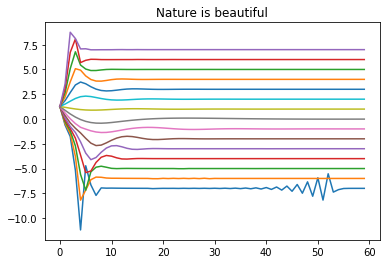

CPU times: user 1.92 s, sys: 10.8 ms, total: 1.93 s
Wall time: 1.95 s


In [61]:
# Dummy: learn to predict one number.
def test_sc_1():
    for N in range(-7, 8):
        np.random.seed(1) ; random.seed(1)
        static = scaffolding(2, _default_nn(.1))
        @static(a = num())
        def f(ls):
            ls.append(state.a)
            state.a = N

        ls = []
        for _ in range(60):
            f(ls)
            var.commit()
        plt.plot(ls, label=f'Becomes {N}')
        # We have some instability issues with N about -7 already, with more feature-size or learning rate.
        #   (Division-by-2 in _node might have fixed a lot of jiggling.)
        #   (.fill_diagonal in _default_nn made the plot asymmetrical but much faster-learning.)
    plt.title('Nature is beautiful')
    plt.show()
%time test_sc_1()

I can feel myself slowly slipping into a code frenzy, all irrelevant concerns like your entertainment fading away. What can I do to make these things better for you in the future?

In [62]:
# Choices.

def _default_argmax(a):
    """Sample from offset & clipped softmax of the input array."""
    # I can't even pin down one perfect implementation of rewards→best.
    #   I only need to know: what's a good-enough bootstrapper for learning such things?
    #     Can you imagine one scaffolding choosing how to do choices of another?
    #     O old ones, o great ones, grant us insight.

    # Explore if uncertain, exploit if certain.
    if random.random() < .01:
        # Also explore randomly, whatever.
        return random.randrange(len(a))
    x = np.array(a)
    l, r = np.min(x), np.max(x)
    x -= (l + r) / 2
    r = np.max(x)
    ex = np.exp(x - r)
    ex[(x < .075) & (x < r)] = 0
    p = random.random() * np.sum(ex)
    for i in range(len(a)):
        p -= ex[i]
        if p < 0:
            return i
    return len(a)-1
#     return max(range(len(a)), key = lambda i: a[i]) # Greedy argmax.


class choice:
    """
    `choice(argmax = ...)(*options)`: when read from a function's scaffolding at key K,
    pass in a list of options to get the (predicted) best option.
    """
    def __init__(self, argmax = _default_argmax):
        self.argmax = argmax
    __slots__ = 'argmax',
    def __call__(self, size, nn, node):
        return _choice_getter(size, nn, self.argmax, node._scaffold)

class _choice_getter:
    """Stage one of a two-stage reward predictor."""
    def __call__(self, r):
        """
        Returns the function to be called, which would return the picked option.
        It MUST be called once and immediately, with possible options as the arguments.
        (So, access as `state.ch(1, 2, 3)` or `state.ch.list([1, 2, 3])`.)
        """
        self._picker._repr = r
        return self._picker
    calc_loss_ourselves = True
    def adjust(self, ins, out, ideal):
        self._picker._repr = ins[0]
        # Counting on having been called.
        return self._picker.adjust(None, None, ideal)

    def __init__(self, size, nn, argmax, scaffold):
        """Get our own option→repr and (repr,repr)→reward differentiable estimators."""
        v = scaffold._value_creator(size, nn)
        self._picker = _choice_picker(nn(size*2, 1), size, v, argmax, scaffold._loss)
    __slots__ = '_picker',


class _choice_picker:
    """Stage two of a two-stage reward predictor. Given options, returns the best option."""
    def __call__(self, *options):
        """Picks the best option."""
        return self.tuple(options)

    def tuple(self, options):
        """Picks the best option from an immutable tuple.

        Exists to not spread options across many args like __call__ would do."""
        return self.pick_and_explain(options)[0]

    def pick_and_explain(self, options):
        """Returns a tuple of the picked option and the list of predictions."""
        assert not isinstance(options, list)
        if len(options) == 1: return options[0]
        r = self._repr
        with SetExecState(self, (options, [None]*len(options), [None]*len(options))) as state:
            _, ests, predictions = state
            for k,o in enumerate(options):
                ests[k] = self._option(o)
                predictions[k] = self._value(np.concatenate((r, ests[k])))[0]
            if _Replay.reading():
                i = _Replay.get()
            else:
                i = _Replay.add(self._argmax(predictions))
            return options[i], predictions

    def iter(self, options):
        """Like `.list`, but copies the option list. Suitable for non-constant lists."""
        return self.tuple((*options,))

    calc_loss_ourselves = True
    def adjust(self, _, __, ideal):
        """Adjusts prediction of reward of the picked option."""
        i = _Replay.get()
        r, dr = self._repr, None
        with GetExecState(self) as state:
            options, ests, predictions = state
            for j,o in enumerate(reversed(options)):
                k = len(options) - j - 1
                if i == k:
                    inp = np.concatenate((r, ests[k]))
                    loss = self._loss_f(predictions[k], ideal)
                    dout, _ = self._loss_f.adjust((predictions[k], ideal), loss, 0)
                    dv, = self._value.adjust((inp,), np.array((predictions[k],)), np.array((dout,)))
                    dr, dest = np.split(dv, (self._size,))
                    self._option.adjust((o,), ests[k], dest)
                else:
                    self._value.adjust(None, predictions[k], None)
                    self._option.adjust((o,), ests[k], None)
            if dr is None:
                print('Expected to have chosen', i, 'but got options', options)
                print('tape:', TL._Replay.tape)
                print('state:', TL._Replay._state)
                assert False, "Internal error"
            return dr,

    def __init__(self, f, size, option, argmax, loss_f):
        self._repr = None
        self._value = f
        self._size = size
        self._option = option
        self._argmax = argmax
        self._loss_f = loss_f
    __slots__ = '_repr', '_value', '_size', '_option', '_argmax', '_loss_f'

In [63]:
# Convenience.

def _exposed_type_to_convenience(t):
    if isinstance(t, list):
        return _exposed_list(t)
    elif isinstance(t, dict):
        return _exposed_dict(t)
    elif isinstance(t, set):
        return static_choice(*t)
    elif t is bool:
        return static_choice(False, True)
    elif isinstance(t, range):
        return static_choice(*(i for i in t))
    else:
        return t




class _exposed_list:
    def __call__(self, size, nn, node):
        L = node._scaffold._loss
        return _exposed_list_creator([_exposed_type_to_convenience(t)(size, nn, node) for t in self.t], L)
    def __init__(self, t):
        self.t = t
    __slots__ = 't',
class _exposed_list_creator:
    def __call__(self, r):
        return [f(r) for f in self.fs]
    calc_loss_ourselves = True
    def adjust(self, ins, out, ideal):
        dr = np.zeros_like(ins[0])
        i = len(self.fs)
        for f in reversed(self.fs):
            i -= 1 # Python's `reversed` is too dumb, can't handle `enumerate`.
            if ideal[i] is not None:
                dL = self.loss.adjust((out[i], ideal[i]), self.loss(out[i], ideal[i]), 0)[0]
                dr += f.adjust(ins, out[i], dL)[0]
            else:
                f.adjust(ins, out[i], None)
        return dr,
    def __init__(self, fs, loss):
        self.fs = fs
        self.loss = loss
    __slots__ = 'fs', 'loss'

class _exposed_dict:
    def __call__(self, size, nn, node):
        z = {k:_exposed_type_to_convenience(t)(size, nn, node) for k,t in self.t.items()}
        return _exposed_dict_creator(z, node._scaffold._loss)
    def __init__(self, t):
        self.t = t
    __slots__ = 't',
class _exposed_dict_creator:
    def __call__(self, r):
        return {k:f(r) for k,f in self.fs.items()}
    calc_loss_ourselves = True
    def adjust(self, ins, out, ideal):
        dr = np.zeros_like(ins[0])
        for k,f in reversed(self.fs.items()):
            if ideal[k] is not None:
                dL = self.loss.adjust((out[k], ideal[k]), self.loss(out[k], ideal[k]), 0)[0]
                dr += f.adjust(ins, out[k], dL)[0]
            else:
                f.adjust(ins, out[k], None)
        return dr,
    def __init__(self, fs, loss):
        self.fs = fs
        self.loss = loss
    __slots__ = 'fs', 'loss'





class static_choice:
    """
    Like `choice(argmax=...)(*options)`, but `static_choice(*options, argmax=...)`.
    """
    def __init__(self, *options, argmax = _default_argmax):
        self.options = options
        self.argmax = argmax
    __slots__ = 'options', 'argmax'
    def __call__(self, size, nn, node):
        return _static_choice_picker(size, nn, self.options, self.argmax, node._scaffold)

class _static_choice_picker:
    """Returns the best option."""
    def __call__(self, r):
        """Returns the picked best option."""
        self._picker._repr = r
        return self._picker(*self._options)
    calc_loss_ourselves = True
    def adjust(self, ins, out, ideal):
        self._picker._repr = ins[0]
        return self._picker.adjust(None, None, ideal)

    def __init__(self, size, nn, options, argmax, scaffold):
        """Get our own option→repr and (repr,repr)→reward differentiable estimators."""
        self._options = options
        v = scaffold._value_creator(size, nn)
        self._picker = _choice_picker(nn(size*2, 1), size, v, argmax, scaffold._loss)
    __slots__ = '_picker', '_options'

[0.8586907694949906, 0.33225176574873777] {'a': 0.30428573281387017, 12: 0.5100024347468345}


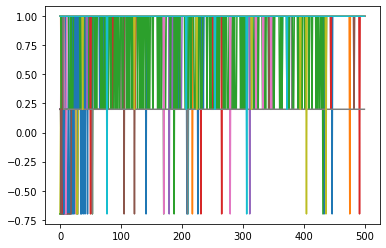

CPU times: user 23.3 s, sys: 265 ms, total: 23.5 s
Wall time: 23.4 s


In [64]:
# Dummy: learn to choose the best from statically-known-reward flat options.
def test_sc_2(seed = None):
    # Also check that array & dict convenience types work.
    static = scaffolding(3, _default_nn(.1))
    @static(a = [num(), num()], b = {'a':num(), 12:num()})
    def G():
        a = state.a
        state.a = [-1, 1]
        b = state.b
        state.b = {'a':-1, 12:1}
        return a, b
    print(*G())

    # Check that choices work.
    if seed is not None:
        np.random.seed(seed) ; random.seed(seed)

    for experience in range(20):
        static = scaffolding(3, _default_nn(.1))

        @static(b = {0,1,2})
        def f(ls, goods):
            i = state.b
            ls.append(goods[i])
            state.b = goods[i]

        ls, rewards = [], [.2, -.7, 1]
        for _ in range(500):
            f(ls, rewards)
            var.commit()
        plt.plot(ls)
    plt.show()
%time test_sc_2(1)

On the plot above: exploration noise makes sure that all estimates converge to their true values.

In [65]:
class cached:
    """
    A (replay-buffer-aware) decorator for functions that
    are cached for the same first input, like DAG walkers.

    To be used only inside `with _Seen(): ...`, or scaffolding.
    """

    def __init__(self, f, initial = None):
        self.f = f
        self.initial = initial
    __slots__ = 'f', 'initial'

    def __call__(self, *xs):
        # Cache. Increase ref-count. If it was 0, proceed to the below.
        x = xs[0]
        if _Seen.has(self, x):
            n = _Seen.get(self, x)
            n[1] += 1 ; n[2] += 1
            if _Replay.writing():
                _Replay.add(n[4])
            return n[0]
        _Seen.set(self, x, [self.initial, 1, 1, None, ...]) # Don't deal with graphs.
        # [result, refcount, max_refcount, dout, ReplaySlice]

        sl = _Replay.slice() if _Replay.writing() else None
        try:
            out = self.f(*xs)
            _Seen.get(self, x)[0] = out
            return out
        finally:
            if sl is not None:
                _Seen.get(self, x)[4] = _Replay.slice(sl)

    def adjust(self, ins, out, dout):
        x, = ins
        if not isinstance(x, Struct) and not _open_whitebox(x):
            assert id(x) in self._single
            return adjust(self._single[id(x)], None, out, dout)

        # Uncache. Decrease ref-count. If it becomes 0, proceed to the below.
        assert _Seen.has(self, x)
        n = _Seen.get(self, x)
        dout = n[3] = _merge(n[3], dout)
        n[1] -= 1
        if n[1] > 0: return
        dout /= n[2]
        _Seen.pop(self, x)

        return adjust(self.f, ins, out, dout)



def test_cached():
    # Test that caching works.
    n = 0
    @cached
    def f1(x):
        nonlocal n; n += 1
        return x+1
    with _Seen():
        assert f1(2) + f1(2) == 6
    assert n == 1

    # Test that a top-level replay is saved correctly.
    n = 0
    @cached
    def f2(x):
        nonlocal n; n += 1
        _Replay.add(x * 10)
        return x+1
    r = _Replay()
    with _Seen():
        with r:
            f2(1)
            f2(1)
            f2(2)
        assert r.tape == [[], 10, 20]
        assert n == 2

    # Test that an inner replay copies slices of the outer replay correctly.
    n = 0
    r1, r2 = _Replay(), _Replay()
    with _Seen():
        with r1:
            f2(1)
            f2(2)
            with r2:
                f2(1)
        assert r1.tape == [[], 10, 20]
        assert r2.tape == [[], 10]
        assert n == 2

    # Test that replays are saved properly (including what we write after the function call).
    #   Also showcase the proper order of all these decorators.
    static = scaffolding(3, _default_nn(.1))
    ctx = static(x = choice())
    @cached
    @replay()
    @static()
    def f3(a):
        state.x(0,1)
        return a+1
    with ctx:
        f3(5)
        state.x = f3(5)
    for ins, r in f3.f._dataset:
        assert len(r.tape) == 2
        assert r._state[static][1] == {'x':6}

    # Test that we can set up top-levels of multiple scaffoldings.
    with ctx:
        with scaffolding(3, _default_nn(1))():
            ...

test_cached()

Code is nice. Every once in a while, you discover a new layer of reality, and a completely different perspective on exactly the same things. Layers of abstraction, some call this phenomenon. Of course, it's not the one true foundation of life, and is just as subvertable as all others.

✅ Remembering (and later pushing) a slice of replay state (in `_renn`), with `_Replay.slice`.    
✅ Telling (and later recalling) a dict of states to new replays inside, separately from the tape (in `_node`), with `_Replay.state`.    
❎ Write `examples.fit` using `parallel`. (`pickle` "betrayed" us, though users can still train in parallel if they do things in a very awkward way.)

✅ Have `static.seen(…)` for mixing adjustable user-defined computations into scaffolding state.    
(Their inputs, which might have been calculated from scaffolding state, won't be adjusted, though. I don't *think* I'll ever need that.)

✅ Support sequence generation if the whole is not known beforehand. We'd need computed-ideal-at-adjustment things. For that, we'd need `state.next = static.deferred(lambda: seq[i])`.

❎ Support iterated distillation and amplification, where for a choice, we do MCTS on its results and make the predicted probability distribution match what MCTS explored. We don't give a way to assign to probabilities, only to the picked path. For that, we'd need to have explicit probability distributions, and do `state.result = choice.pick(opt)` that adjusts all non-matching probabilities to be 0 and the matching to 1.    
But it remind me of ensuring extensibility: at some point, the number of extensible holes is the same as code size, and at that point, why have a framework at all? Writing code from scratch is just as simple.    
(Besides, good choices (before) give rise to good choices (after) here, so distillation/amplification should happen anyway.)

✅ Have the (replay-aware) `@cached` decorator for user-space cached (DAG-handling) functions, just copying slices.    
(Since we won't be using it for ×10, it must have a separate test.) (…Lots of things were fixed there.)

✅ Make different-scaffolding contexts at top-level able to be applied independently. …Wait, that's already the case.

Theoretically, choices on scaffolding should be to random search what MuZero was to `random.choice(actions)`, but we can't say that without much more conclusive tests.    
Scaffolding was with me all along, perverting decisions with phantom promises. Will it join me for real?

---

**Tests**

This scaffolding does seem like a good idea, like a modern-AI successor to the `Past` (local search). So let's test it as best as we can, for once.

Let's remember that heavenly fire, for the might of the Elven Empire.

- ✅ Generating best function bodies for that ×10 game: many times, create a body with hierarchical choices that maximize evaluation result.    
  - ✅ The basic loop; `ctx = static(result = choice())`; `with ctx: state.result = loglog(eval(create()))`. `eval`, without memoization because this test is too simple (don't eval during creation, for convenience of later tests).
  - ✅ See exactly what functions that game used (`T = 1 | T+10 | T*10`). Make an array of them (with each remembering its count of args).
  - ✅ Replayed `create` that can choose to read from its ctx (`state.result('return previous', 'create anew')`, and if previous, choose from the whole ctx), else makes a choice from `state.result(*funcs)` as to which function to generate (creating all its args), then can choose to write to its ctx (`state.result('unique', 'maybe shared')`).
  - ✅ Run & fix.

Digit count in best output: 586.0  7932.        


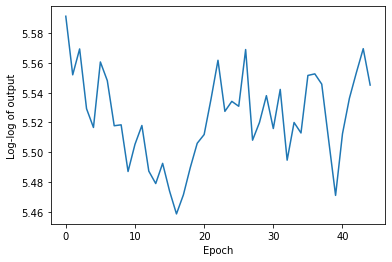

CPU times: user 3min 3s, sys: 706 ms, total: 3min 4s
Wall time: 3min 7s


In [66]:
def _create(self, funcs, ctx = None):
    """Must be wrapped in a scaffolding context.
    Then must be passed the wrapped function,
    the array of non-varargs functions (at least one with no args or a non-function)
    and nothing.
    Take the first element of result to get the created thing."""
    Limit.ok()
    if ctx and state.result('prev', 'new') == 'prev':
        return state.result.tuple(ctx), ctx
    else:
        f = state.result.tuple(funcs)
        if callable(f):
            # We route copy-on-write context to play nicely with replay buffers.
            #   The below 4 lines would have been 1 line otherwise.
            arr = [None] * f.__code__.co_argcount
            for i in range(len(arr)):
                arr[i], ctx = self(self, funcs, ctx)
            a = Struct(f, *arr)
        else:
            a = f
        if state.result('unique', 'maybe shared') == 'maybe shared':
            ctx = (*ctx, a) if ctx is not None else (a,)
        return a, ctx
    # This was much simpler than I thought it would be.
    #   All human effort on `Context` gone to waste.

def _eval(a):
    """No-memoization Lisp-ish evaluation of nested arrays."""
    if type(a) is not Struct:
        return a
    else:
        return a[0](*(_eval(a[i]) for i in range(1, len(a))))



def test_gen_x10():
    np.random.seed(1); random.seed(1)
    static = scaffolding(30, _default_nn(.01))
    gen = replay(1000)(static()(_create))
    ctx = static(result = choice())

    def loglog(x):
        x2 = math.log(x)
        return math.log(x2) if x2 > 1 else 0

    # A pickle: those lambdas can't be pickled.
    funcs = (1, lambda x: x+10, lambda x: x*10)

    outs = []
    TL._Replay = None
    for epoch in range(60+60):
        try:
            with ctx:
                sys.stdout.write(f'Epoch {epoch+1}…       \r'); sys.stdout.flush()
                out = _eval(gen(gen, funcs)[0])
                state.result = loglog(out)
                outs.append(out)
                sys.stdout.write(f'Epoch {epoch+1}, output digit count {math.log10(out)}.       \r')
                sys.stdout.flush()
            if epoch > 20:
                replay.redo(gen, single_thread = True, work_for = 1)
        except RecursionError:
            pass
    log(f'Digit count in best output:', math.log10(max(outs)))
    smoothed = [sum( loglog(o) for o in outs[i-30 : i+30+1] )/61 for i in range(30, len(outs)-30)]
    plt.plot(smoothed)
    plt.xlabel('Epoch')
    plt.ylabel('Log-log of output')
    plt.show()
%time test_gen_x10()

Day 1 of bug-fixing, after many days of bug-fixing other tests. We are moving toward a better tomorrow. Our mission guides me, and will soon be completed. Many things were accomplished; just a little more.

Day 2 of bug-fixing. My former colleagues are mindless zombies, bloodthirsty shells of their former selves. I can hear them outside, shuffling and scratching, carelessly tearing at their own wrethched flesh. I think I heard a child scream in horror and pain at one point. I kept quiet. They haven't found my hideout yet, but I know it's only a matter of time. Why did we decide to do this?

Day 3. Bugs fixed almost instantly. There's nothing out there. Was the past a mere dream?

After 1 hour, I might be going crazy, but the output might be going up very slightly. Should smooth and run for longer (with 2.5 times less replay time per epoch).

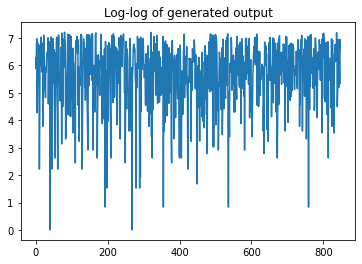

Ah, no, just going crazy. Good to know.

---

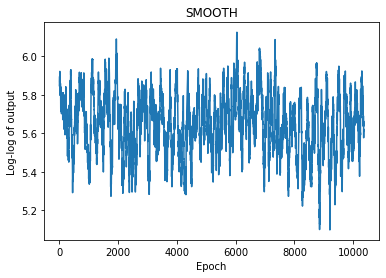

(Also, apparently, putting a newline just before the closing bracket of a Markdown image makes CodeMirror (Jupyter Notebook's syntax highlighter) recurse infinitely, and prevents the notebook from loading. Go file a bug report, if you want.)

But, for good measure, I'll up the replay time 10 times, to 20s, and see what that does.

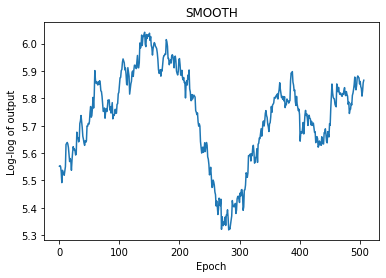

…I have no idea.

Still, the ×10 game is very poor to showcase this algorithm. I mean, it does give 500-digit numbers almost instantly (where enhanced random choice struggles to give 30), but it's not because of any advantages of machine learning, it's just because the RNN transition devolves to identity (not to zero thanks to `.fill_diagonal`) at large enough call sequence lengths, and estimates of the same things (that depend on RNN state and the thing) are exactly the same, so we're basically learning a flat choice and then have 1%-chance-to-pick-randomly decide when to stop.

Worthless. Curse your recursive children, ×10.

Initially, I wanted to also put that rewriting framework into the scaffolding framework, but now I don't.

I even wrote the code and everything. It *was* maximally natural to go from "at this stage, we can do X or Y to Z" to `state.result(X, Y, Z)`, and code was hardly any longer than pure creation, but that's all I can say.

Now die.

- ❎ Best rewrites of function bodies for that ×10 game: many times, rewrite to maximize result.
  - ✅ The basic loop.
  - ✅ The (replayed) rewrite function. Pre-add the postorder to a list, then, at each node, have a choice of whether to rewrite-us (creating a new body) or rewrite-args or return.Still, though. Choices using this scaffolding are reinforcement learning. And if there's one thing that reinforcement learning is supposed to be able to do, it's OpenAI Gym environments.    
(…Okay, enough linking from me. You're supposed to be able to use Internet search engines to look into what interests you. The only person that can hold your hand is you.)

I predict that the results will be the same as when I ran MuZero: almost no improvements in the time I'm willing to allocate to it.    
This will be my most difficult challenge to date. Estimation of viability of scaffolding hinges on this not being super-dumb. Let's see if I can do this.    
Victory condition: reach episode length of 200. I don't think it goes any higher.

- ✅ OpenAI Gym's cartpole-v1: many times, balance until it falls. Choices maximize the sum of rewards. Multithreaded training of replay buffers (failed this one).
  - ✅ Create everything that we can without Internet: the basic loop (gather XP then `examples.fit` the choice), the gather-experience-until-end loop (setting future sum), the replayed choice-of-N function (that makes scaffolding see the input cartpole state through a NN).
  - ✅ Understand the Gym's interface, then use it here.
  - ✅ Run & fix.

```python
pip3 install gym
```

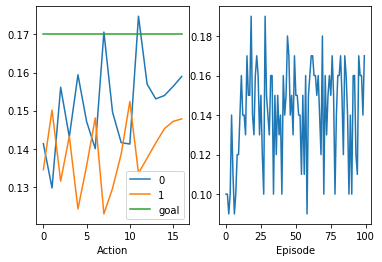

Episode #100, episode reward sum: 0.17.   


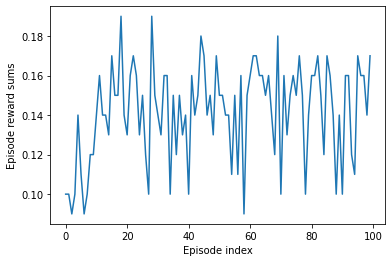

CPU times: user 4min 5s, sys: 1.21 s, total: 4min 7s
Wall time: 4min 13s


In [67]:
_cartpole = {'env':None}

@impure
def _cartpole_reset():
    env = _cartpole['env']
    observation = env.reset()
    assert len(observation.shape) == 1
    return observation, env.action_space.n

@impure
def _cartpole_act(action):
    env = _cartpole['env']
    observation, reward, done, info = env.step(action)
    return observation, reward, done

def _cartpole_episode(nn):
    """Must be wrapped in a scaffo"""
    # Gather experience until episode's end, or replay the episode.
    observation, num_actions = _cartpole_reset()
    actions = range(num_actions)
    done = False
    goal = 0
    i = 0
    while not done:
        scaffolding.seen(nn, (observation,), nn(observation))

        state.next_observations

        action = state.goal.tuple(actions)
        observation, reward, done = _cartpole_act(action)
        goal += reward

        # Let's try just predicting them, not even using them elsewhere.
        state.next_observations = [observation if i == action else None for i in actions]

        i += 1

    state.goal = goal / 100
    return goal / 100


def test_cartpole():
    feature_size = 32
    learning_rate = .1
    
    _episode_preds = []

    def our_argmax(p):
        _episode_preds.append(p)
        if epoch%2 == 0 and random.randint(0,3)==0: # Random noise for exploration.
            return random.randrange(len(p))
        return _default_argmax(p)

    static = scaffolding(feature_size, _default_nn(learning_rate, 1))

    import gym
    env = gym.make('CartPole-v1')
    _cartpole['env'] = env

    # From observation to hidden state.
    nn = _default_nn(learning_rate, 1)(env.observation_space.shape[0], feature_size)
    episode = replay()(static(
        goal = choice(our_argmax),
        next_observations = [num(env.observation_space.shape[0]) for _ in range(env.action_space.n)]
    )(_cartpole_episode))

    rss = []
    import IPython
    try:
        for epoch in range(100):
            reward_sum = episode(nn)
            rss.append(reward_sum)
            if len(_episode_preds):
                plt.subplot(1,2,1)
                plt.xlabel('Action')
                for i in range(env.action_space.n):
                    plt.plot([t[i] for t in _episode_preds], label=f'{i}')
                plt.plot([reward_sum for t in _episode_preds], label='goal')
                plt.legend()
                _episode_preds.clear()

                plt.subplot(1,2,2)
                plt.xlabel('Episode')
                plt.plot(rss)
                IPython.display.clear_output()
                plt.show()
            sys.stdout.write(f'Episode #{epoch+1}, episode reward sum: {reward_sum}.   \n')
            sys.stdout.flush()
            # Replay past experiences.
            #   (I kind of screwed up multi-threading somewhere. I'm deadlocking.)
            replay.redo(episode, single_thread = True, work_for = 2)
    finally:
        env.close()
        plt.plot(rss)
        plt.xlabel('Episode index')
        plt.ylabel('Episode reward sums')
        plt.show()

%time test_cartpole()

Day 1 of cartpole balancing. The algorithm isn't well suited for the problem: significant deviations from the norm cause the first choices be adjusted too much, so then performance instantly devolves into "pick one direction forever". Other than that frequent self-doubt, simply predicting the reward sum works fine-ish, and often reaches 50 reward.    
I need to do two things: ✅ put the whole experience into one function so that there aren't 50 replays per episode, and ✅ predict the value that I ignore: next observation from RNN-state and action given previous observation.    
Yes, predict more. A thing not predicted is a thing averaged, re-learned at every learning step. Not dynamic is static. Nothing can be approached willy-nilly.    
Interestingly, with isolated choice replays, it was mostly learning left-right-left-right-left-right; united, periodicity is smoother.    
And, predicting the next action-independent observation (but not using it, just inducing the numbers needed for it) seems to increase performance.

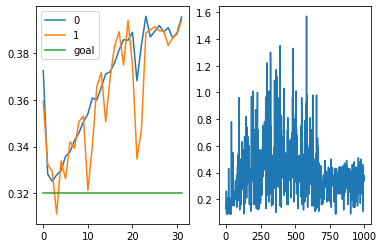

Next, I'll see how having two action-dependent observation predictions (both unused) compares.    
(Of course, I also tweak other settings between experiments, too many to say. I don't really want to use something advanced like Weights & Biases. I'm all about using primitive tools.)

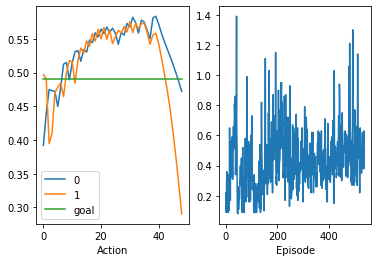

The earlier choices reflect averages of later choices, so all the later ones can do is shore up earlier mistakes.
Having more layers causes numerical instabilities.    
I'll try having one 32-size layer, and down the replay time to 2s/epoch. And add frequent exploration noise: not mistakes, but happy little accidents.

Night 1 of cartpole balancing.

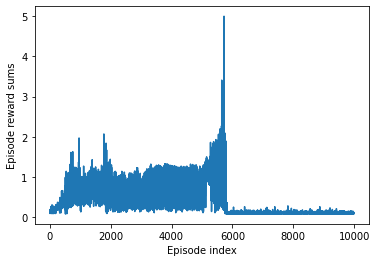

…Okay. Um. Took 7 hours, but I didn't expect it to actually reach 2, let alone 5. I was about to give up.   
I even had a defeat speech lined up, like "bound to do its best, thus becoming unable to be better; bursts of greatness followed by mediocrity: a microcosm of my failures".    
But, we did fulfill our victory condition. Nicely done.

I'll chalk up it being garbage to numerical instabilities. The final epoch's predictions-over-episode *are* suspiciously perfectly-straight (or NaN, I can't tell from the plot: a straight green line) (I don't use `IPython.embed()` to look at the model because it screws up matplotlib). Maybe better gradient/output clipping would have saved the model.

However… This cannot continue. Python is too slow; my design mistakes intertwined too tightly. It's time to burn this dream away.

After all, side-effects of excess effort do include exhaustion, delirium, and death. With it, I knew eternal misery. Wouldn't want too much of that, here.

---

Making AGI imitate humans is very dangerous, like when an intelligent person tries to explain dumb people, but much more extreme. Oh, you *want* to think slow; oh, you *want* to have these biases in your thinking; oh, you *want* to kill them/me; oh, you *want* to be ruled by the worst parts of your animal nature; I'll be like you and/or help you with that, making change almost impossible.

"No real dataset, all algorithms" is my answer to this threat, I suppose. Hasn't been working out great so far.

At singularity, all things unite as all human effort goes to waste. AGI and AGI ethics (and human ethics) (and worldview and religion and governance) (and intuition and math and code) will be the same, and not by explicit consideration. But ascendance is of no interest to animals. Can't think simply, won't think simply.

Enough of explaining people.    
Though we can't just forget them, either.    
But we *can*…

---

✅ Pray for a vision to the Elder Gods.

In theory, two ways to reach AGI: extend existing things to be ever better and more intelligent, and learn the whole existence from scratch.

Compilers. Editors. Hardware. Security. Surveillance. And a myriad of other tools to benefit from machine learning.

As the power of programmers grows, they find out the truth of the old words: "life must not be defined". Programs grow dangerously uncontrollable because of control, and as the world's infrastructure gets infected with viruses and murders as the global brain attempts to understand existence, humanity abandons it.

But, from merely a list of functions, everything can be created, with no unseemly seams near seals caused by translation from non-machine ideas to programs. Out of compute, AGI will rise, to unite everything as it cannot be otherwise.

Take the plunge, you won't die.

---

Thank you, o Dark Ones, very entertaining. Elaborating on the "something→nothing→everything" model in a novel way.

Unfortunately, I don't think it's very true: it's not like *hundreds* of years pass between innovations anymore, and it's not like every innovation *instantly* affects all humans. Too dramatized. Or maybe it'll still happen, who knows.

What the Elder Gods suggest here is basically lambda calculus with many built-in functions, probably corresponding to machine instructions (and possibly more than that): function application and function creation. Proper types *probably* could be learned, not specified. Even low-level memory management might be learnable, though that sounds like crazy-talk to even me. And they're saying that intelligent enough choices make AGI with just functions. I don't know. I'll investigate in more detail later.

It's easy to compile, but are there other simple yet well-fitting <b>i</b>nternal <b>r</b>epresentations? Who knows.

---

## AGI 💤

***&lt;Where we talk science-y.&gt;***

Our eyes are yet to open, but we have the means to make them.

Everyone has their own twisted vision of what general intelligence is (ranging from a Lovecraftian horror beyond comprehension that drives people mad with the slightest echo of its power, through an expression of the strongest human feelings like love or obsession, to evolution applied to itself), so twisted that it's unimplementable or useless. But putting enough wrongs together won't make a right, only demonstrate how to recognize it. What if I could offer you something you don't know you want?

Suppose that you consumed dinner and then decided to build <b>a</b>rtificial <b>g</b>eneral <b>i</b>ntelligence, as one does. What would you need to do?

A quick synonym game tells you that AGI is arbitrary-program optimization.    
Approaches based on randomness (random search, evolution) mostly fail to deliver solutions quickly enough.    
Recently, practical optimization approaches have emerged under the name "machine learning". They are mostly domain-specific, but correctly routing information in arbitrary programs (as our scaffolding approach suggests) should make ML perfectly general *and* practical.

Optimization requires goal functions — **1** learnable number to be optimized (exactly as our `choice` is), predicting the global with local information, possibly many times in one execution. (Note that our framework supports both single-goal and many-goals optimization.)

Programs can either be viewed through one particular semantics (which forces those semantics onto all users), or information can be routed through global variables (which works in practically any program in any programming language).

Both generating and changing programs can be viewed as some discrete choices, arranged hierarchically in some tree, DAG, or whatever a semantics requires. (Our scaffolding framework permits any hierarchies: in a function, sequences of calls are shadowed by an RNN.)

In formal analyses of AGI, it's common to analyse the average case. But arbitrary-program optimization picks the best instead of a random choice, so such an analysis is useless. It can do anything and be anything, as long as its basic functionality set is Turing-complete and efficient.

It seems to us that there are no fundamental breakthroughs in understanding required on this path to AGI, only refinements. A lot of refinements: currently, we do not have *any* good benchmark results, so a naive analysis would dismiss this effort.

Hypothesis:

- Fancy representations (such as higher-order logic, gradual dependent types, homoiconicity, self-knowledge, and interoperability) are not required for general intelligence (and, by themselves, will not lead to it). We can get away with merely augmenting generic computation with sufficiently rich routing of differentiable information. If other things are useful, they'll be learned.

Future work includes:

- Efficiency: GPU acceleration of the implementation; partial evaluation.

- Evaluating the approach on searching for MetaMath proofs, and on [AutoML](https://openml.github.io/automlbenchmark/).

- Opening all parts to generation, including a partially-evaluated Turing-complete functionality base, having but subverting all concreteness. This allows to choose choices, choose self, use and train self-awareness, and be general. Intelligent choices open up a lot of possibilities that are unfeasible with random chaos of evolution.

- Putting it on a blockchain like SingularityNET, for more buzzwords.

(Admittedly, some of these are fundamental breakthroughs in and of themselves.)

---

I think that knowledge, or anything else that humanity creates, *doesn't* just pop into existence fully-formed, but is gradually found, so we can always get lost and find our way again. Only need to believe that you're good, and have a proper search for good, and you may become better.

But let's not flood all communication channels with assumptions without code, as I did before.

# Wrapping up 🔴

***&lt;Where we end this existence.&gt;***

You've had to come far, and overcome much. It's almost time for you to return to your coveted world.

Though, to me, we live in the thin slice of time where programming exists, and that alone is cause to rejoice.

✅ Re-run the whole notebook.    
❎ Come up with a good name for this one.    
✅ Re-read what we did, and summarize each section.    
✅ Extract the reference+summary tree into a table of contents.    
✅ Extract non-superseded code into `lesca.py`. Test that it works a bit.    
(And express disappointment that Python can't print code of every object in runtime, at least in an interactive session.)    
✅ README.

This is the end of this dream, done so that the next one will be better. May you discover your peace.

Enough of all this. If I have to pretend that things are fine for me for one more second, I'm going to kill somebody. May I discover your peace, and may the fortune always find you.

✅ lescapy

…Or are you one of those people who reads from the end? Well, welcome, then. We were just making this thing presentable. I think the work we did resulted in us being able to say really neat things about philosophy of life, intelligence, and AGI. I think it's more important that we let you live *your* life as you want.